<a href="https://colab.research.google.com/github/lan14062004/Du-an-da-lam/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
df_cleaned= pd.read_csv(r'C:\study\thnmkhdl\BTL\data\hotel_bookings.csv')
df_cleaned.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


# Tìm hiểu bộ dữ liệu

- **hotel**: Loại khách sạn (Resort Hotel hoặc City Hotel)
- **is_canceled**: Đặt phòng có bị hủy không (1 = Hủy, 0 = Không hủy)
- **lead_time**: Số ngày từ khi đặt phòng đến ngày nhận phòng
- **arrival_date_year**: Năm đến nhận phòng
- **arrival_date_month**: Tháng đến nhận phòng (dạng chữ)
- **arrival_date_week_number**: Tuần trong năm của ngày đến nhận phòng
- **arrival_date_day_of_month**: Ngày trong tháng của ngày đến nhận phòng
- **stays_in_weekend_nights**: Số đêm ở lại vào cuối tuần (thứ 7, chủ nhật)
- **stays_in_week_nights**: Số đêm ở lại trong tuần (thứ 2 đến thứ 6)
- **adults**: Số lượng người lớn trong đặt phòng
- **children**: Số lượng trẻ em trong đặt phòng
- **babies**: Số lượng em bé trong đặt phòng
- **meal**: Loại suất ăn đặt kèm (BB, HB, FB, SC, ...), ví dụ: BB = Bed & Breakfast
- **country**: Quốc gia của khách hàng (mã quốc gia)
- **market_segment**: Kênh đặt phòng (Online TA, Offline TA/TO, Direct, Corporate, ...)
- **distribution_channel**: Kênh phân phối (TA/TO, Direct, GDS, ...)
- **is_repeated_guest**: Khách hàng có phải khách quen không (1 = Có, 0 = Không)
- **previous_cancellations**: Số lần đặt phòng trước đó đã bị hủy của khách hàng
- **previous_bookings_not_canceled**: Số lần đặt phòng trước đó không bị hủy của khách hàng
- **reserved_room_type**: Loại phòng khách hàng đặt ban đầu
- **assigned_room_type**: Loại phòng thực tế được nhận
- **booking_changes**: Số lần thay đổi đặt phòng
- **deposit_type**: Loại tiền đặt cọc (No Deposit, Non Refund, Refundable)
- **agent**: Mã đại lý đặt phòng (nếu có)
- **company**: Mã công ty đặt phòng (nếu có)
- **days_in_waiting_list**: Số ngày trong danh sách chờ
- **customer_type**: Loại khách hàng (Transient, Contract, Group, Transient-Party)
- **adr**: Giá phòng trung bình mỗi ngày (Average Daily Rate)
- **required_car_parking_spaces**: Số chỗ đậu xe yêu cầu
- **total_of_special_requests**: Tổng số yêu cầu đặc biệt của khách hàng
- **reservation_status**: Trạng thái đặt phòng (Check-Out, Canceled, No-Show)
- **reservation_status_date**: Ngày cập nhật trạng thái đặt phòng

Các biến này giúp mô tả chi tiết từng đặt phòng và hành vi của khách hàng tại khách sạn.

In [ ]:
for i in df_cleaned.columns:
    print(i)
    print(df_cleaned[i].unique())
    print('----------------------------------')

hotel
['Resort Hotel' 'City Hotel']
----------------------------------
is_canceled
[0 1]
----------------------------------
lead_time
[342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 460 140 114 139 122 137 126 120 128 135 150 143 151 132 125 157
 147 138 156 164 346 159 160 161 333 381 149 154 297 163 314 155 323 340
 356 142 328 144 336 248 302 175 344 382 146 170 166 338 167 310 148 165
 172 171 145 121 178 305 173 152 354 347 158 185 349 183 352 17

In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# DATA Cleaning

## xử lý giá trị thiếu

In [ ]:
df_cleaned.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
df_cleaned.drop(columns =['company'], inplace= True)

In [ ]:
df_cleaned['children'].fillna(0,inplace = True)

In [ ]:
df_cleaned.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103886,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
# prompt: thay giá trị thiếu trong cột agent bằng giá trị median

df_cleaned['agent'].fillna(df_cleaned['agent'].median(), inplace=True)

In [ ]:
# prompt: thay giá trị thiếu của cột country bằng giá trị xuất hiện nhiều nhất

# Fill missing values in 'country' column with the most frequent value
df_cleaned['country'].fillna(df_cleaned['country'].mode()[0], inplace=True)


## xử lý giá trị trùng lặp

In [ ]:
df_cleaned.duplicated().sum()

32020

In [ ]:
# Chỉ giữ lại dòng đầu tiên
df_cleaned = df_cleaned.drop_duplicates(keep='first')

## Xử lý ngoại lai bằng phương pháp IQR


In [ ]:
# Xác định các cột số
numeric_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Xử lý ngoại lai bằng phương pháp IQR
for col in numeric_cols:
    Q1 = df_cleaned[col].quantile(0.25)  # Tứ phân vị thứ nhất
    Q3 = df_cleaned[col].quantile(0.75)  # Tứ phân vị thứ ba
    IQR = Q3 - Q1  # Khoảng tứ phân vị

    # Xác định ngưỡng
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Thay thế giá trị ngoại lai bằng giá trị trung vị
    median = df_cleaned[col].median()
    df_cleaned[col] = df_cleaned[col].apply(lambda x: median if x < lower_bound or x > upper_bound else x)

# Kiểm tra lại dữ liệu sau khi xử lý
print(df_cleaned.describe())

        is_canceled     lead_time  arrival_date_year  \
count  87370.000000  87370.000000       87370.000000   
mean       0.274969     71.610221        2016.210290   
std        0.446501     72.445012           0.686116   
min        0.000000      0.000000        2015.000000   
25%        0.000000     11.000000        2016.000000   
50%        0.000000     49.000000        2016.000000   
75%        1.000000    114.000000        2017.000000   
max        1.000000    296.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count              87370.000000               87370.000000   
mean                  26.839533                  15.815360   
std                   13.673204                   8.834842   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   27.000000                  16.000000   
75%                   37.000000                  23.000000   

In [ ]:
# Xử lý ngoại lai bằng phương pháp IQR
def remove_outliers_iqr(df, columns):
    df_cleaned = df.copy()
    for col in columns:
        Q1 = df_cleaned[col].quantile(0.25)  # Tứ phân vị thứ nhất
        Q3 = df_cleaned[col].quantile(0.75)  # Tứ phân vị thứ ba
        IQR = Q3 - Q1  # Khoảng tứ phân vị

        # Xác định ngưỡng
        lower_bound = Q1 - 1 * IQR
        upper_bound = Q3 + 1 * IQR

        # Loại bỏ giá trị ngoại lai
        df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]
    return df_cleaned

# Các cột số cần kiểm tra ngoại lai
numeric_cols = ['lead_time', 'adr', 'stays_in_weekend_nights', 'stays_in_week_nights',
                'adults', 'children', 'babies', 'previous_cancellations',
                'previous_bookings_not_canceled', 'booking_changes',
                'days_in_waiting_list', 'required_car_parking_spaces',
                'total_of_special_requests']

# Loại bỏ giá trị ngoại lai
df_cleaned = remove_outliers_iqr(df_cleaned, numeric_cols)

# So sánh trước và sau khi xử lý
print("Trước khi xử lý:")
print(df_cleaned[numeric_cols].describe())
print("\nSố lượng mẫu:", len(df_cleaned))

print("\nSau khi xử lý:")
print(df_cleaned[numeric_cols].describe())
print("\nSố lượng mẫu:", len(df_cleaned))

Trước khi xử lý:
          lead_time           adr  stays_in_weekend_nights  \
count  87370.000000  87370.000000             87370.000000   
mean      71.610221    101.684855                 0.989253   
std       72.445012     44.560092                 0.973871   
min        0.000000     -6.380000                 0.000000   
25%       11.000000     72.000000                 0.000000   
50%       49.000000     98.100000                 1.000000   
75%      114.000000    129.000000                 2.000000   
max      296.000000    227.000000                 5.000000   

       stays_in_week_nights   adults  children   babies  \
count          87370.000000  87370.0   87370.0  87370.0   
mean               2.463580      2.0       0.0      0.0   
std                1.626401      0.0       0.0      0.0   
min                0.000000      2.0       0.0      0.0   
25%                1.000000      2.0       0.0      0.0   
50%                2.000000      2.0       0.0      0.0   
75%        

giới thiệu Xử lý ngoại lai bằng phương pháp IQR:

1. Định nghĩa ngoại lai:
- Ngoại lai (outliers) là các giá trị bất thường, nằm ngoài phạm vi phân phối của dữ liệu. Chúng có thể gây ảnh hưởng tiêu cực đến hiệu suất của mô hình học máy và làm sai lệch kết quả phân tích.

2. Phương pháp IQR (Interquartile Range):
- IQR là khoảng tứ phân vị, được tính bằng hiệu số giữa tứ phân vị thứ ba (Q3) và tứ phân vị thứ nhất (Q1)

3. Quy trình xử lý ngoại lai:
- Bước 1: Tính Q1, Q3 và IQR cho từng cột số liệu.
- Bước 2: Xác định ngưỡng trên và ngưỡng dưới.
- Bước 3: Loại bỏ các giá trị nằm ngoài phạm vi ngưỡng.

4. Ứng dụng trong bài toán:
- Các cột số liệu được kiểm tra ngoại lai bao gồm: `lead_time`, `adr`, `stays_in_weekend_nights`, `stays_in_week_nights`, `adults`, `children`, `babies`, `previous_cancellations`, `previous_bookings_not_canceled`, `booking_changes`, `days_in_waiting_list`, `required_car_parking_spaces`, `total_of_special_requests`.
- Sau khi xử lý:
  - Dữ liệu sạch hơn: Loại bỏ các giá trị bất thường.
  - Cải thiện hiệu suất mô hình: Giảm ảnh hưởng tiêu cực của ngoại lai đến quá trình huấn luyện.

5. Kết quả:
- So sánh thống kê mô tả trước và sau khi xử lý để đánh giá hiệu quả.
- Số lượng mẫu giảm, nhưng dữ liệu trở nên đáng tin cậy hơn.

6. Lợi ích:
- Giảm nhiễu trong dữ liệu.
- Tăng độ chính xác và ổn định của mô hình học máy.
- Cải thiện khả năng phân tích và trực quan hóa dữ liệu.

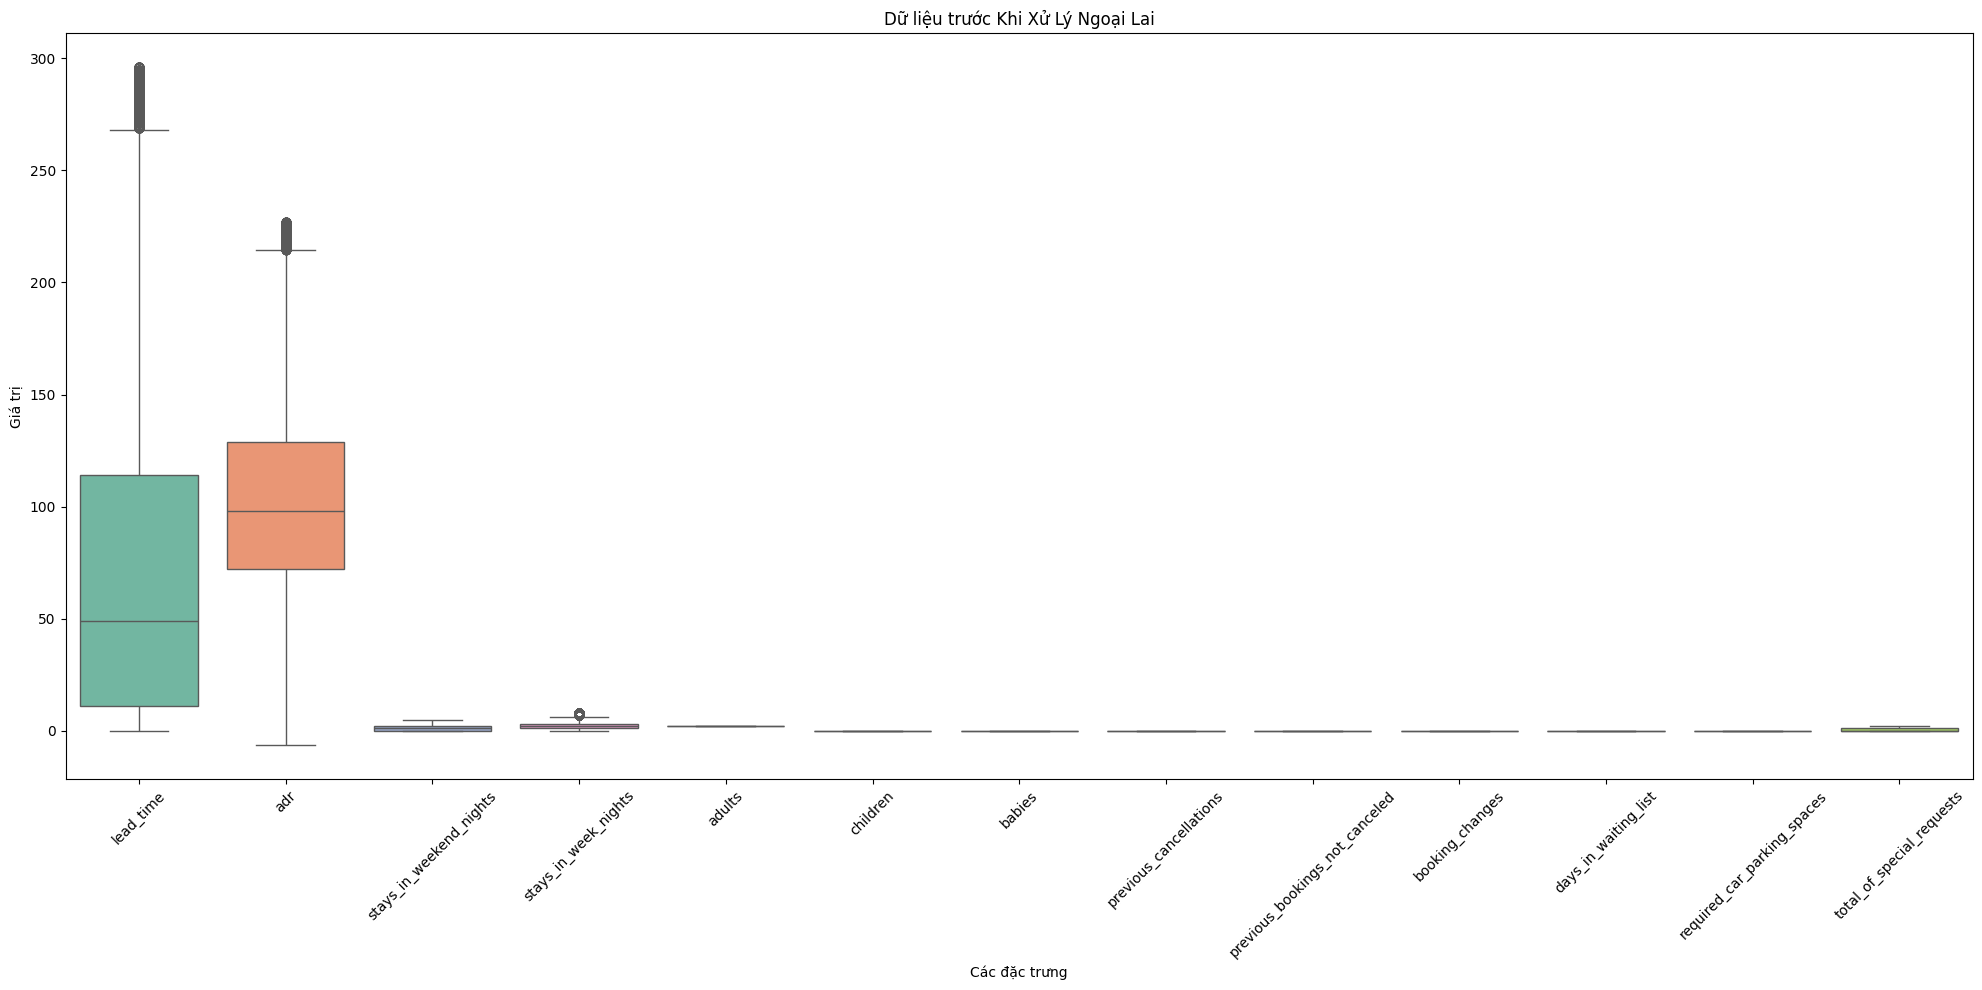

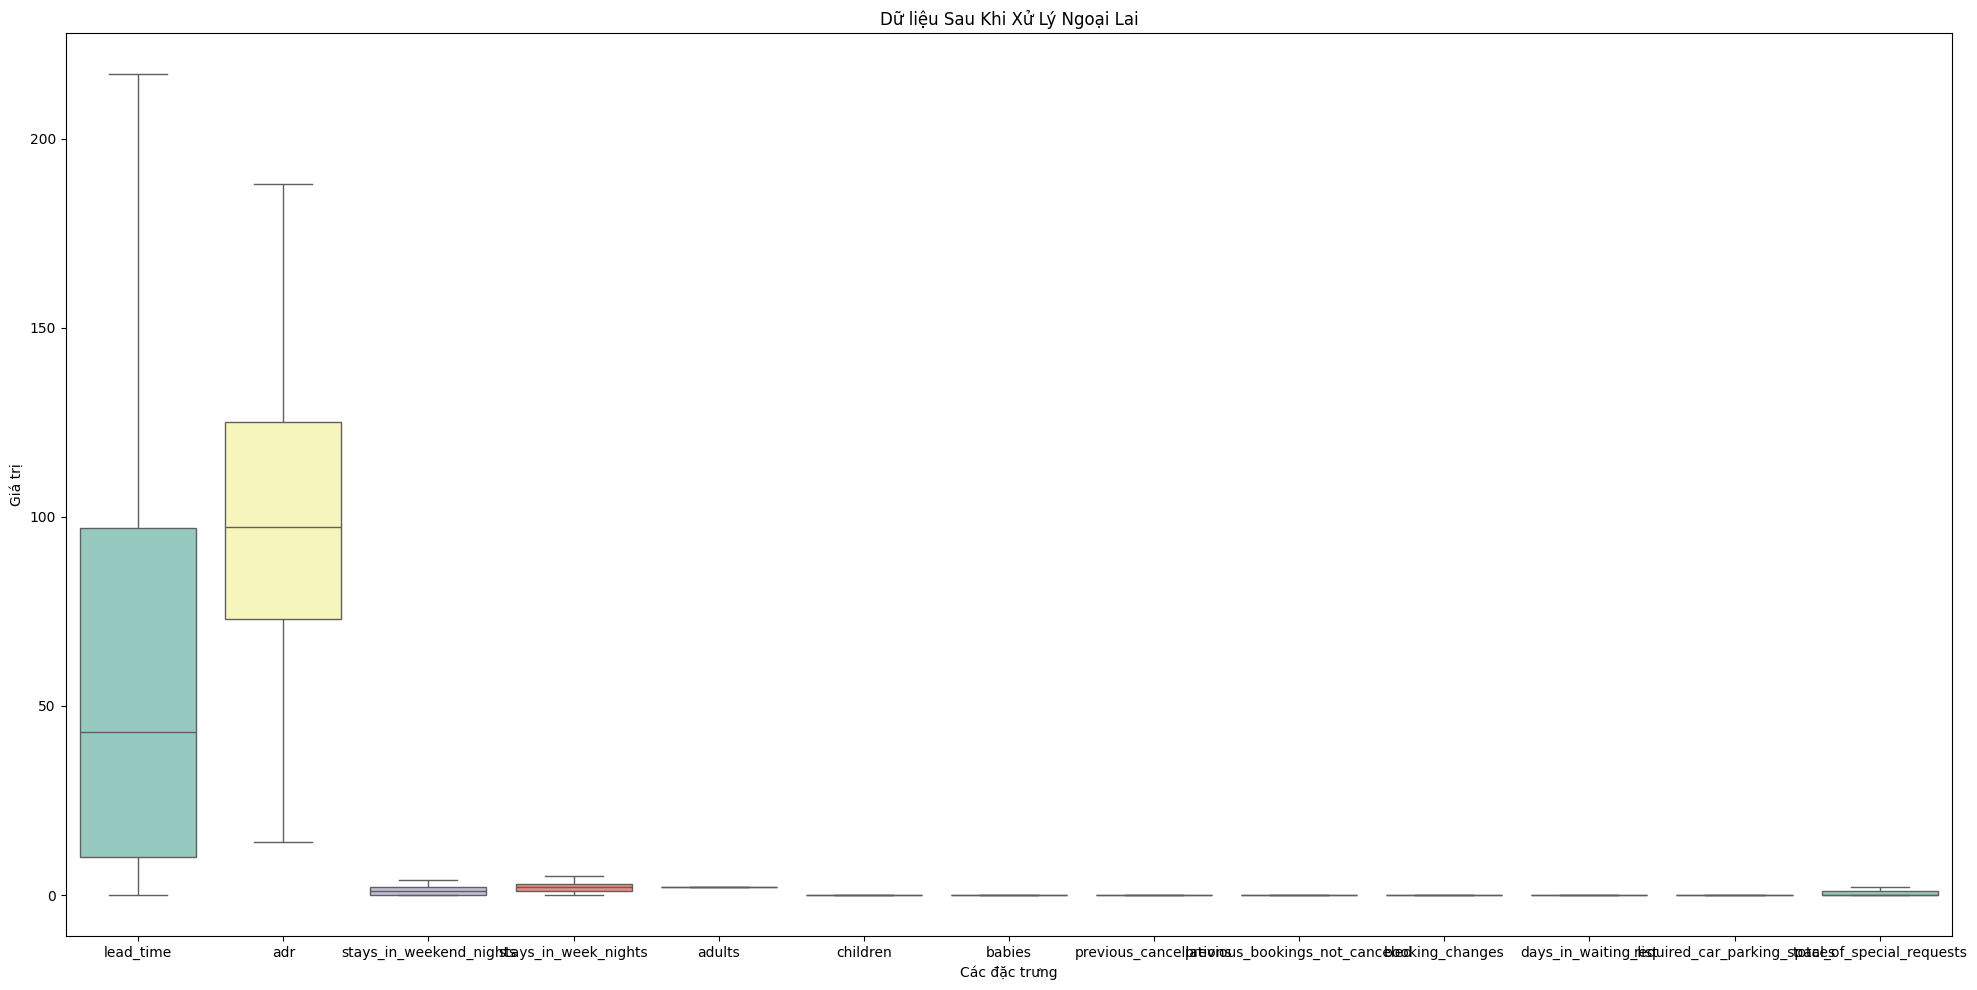

In [ ]:
import seaborn as sns

import matplotlib.pyplot as plt

# Danh sách các cột số cần trực quan hóa
columns_to_visualize = numeric_cols

    # Vẽ boxplot tất cả các cột trong một khung trước khi xử lý
plt.figure(figsize=(20, 10))
sns.boxplot(data=df_cleaned[columns_to_visualize], palette='Set2')
plt.title('Dữ liệu trước Khi Xử Lý Ngoại Lai')
plt.xlabel('Các đặc trưng')
plt.ylabel('Giá trị')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Vẽ boxplot tất cả các cột trong một khung sau khi xử lý
plt.figure(figsize=(20, 10))
sns.boxplot(data=df_cleaned[columns_to_visualize], palette='Set3')
plt.xlabel('Các đặc trưng')
plt.ylabel('Giá trị')
plt.title('Dữ liệu Sau Khi Xử Lý Ngoại Lai')  # Tiêu đề biểu đồ
plt.tight_layout()
plt.show()

In [ ]:
df_cleaned['adr'] = df_cleaned[(df_cleaned['adr']> 25) & (df_cleaned['adr']< 180)]['adr']


# TRực quan

## 1. Tổng quan dữ liệu & phân bố cơ bản

C:\Users\hsvie\AppData\Local\Temp\ipykernel_14656\3402454398.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='hotel', data=df_cleaned, palette='Set2', order=df['hotel'].value_counts().index)


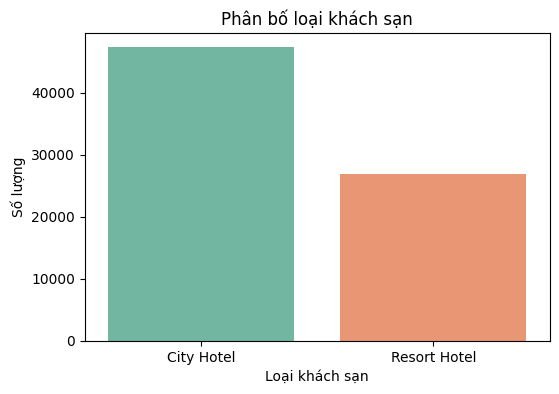

In [ ]:
# Biểu đồ phân bố loại khách sạn
plt.figure(figsize=(6,4))
sns.countplot(x='hotel', data=df_cleaned, palette='Set2', order=df_cleaned['hotel'].value_counts().index)
plt.title('Phân bố loại khách sạn')
plt.xlabel('Loại khách sạn')
plt.ylabel('Số lượng')
plt.show()

Nhận xét:

1. **Sự khác biệt về số lượng đặt phòng**:
    - City Hotel có số lượng đặt phòng cao hơn đáng kể so với Resort Hotel, với số lượng đặt phòng tại City Hotel gần gấp đôi so với Resort Hotel.
    - Điều này cho thấy City Hotel có thể phục vụ đối tượng khách hàng đa dạng hơn, bao gồm cả khách công tác và khách du lịch ngắn ngày, trong khi Resort Hotel chủ yếu phục vụ khách du lịch nghỉ dưỡng.

2. **Nguyên nhân tiềm năng**:
    - **Vị trí địa lý**: City Hotel thường nằm ở các khu vực trung tâm thành phố, thuận tiện cho khách công tác và khách du lịch muốn khám phá các điểm tham quan trong thành phố.
    - **Thời gian lưu trú**: Khách hàng của City Hotel có xu hướng lưu trú ngắn ngày hơn, phù hợp với các chuyến công tác hoặc du lịch ngắn hạn.
    - **Chi phí**: Giá phòng tại City Hotel có thể thấp hơn so với Resort Hotel, khiến nó trở thành lựa chọn phổ biến hơn đối với khách hàng nhạy cảm về giá.
    - **Mùa vụ**: Resort Hotel có thể phụ thuộc nhiều hơn vào mùa du lịch, trong khi City Hotel có nhu cầu ổn định hơn quanh năm.

3. **Tác động đến chiến lược kinh doanh**:
    - **City Hotel**:
      - Tập trung vào việc duy trì chất lượng dịch vụ và tối ưu hóa trải nghiệm cho khách công tác và khách du lịch ngắn ngày.
      - Cung cấp các gói ưu đãi cho khách hàng trung thành hoặc khách đặt phòng dài hạn để tăng doanh thu.
    - **Resort Hotel**:
      - Tăng cường quảng bá trong mùa thấp điểm để thu hút khách hàng, chẳng hạn như các gói nghỉ dưỡng gia đình hoặc ưu đãi đặc biệt.
      - Đầu tư vào các tiện ích và dịch vụ cao cấp để thu hút khách hàng cao cấp và khách du lịch quốc tế.


C:\Users\hsvie\AppData\Local\Temp\ipykernel_14656\1761852008.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='customer_type', data=df_cleaned, palette='Set2', order=df['customer_type'].value_counts().index)


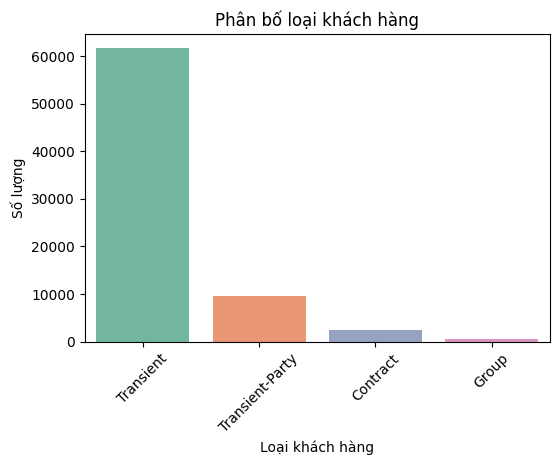

In [ ]:
# Biểu đồ phân bố loại khách hàng (customer_type)
plt.figure(figsize=(6,4))
sns.countplot(x='customer_type', data=df_cleaned, palette='Set2', order=df_cleaned['customer_type'].value_counts().index)
plt.title('Phân bố loại khách hàng')
plt.xlabel('Loại khách hàng')
plt.ylabel('Số lượng')
plt.xticks(rotation=45)
plt.show()

 Nhận xét

1. **Sự khác biệt giữa các loại khách hàng**:
    - **Transient**: Đây là nhóm khách hàng chiếm tỷ lệ lớn nhất, cho thấy rằng phần lớn khách hàng đặt phòng là những người đi du lịch ngắn ngày hoặc không thuộc nhóm cụ thể nào. Điều này phản ánh rằng khách sạn có thể đang phục vụ một lượng lớn khách hàng cá nhân hoặc khách du lịch tự túc.
    - **Transient-Party**: Nhóm này chiếm tỷ lệ nhỏ hơn so với Transient, nhưng vẫn đáng kể. Điều này cho thấy rằng một số khách hàng đi theo nhóm hoặc gia đình, có thể yêu cầu các dịch vụ bổ sung như phòng lớn hơn hoặc các tiện ích dành cho nhóm.
    - **Contract**: Nhóm khách hàng này chiếm tỷ lệ nhỏ, thường là các khách hàng doanh nghiệp hoặc khách hàng có hợp đồng dài hạn với khách sạn. Điều này phản ánh rằng khách sạn có thể không tập trung nhiều vào phân khúc khách hàng này.
    - **Group**: Đây là nhóm khách hàng chiếm tỷ lệ thấp nhất, thường là các đoàn du lịch hoặc nhóm lớn. Điều này có thể do khách sạn không chuyên phục vụ các đoàn lớn hoặc do đặc điểm của thị trường.

2. **Nguyên nhân tiềm năng**:
    - **Transient** chiếm tỷ lệ cao có thể do khách sạn nằm ở vị trí thuận tiện cho khách du lịch ngắn ngày hoặc khách công tác.
    - **Contract** và **Group** chiếm tỷ lệ thấp có thể do khách sạn không có nhiều chương trình hợp tác với doanh nghiệp hoặc không có đủ cơ sở vật chất để phục vụ các đoàn lớn.

3. **Tác động đến chiến lược kinh doanh**:
    - Việc Transient chiếm tỷ lệ lớn cho thấy khách sạn cần tập trung vào việc cung cấp các dịch vụ linh hoạt, phù hợp với nhu cầu của khách hàng cá nhân.
    - Tỷ lệ thấp của Contract và Group có thể là cơ hội để khách sạn mở rộng thị trường, bằng cách hợp tác với các doanh nghiệp hoặc tổ chức các chương trình khuyến mãi dành cho đoàn lớn.

4. **Khuyến nghị chiến lược**:
    - **Transient**:
        - Tăng cường các dịch vụ cá nhân hóa, như check-in nhanh, gợi ý các địa điểm du lịch gần khách sạn, hoặc các gói dịch vụ linh hoạt.
        - Cung cấp các chương trình khách hàng thân thiết để giữ chân nhóm khách hàng này.
    - **Transient-Party**:
        - Cung cấp các gói dịch vụ dành cho nhóm, như giảm giá khi đặt nhiều phòng hoặc các tiện ích bổ sung như phòng họp nhóm, khu vực BBQ, hoặc các hoạt động giải trí.
    - **Contract**:
        - Tăng cường hợp tác với các doanh nghiệp, cung cấp các gói dịch vụ dành riêng cho khách công tác, như phòng họp, dịch vụ đưa đón sân bay, hoặc các ưu đãi khi đặt phòng dài hạn.
    - **Group**:
        - Quảng bá các dịch vụ dành cho đoàn lớn, như tổ chức sự kiện, hội nghị, hoặc các chương trình team-building.
        - Đầu tư vào cơ sở vật chất để phục vụ tốt hơn các đoàn lớn, như phòng hội nghị, khu vực ăn uống lớn, hoặc các dịch vụ hỗ trợ đoàn.

5. **Kết luận**:
    - Biểu đồ cho thấy sự phân bố rõ ràng giữa các loại khách hàng, với Transient chiếm ưu thế. Hiểu rõ đặc điểm và nhu cầu của từng nhóm khách hàng sẽ giúp khách sạn tối ưu hóa chiến lược kinh doanh, nâng cao trải nghiệm khách hàng và tăng doanh thu.

C:\Users\hsvie\AppData\Local\Temp\ipykernel_14656\749572582.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='market_segment', data=df, palette='Set2', order=df['market_segment'].value_counts().index)


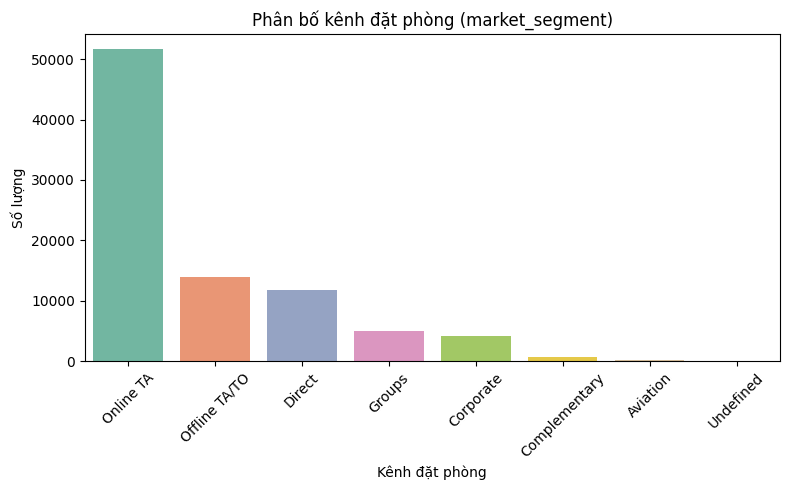

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='market_segment', data=df_cleaned, palette='Set2', order=df_cleaned['market_segment'].value_counts().index)
plt.title('Phân bố kênh đặt phòng (market_segment)')
plt.xlabel('Kênh đặt phòng')
plt.ylabel('Số lượng')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

 Nhận xét

1. **Sự khác biệt giữa các kênh phân phối**:
    - **Online TA (Travel Agent)**:
        - Đây là kênh phân phối chiếm tỷ lệ lớn nhất trong tổng số đặt phòng. Điều này phản ánh xu hướng khách hàng hiện đại ưa chuộng việc đặt phòng trực tuyến qua các đại lý du lịch.
        - Kênh này phù hợp với cả khách du lịch nghỉ dưỡng và khách công tác, nhờ tính tiện lợi và khả năng so sánh giá cả, dịch vụ.
    - **Offline TA/TO (Tour Operator)**:
        - Kênh này cũng chiếm tỷ lệ đáng kể, đặc biệt phổ biến với các đoàn du lịch hoặc khách hàng lớn tuổi, những người có xu hướng đặt phòng qua các công ty lữ hành truyền thống.
        - Resort Hotel thường nhận được nhiều đặt phòng hơn từ kênh này so với City Hotel, do các tour nghỉ dưỡng thường bao gồm dịch vụ lưu trú tại các khu nghỉ dưỡng.
    - **Direct (Trực tiếp)**:
        - Kênh này chiếm tỷ lệ thấp hơn so với Online TA, nhưng vẫn đóng vai trò quan trọng. Khách hàng đặt phòng trực tiếp thường là khách quen hoặc khách công tác, những người đã biết rõ về khách sạn.
    - **Corporate (Doanh nghiệp)**:
        - Đây là kênh phân phối phổ biến với City Hotel, do các doanh nghiệp thường đặt phòng cho nhân viên đi công tác. Tỷ lệ đặt phòng qua kênh này thấp hơn ở Resort Hotel.
    - **Undefined/Other**:
        - Kênh này chiếm tỷ lệ nhỏ nhất, có thể bao gồm các nguồn đặt phòng không phổ biến hoặc không được xác định rõ.

2. **Nguyên nhân dẫn đến sự khác biệt**:
    - **Đặc điểm khách hàng**:
        - Khách hàng của Resort Hotel thường là khách du lịch nghỉ dưỡng, có xu hướng đặt phòng qua các đại lý du lịch hoặc công ty lữ hành.
        - Khách hàng của City Hotel thường là khách công tác hoặc khách du lịch ngắn ngày, ưu tiên đặt phòng trực tiếp hoặc qua các kênh doanh nghiệp.
    - **Xu hướng công nghệ**:
        - Sự phát triển của các nền tảng đặt phòng trực tuyến đã thúc đẩy sự phổ biến của kênh Online TA, đặc biệt với thế hệ trẻ và khách hàng quốc tế.
    - **Chính sách giá và khuyến mãi**:
        - Các đại lý du lịch trực tuyến thường cung cấp nhiều ưu đãi và chương trình giảm giá, thu hút khách hàng đặt phòng qua kênh này.

3. **Tác động đến khách sạn**:
    - **Doanh thu**:
        - Kênh Online TA mang lại lượng đặt phòng lớn, nhưng cũng đi kèm với chi phí hoa hồng cao, ảnh hưởng đến lợi nhuận của khách sạn.
    - **Quản lý kênh phân phối**:
        - Sự phụ thuộc vào các kênh phân phối bên thứ ba như Online TA và Offline TA/TO có thể làm giảm khả năng kiểm soát giá cả và dịch vụ của khách sạn.
    - **Chiến lược tiếp thị**:
        - Các khách sạn cần cân nhắc phân bổ nguồn lực tiếp thị phù hợp giữa các kênh phân phối để tối ưu hóa doanh thu và giảm chi phí.

4. **Khuyến nghị chiến lược**:
    - **Tăng cường đặt phòng trực tiếp**:
        - Cung cấp các ưu đãi đặc biệt cho khách hàng đặt phòng trực tiếp, như giảm giá, nâng cấp phòng miễn phí, hoặc điểm thưởng cho chương trình khách hàng thân thiết.
        - Tăng cường quảng bá website và ứng dụng đặt phòng của khách sạn để thu hút khách hàng.
    - **Hợp tác chặt chẽ với các đại lý du lịch**:
        - Đàm phán để giảm chi phí hoa hồng và đảm bảo khách sạn được ưu tiên hiển thị trên các nền tảng đặt phòng trực tuyến.
        - Cung cấp các gói dịch vụ độc quyền cho các đại lý du lịch để thu hút khách hàng.
    - **Phân tích dữ liệu khách hàng**:
        - Sử dụng dữ liệu từ các kênh phân phối để hiểu rõ hơn về hành vi và nhu cầu của khách hàng, từ đó điều chỉnh chiến lược giá và dịch vụ phù hợp.
    - **Đa dạng hóa kênh phân phối**:
        - Giảm sự phụ thuộc vào một kênh phân phối duy nhất bằng cách mở rộng hợp tác với các kênh khác, như Corporate hoặc Direct.


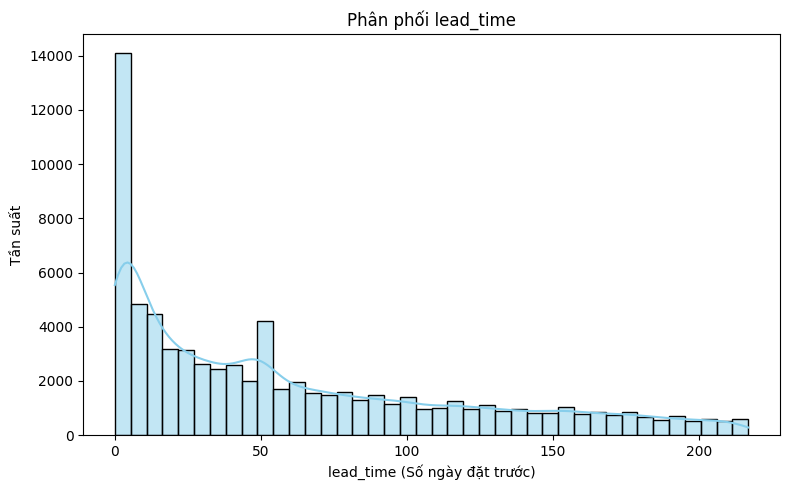

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df_cleaned['lead_time'], bins=40, kde=True, color='skyblue')
plt.title('Phân phối lead_time')
plt.xlabel('lead_time (Số ngày đặt trước)')
plt.ylabel('Tần suất')
plt.tight_layout()
plt.show()

 Nhận xét

 **Xu hướng phân phối**:
    - Biểu đồ phân phối cho thấy phần lớn giá trị **lead_time** tập trung ở khoảng từ **0 đến 100 ngày**, với đỉnh phân phối nằm ở khoảng **50 ngày**. Điều này cho thấy rằng khách hàng thường đặt phòng trước khoảng 1-3 tháng.
    - Một số giá trị ngoại lai xuất hiện ở mức **lead_time** rất cao (trên 300 ngày), phản ánh rằng một số khách hàng có kế hoạch du lịch dài hạn và đặt phòng từ rất sớm.

 **Nguyên nhân tiềm năng**:
    - **Đặc điểm khách hàng**:
      - Khách hàng đặt phòng trước từ 1-3 tháng thường là khách du lịch hoặc khách công tác có kế hoạch rõ ràng.
      - Các giá trị ngoại lai với **lead_time** cao có thể liên quan đến các sự kiện lớn, kỳ nghỉ lễ, hoặc khách hàng quốc tế cần chuẩn bị kỹ lưỡng.

 **Tác động đến khách sạn**:
    - **Quản lý phòng trống**:
      - Phần lớn đặt phòng tập trung ở khoảng **lead_time** ngắn (dưới 100 ngày) giúp khách sạn dễ dàng dự đoán nhu cầu và quản lý phòng trống.
      - Tuy nhiên, các giá trị ngoại lai với **lead_time** cao có thể gây khó khăn trong việc dự đoán nhu cầu dài hạn.
    - **Tỷ lệ hủy đặt phòng**:
      - Khách hàng đặt phòng sớm có thể có tỷ lệ hủy cao hơn do họ có nhiều thời gian để thay đổi kế hoạch.

1. **Phân phối lệch phải**:
    - Phần lớn khách hàng đặt phòng gần ngày đến, với **lead_time** nhỏ hơn 20 ngày. Điều này cho thấy xu hướng phổ biến của khách hàng là đặt phòng sát ngày lưu trú, có thể để đảm bảo tính linh hoạt trong kế hoạch du lịch hoặc công tác.
    - Tần suất cao nhất nằm trong khoảng vài ngày đầu tiên trước ngày đến, phản ánh rằng nhiều khách hàng có nhu cầu đặt phòng gấp hoặc không có kế hoạch dài hạn.

2. **Số lượng khách đặt phòng trước nhiều ngày**:
    - Một lượng khách đáng kể đặt phòng cách ngày đến khá xa (trên 50 ngày). Tuy nhiên, tần suất giảm dần khi số ngày đặt trước tăng lên, cho thấy rằng việc đặt phòng sớm không phải là xu hướng phổ biến đối với phần lớn khách hàng.
    - Những khách hàng này có thể là khách du lịch quốc tế, khách đoàn, hoặc những người tham gia các sự kiện lớn cần đảm bảo chỗ trước.

3. **Đặc điểm đặt phòng**:
    - Phần lớn khách hàng đặt phòng trong vòng **1 tháng trước ngày đến**, chiếm tỷ lệ lớn trong tổng số đặt phòng. Điều này phản ánh rằng khách hàng thường ưu tiên sự linh hoạt trong kế hoạch, đặc biệt là trong các chuyến công tác hoặc du lịch ngắn ngày.
    - Xu hướng này cũng có thể liên quan đến các chính sách giá của khách sạn, như giảm giá cho các đặt phòng gần ngày lưu trú.

4. **Giá trị ngoại lai hoặc cực đoan**:
    - Có một số điểm dữ liệu cho thấy khách hàng đặt phòng rất xa ngày đến (gần **200-220 ngày**). Đây có thể là các khách hàng đặc biệt, như khách đoàn, khách hàng doanh nghiệp, hoặc những người đặt phòng cho các sự kiện lớn hoặc kỳ nghỉ lễ dài hạn.
    - Những giá trị ngoại lai này tuy không phổ biến nhưng có thể ảnh hưởng đến chiến lược quản lý phòng và dự đoán nhu cầu của khách sạn.

5. **Đường KDE (Kernel Density Estimation)**:
    - Đường KDE cho thấy sự phân bố mượt mà của dữ liệu, xác nhận xu hướng giảm dần tần suất theo số ngày đặt trước. Điều này giúp làm rõ hơn sự tập trung của dữ liệu ở các khoảng thời gian ngắn trước ngày đến.

6. **Tác động đến chiến lược kinh doanh**:
    - **Quản lý phòng trống**: Khách sạn cần tối ưu hóa việc quản lý phòng trống để đáp ứng nhu cầu đặt phòng gấp, đồng thời dự đoán chính xác nhu cầu trong tương lai dựa trên các đặt phòng sớm.
    - **Chính sách giá**: Cân nhắc áp dụng các chính sách giá linh hoạt, như giảm giá cho các đặt phòng sớm hoặc ưu đãi cho các đặt phòng gần ngày lưu trú, để tối ưu hóa doanh thu.
    - **Giao tiếp với khách hàng**: Tăng cường giao tiếp với nhóm khách hàng đặt phòng sớm để đảm bảo họ giữ đặt phòng, đồng thời cung cấp các tùy chọn linh hoạt cho nhóm khách hàng đặt phòng gấp.

C:\Users\hsvie\AppData\Local\Temp\ipykernel_14656\3154224350.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette='Set2')


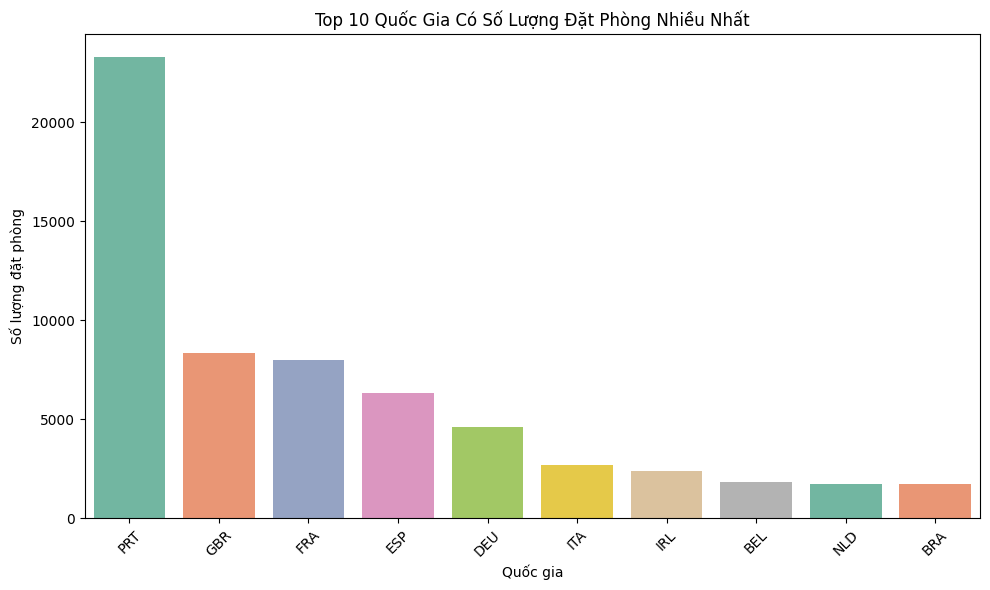

In [ ]:
# Vẽ biểu đồ phân phối quốc gia khách hàng (top 10 quốc gia có số lượng đặt phòng nhiều nhất)
top_countries = df_cleaned['country'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='Set2')
plt.title('Top 10 Quốc Gia Có Số Lượng Đặt Phòng Nhiều Nhất')
plt.xlabel('Quốc gia')
plt.ylabel('Số lượng đặt phòng')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Nhận xét

Tổng quan :

PRT (Bồ Đào Nha) đứng đầu bảng với số lượng đặt phòng vượt trội, gần gấp đôi quốc gia đứng thứ hai.

Các quốc gia như GBR (Anh), FRA (Pháp), ESP (Tây Ban Nha), DEU (Đức) cũng chiếm số lượng lớn, thể hiện khách du lịch từ các nước châu Âu rất phổ biến trong dữ liệu.

Các quốc gia khác trong top 10 như ITA (Ý), IRL (Ireland), BEL (Bỉ), NLD (Hà Lan), BRA (Brazil) cũng có lượng khách đặt phòng đáng kể nhưng ít hơn đáng kể so với nhóm đầu.

phân tích :

1. **Quốc gia có số lượng đặt phòng cao nhất**:
    - **Bồ Đào Nha (PRT)** chiếm tỷ lệ lớn nhất trong tổng số đặt phòng, vượt xa các quốc gia khác. Điều này cho thấy khách hàng nội địa là nhóm khách hàng chính của khách sạn.

2. **Các quốc gia có số lượng đặt phòng đáng kể khác**:
    - **Anh (GBR)**, **Pháp (FRA)**, **Tây Ban Nha (ESP)** và **Đức (DEU)** là những quốc gia có số lượng đặt phòng cao tiếp theo. Điều này phản ánh rằng khách hàng quốc tế, đặc biệt từ châu Âu, đóng vai trò quan trọng trong doanh thu của khách sạn.

3. **Sự khác biệt giữa các quốc gia**:
    - Các quốc gia như **Ý (ITA)**, **Ireland (IRL)** và **Brazil (BRA)** có số lượng đặt phòng thấp hơn so với nhóm dẫn đầu, nhưng vẫn đáng chú ý. Điều này có thể do khoảng cách địa lý, chi phí du lịch hoặc mức độ phổ biến của điểm đến.

4. **Nguyên nhân tiềm năng**:
    - **Vị trí địa lý**: Bồ Đào Nha là quốc gia nội địa, nên khách hàng từ đây dễ dàng tiếp cận khách sạn hơn so với khách quốc tế.
    - **Kết nối giao thông**: Các quốc gia châu Âu như Anh, Pháp, Tây Ban Nha và Đức có kết nối giao thông thuận tiện đến Bồ Đào Nha, thúc đẩy du lịch quốc tế.
    - **Sự phổ biến của điểm đến**: Bồ Đào Nha là điểm đến du lịch nổi tiếng, thu hút khách từ các quốc gia châu Âu lân cận.

5. **Tác động đến chiến lược kinh doanh**:
    - **Khách hàng nội địa**:
        - Tập trung vào việc duy trì và nâng cao trải nghiệm cho khách hàng nội địa, vì đây là nhóm khách hàng chính.
        - Cung cấp các chương trình khuyến mãi hoặc ưu đãi đặc biệt để giữ chân khách hàng nội địa.
    - **Khách hàng quốc tế**:
        - Tăng cường quảng bá tại các quốc gia châu Âu như Anh, Pháp, Tây Ban Nha và Đức để thu hút thêm khách quốc tế.
        - Hợp tác với các đại lý du lịch quốc tế để mở rộng thị trường.
    - **Đa dạng hóa thị trường**:
        - Khai thác các thị trường tiềm năng như Mỹ, Canada hoặc châu Á để giảm sự phụ thuộc vào khách hàng châu Âu.


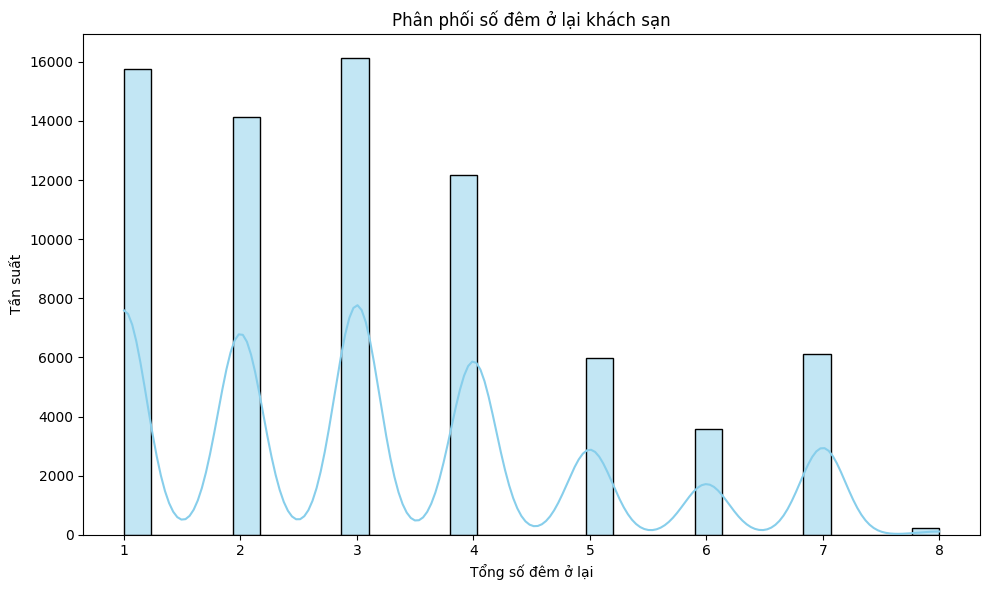

In [ ]:
# Tính tổng số đêm ở lại
df_cleaned['total_nights'] = df_cleaned['stays_in_weekend_nights'] + df_cleaned['stays_in_week_nights']
df_cleaned['total_nights'] = df_cleaned[df_cleaned['total_nights'] < 9 ]['total_nights']


# Vẽ biểu đồ phân phối tổng số đêm ở lại
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['total_nights'], bins=30, kde=True, color='skyblue')
plt.title('Phân phối số đêm ở lại khách sạn')
plt.xlabel('Tổng số đêm ở lại')
plt.ylabel('Tần suất')
plt.tight_layout()
plt.show()

Nhận xét

1. **Xu hướng tổng quan**:
    - Biểu đồ cho thấy phần lớn khách hàng lưu trú tại khách sạn trong khoảng từ **1 đến 3 đêm**, với đỉnh phân phối nằm ở **2 đêm**. Điều này phản ánh rằng khách sạn chủ yếu phục vụ các chuyến đi ngắn ngày, bao gồm cả du lịch và công tác.
    - Số lượng khách lưu trú giảm dần khi số đêm ở lại tăng, cho thấy rằng các chuyến lưu trú dài ngày ít phổ biến hơn.

2. **Nguyên nhân tiềm năng**:
    - **Đặc điểm khách hàng**:
        - Khách hàng của City Hotel thường là khách công tác hoặc khách du lịch ngắn ngày, dẫn đến thời gian lưu trú ngắn.
        - Khách hàng của Resort Hotel có thể lưu trú dài ngày hơn, nhưng vẫn chiếm tỷ lệ nhỏ hơn so với các chuyến đi ngắn ngày.
    - **Mục đích lưu trú**:
        - Các chuyến công tác hoặc du lịch ngắn ngày thường kéo dài từ 1 đến 3 đêm, phù hợp với xu hướng phân phối trong biểu đồ.
        - Các chuyến nghỉ dưỡng dài ngày thường ít phổ biến hơn, do chi phí cao hoặc lịch trình hạn chế của khách hàng.
    - **Chi phí và tiện nghi**:
        - Chi phí lưu trú cao có thể khiến khách hàng giới hạn thời gian lưu trú.
        - Các tiện nghi và dịch vụ của khách sạn có thể phù hợp hơn với các chuyến đi ngắn ngày, thay vì các kỳ nghỉ dài hạn.

3. **Tác động đến khách sạn**:
    - Thời gian lưu trú ngắn có thể làm tăng tỷ lệ luân chuyển phòng, đòi hỏi khách sạn phải tối ưu hóa quy trình dọn phòng và quản lý đặt phòng.
    - Các chuyến lưu trú dài ngày có thể mang lại doanh thu cao hơn trên mỗi khách hàng, nhưng cần đầu tư vào các dịch vụ và tiện nghi để thu hút nhóm khách hàng này.

4. **Khuyến nghị chiến lược**:
    - **Tối ưu hóa dịch vụ cho khách lưu trú ngắn ngày**:
        - Cung cấp các gói dịch vụ linh hoạt, như check-in/check-out nhanh, để đáp ứng nhu cầu của khách hàng ngắn ngày.
        - Tăng cường các tiện ích cơ bản, như bữa sáng nhanh hoặc dịch vụ đưa đón, để nâng cao trải nghiệm của khách hàng.
    - **Thu hút khách lưu trú dài ngày**:
        - Cung cấp các gói ưu đãi cho khách lưu trú dài ngày, như giảm giá theo số đêm lưu trú hoặc các dịch vụ miễn phí bổ sung.
        - Đầu tư vào các tiện nghi và hoạt động giải trí, như spa, tour du lịch, hoặc khu vực làm việc, để thu hút khách hàng nghỉ dưỡng hoặc làm việc từ xa.
    - **Phân tích hành vi khách hàng**:
        - Sử dụng dữ liệu để xác định các yếu tố ảnh hưởng đến thời gian lưu trú, như giá cả, mục đích lưu trú, hoặc các yếu tố mùa vụ.
        - Tùy chỉnh chiến lược tiếp thị và dịch vụ dựa trên đặc điểm của từng nhóm khách hàng.


## 2. Phân tích hành vi đặt phòng & giá trị kinh doanh

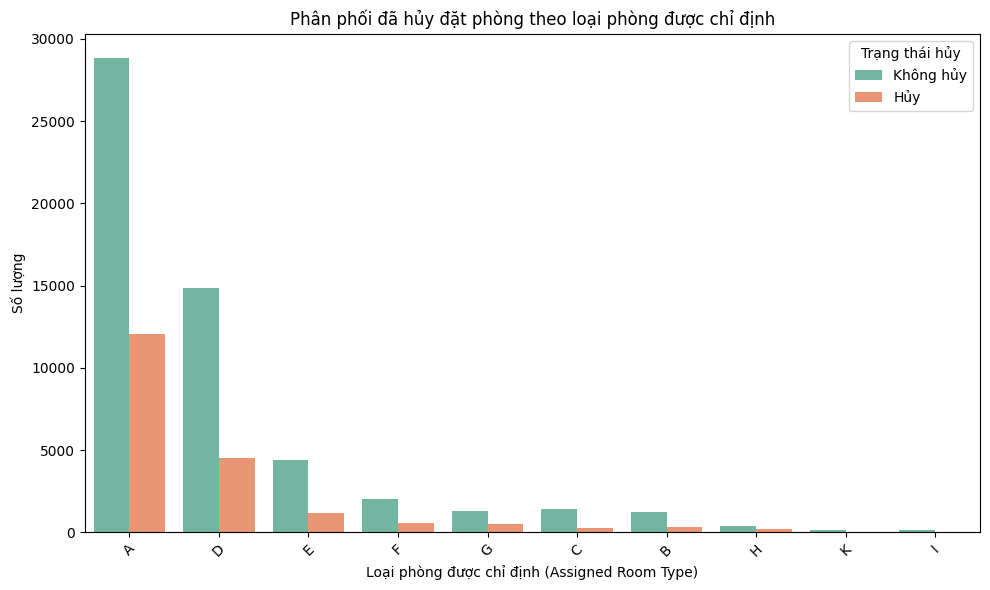

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='assigned_room_type', hue='is_canceled', data=df_cleaned, palette='Set2', order=df_cleaned['assigned_room_type'].value_counts().index)
plt.title('Phân phối đã hủy đặt phòng theo loại phòng được chỉ định')
plt.xlabel('Loại phòng được chỉ định (Assigned Room Type)')
plt.ylabel('Số lượng')
plt.legend(title='Trạng thái hủy', labels=['Không hủy', 'Hủy'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Tổng quan
Biểu đồ "Phân phối đã hủy đặt phòng theo loại phòng được chỉ định" cung cấp một cái nhìn trực quan về mối quan hệ giữa loại phòng được chỉ định (Assigned Room Type) và trạng thái hủy đặt phòng (is_canceled). Đây là một yếu tố quan trọng trong việc hiểu hành vi khách hàng và tối ưu hóa chiến lược kinh doanh khách sạn.

Từ biểu đồ, chúng ta có thể thấy sự khác biệt rõ rệt về tỷ lệ hủy đặt phòng giữa các loại phòng, với một số loại phòng có tỷ lệ hủy cao hơn đáng kể so với các loại khác. Điều này gợi ý rằng loại phòng được chỉ định có thể đóng vai trò quan trọng trong quyết định hủy đặt phòng của khách hàng.


### Phân tích
1. **Sự chênh lệch giữa các loại phòng**:
    - Một số loại phòng như **A** và **D** có tỷ lệ hủy đặt phòng cao hơn đáng kể so với các loại phòng khác. Điều này có thể phản ánh sự không hài lòng của khách hàng với loại phòng được chỉ định, hoặc có thể do các yếu tố khác như giá cả, tiện nghi không đáp ứng kỳ vọng, hoặc sự không nhất quán giữa phòng đặt ban đầu và phòng được chỉ định.
    - Ngược lại, các loại phòng như **C** và **E** có tỷ lệ hủy thấp hơn, cho thấy khách hàng có xu hướng giữ đặt phòng khi được chỉ định các loại phòng này. Điều này có thể liên quan đến sự hài lòng cao hơn về chất lượng phòng hoặc giá trị mà các loại phòng này mang lại.

2. **Tác động của sự không khớp giữa phòng đặt và phòng được chỉ định**:
    - Một số khách hàng có thể hủy đặt phòng nếu loại phòng được chỉ định không khớp với loại phòng họ mong muốn. Điều này đặc biệt phổ biến trong các mùa cao điểm, khi khách sạn có thể không đáp ứng được yêu cầu cụ thể của khách hàng.

3. **Sự khác biệt về hành vi khách hàng**:
    - Các loại phòng có giá cao hơn hoặc tiện nghi đặc biệt có thể thu hút một nhóm khách hàng cụ thể, nhưng cũng có thể dẫn đến tỷ lệ hủy cao hơn nếu khách hàng cảm thấy giá trị không tương xứng với chi phí.


### Chiến lược áp dụng thực tế
1. **Cải thiện quy trình phân bổ phòng**:
    - Đảm bảo rằng loại phòng được chỉ định khớp với loại phòng mà khách hàng đã đặt ban đầu. Điều này có thể giảm thiểu sự không hài lòng và tỷ lệ hủy đặt phòng.
    - Sử dụng hệ thống quản lý phòng thông minh để tối ưu hóa việc phân bổ phòng, đặc biệt trong các mùa cao điểm.

2. **Tăng cường giao tiếp với khách hàng**:
    - Thông báo trước cho khách hàng về loại phòng được chỉ định và cung cấp các tùy chọn thay thế nếu loại phòng không khớp với mong muốn ban đầu.
    - Cung cấp các ưu đãi hoặc giảm giá nếu khách hàng đồng ý với loại phòng được chỉ định khác, nhằm giảm tỷ lệ hủy.

3. **Phân tích sâu hơn về loại phòng**:
    - Tiến hành khảo sát khách hàng để hiểu rõ hơn về lý do họ hủy đặt phòng khi được chỉ định một số loại phòng cụ thể.
    - Đầu tư nâng cấp các loại phòng có tỷ lệ hủy cao, cải thiện tiện nghi và trải nghiệm để tăng sự hài lòng của khách hàng.

4. **Tối ưu hóa chiến lược giá**:
    - Điều chỉnh giá phòng dựa trên tỷ lệ hủy và mức độ phổ biến của từng loại phòng. Ví dụ, giảm giá cho các loại phòng có tỷ lệ hủy cao để thu hút khách hàng, hoặc tăng giá cho các loại phòng có tỷ lệ hủy thấp để tối ưu hóa doanh thu.

5. **Cá nhân hóa trải nghiệm khách hàng**:
    - Sử dụng dữ liệu từ các lần đặt phòng trước để dự đoán loại phòng mà khách hàng có khả năng hài lòng nhất, từ đó tăng tỷ lệ giữ đặt phòng.
    - Cung cấp các gói dịch vụ bổ sung hoặc nâng cấp phòng để tăng giá trị và giảm tỷ lệ hủy.

---


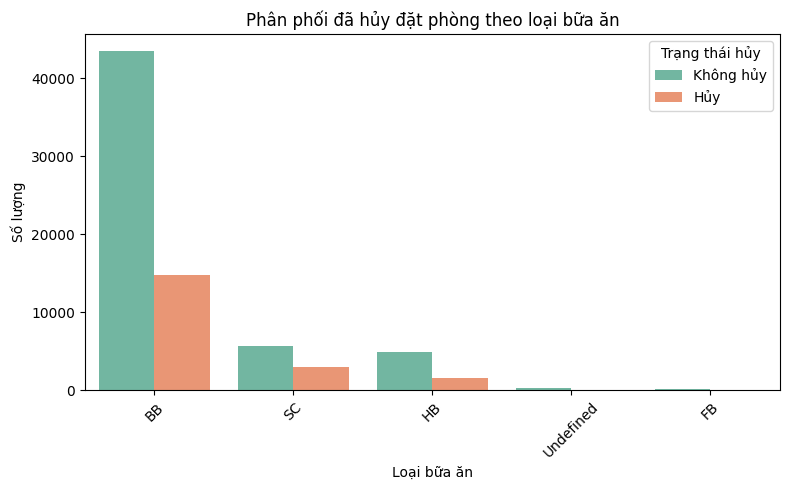

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='meal', hue='is_canceled', data=df_cleaned, palette='Set2', order=df_cleaned['meal'].value_counts().index)
plt.title('Phân phối đã hủy đặt phòng theo loại bữa ăn')
plt.xlabel('Loại bữa ăn')
plt.ylabel('Số lượng')
plt.legend(title='Trạng thái hủy', labels=['Không hủy', 'Hủy'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Tổng quan

Biểu đồ "Phân phối đã hủy đặt phòng theo loại bữa ăn" cung cấp một cái nhìn trực quan về mối quan hệ giữa loại bữa ăn mà khách hàng lựa chọn và tỷ lệ hủy đặt phòng. Đây là một yếu tố quan trọng trong việc hiểu hành vi khách hàng và tối ưu hóa chiến lược kinh doanh khách sạn. Từ biểu đồ, chúng ta có thể thấy sự khác biệt rõ rệt về tỷ lệ hủy đặt phòng giữa các loại bữa ăn, với một số loại bữa ăn có tỷ lệ hủy cao hơn đáng kể so với các loại khác. Điều này gợi ý rằng loại bữa ăn có thể đóng vai trò quan trọng trong quyết định giữ hay hủy đặt phòng của khách hàng.

---

### Phân tích

1. **Sự chênh lệch giữa các loại bữa ăn**:
    - Loại bữa ăn **SC (Self Catering)** có tỷ lệ hủy đặt phòng cao nhất. Điều này có thể phản ánh rằng khách hàng chọn SC thường có xu hướng linh hoạt hơn trong kế hoạch của họ, dẫn đến việc dễ dàng hủy đặt phòng khi có thay đổi.
    - Ngược lại, các loại bữa ăn như **FB (Full Board)** và **HB (Half Board)** có tỷ lệ hủy thấp hơn. Điều này cho thấy khách hàng chọn các gói bữa ăn đầy đủ thường có kế hoạch rõ ràng hơn và ít có khả năng thay đổi quyết định.

2. **Tác động của giá trị bữa ăn đến quyết định hủy**:
    - Các gói bữa ăn như **BB (Bed & Breakfast)** có tỷ lệ hủy trung bình, cho thấy rằng khách hàng chọn BB có thể đang tìm kiếm sự cân bằng giữa chi phí và tiện nghi. Tuy nhiên, họ vẫn có khả năng hủy nếu tìm thấy lựa chọn tốt hơn.
    - Loại bữa ăn SC, mặc dù có chi phí thấp hơn, lại không mang lại sự cam kết cao từ khách hàng, dẫn đến tỷ lệ hủy cao.

3. **Hành vi khách hàng theo loại bữa ăn**:
    - Khách hàng chọn các gói bữa ăn đầy đủ như FB hoặc HB có thể là những người đi du lịch theo gia đình hoặc nhóm, với kế hoạch chi tiết và ít thay đổi. Trong khi đó, khách hàng chọn SC thường là những người đi du lịch tự túc, linh hoạt và dễ thay đổi kế hoạch.


### Chiến lược áp dụng thực tế

1. **Tăng cường giá trị cho các gói bữa ăn**:
    - Đối với loại bữa ăn SC, khách sạn có thể cung cấp các ưu đãi bổ sung như giảm giá cho các dịch vụ ăn uống tại chỗ hoặc gói nâng cấp lên BB với chi phí thấp. Điều này không chỉ tăng giá trị cho khách hàng mà còn giảm tỷ lệ hủy đặt phòng.
    - Với các gói bữa ăn FB và HB, khách sạn nên tiếp tục duy trì chất lượng dịch vụ và quảng bá mạnh mẽ để thu hút nhóm khách hàng có kế hoạch rõ ràng.

2. **Cá nhân hóa trải nghiệm khách hàng**:
    - Sử dụng dữ liệu từ các lần đặt phòng trước để dự đoán loại bữa ăn mà khách hàng có khả năng hài lòng nhất. Ví dụ, khách hàng thường xuyên chọn BB có thể được gợi ý các gói nâng cấp lên HB hoặc FB với ưu đãi đặc biệt.

3. **Tối ưu hóa chiến lược giá**:
    - Điều chỉnh giá cho các loại bữa ăn dựa trên tỷ lệ hủy và mức độ phổ biến. Ví dụ, giảm giá cho SC để thu hút khách hàng cam kết hơn, hoặc tăng giá nhẹ cho FB và HB để tối ưu hóa doanh thu từ nhóm khách hàng ít hủy.

4. **Tăng cường giao tiếp với khách hàng**:
    - Gửi email hoặc thông báo nhắc nhở về các lợi ích của gói bữa ăn đã chọn, đồng thời cung cấp các tùy chọn linh hoạt để thay đổi gói bữa ăn nếu khách hàng có nhu cầu. Điều này giúp tăng sự hài lòng và giảm tỷ lệ hủy.

5. **Phân tích sâu hơn về hành vi khách hàng**:
    - Tiến hành khảo sát để hiểu rõ hơn lý do khách hàng chọn hoặc hủy các loại bữa ăn cụ thể. Từ đó, khách sạn có thể điều chỉnh dịch vụ và chiến lược tiếp thị phù hợp hơn.



### Kết luận

Biểu đồ không chỉ giúp nhận diện các loại bữa ăn có tỷ lệ hủy cao mà còn cung cấp thông tin giá trị về hành vi khách hàng. Bằng cách áp dụng các chiến lược phù hợp, khách sạn có thể giảm tỷ lệ hủy đặt phòng, tăng doanh thu và cải thiện trải nghiệm khách hàng. Điều này không chỉ mang lại lợi ích ngắn hạn mà còn xây dựng lòng trung thành của khách hàng trong dài hạn.

Biểu đồ thể hiện phân bổ đặt phòng theo kênh phân phối (market segment)

![image.png](attachment:image.png)

 Nhận xét

#### **Tổng quan (Bức tranh lớn)**
Biểu đồ phân bổ đặt phòng theo kênh phân phối (market segment) cho thấy sự khác biệt rõ rệt giữa các kênh:
- **Online TA (Travel Agent)**: Chiếm tỷ lệ lớn nhất với **47.3%**, cho thấy khách hàng ưa chuộng đặt phòng qua các nền tảng trực tuyến như Booking.com, Agoda.
- **Offline TA/TO (Tour Operator)** và **Groups**: Lần lượt chiếm **20.3%** và **16.6%**, phản ánh vai trò quan trọng của các kênh truyền thống và khách đoàn.
- **Direct**: Chỉ chiếm **10.6%**, cho thấy tiềm năng chưa được khai thác đầy đủ.
- **Corporate**: Đóng góp **4.43%**, là phân khúc ổn định với khách công tác.
- **Complementary/Aviation**: Chiếm tỷ lệ rất nhỏ (**<1%**), chủ yếu phục vụ khách VIP hoặc nhân viên hàng không.

#### **Phân tích sâu**

1. **Online TA (47.3%) – Kênh thống trị**
    - **Nguyên nhân**:
      - Tiện lợi, dễ dàng so sánh giá và đặt phòng nhanh chóng qua các nền tảng như Booking.com, Agoda.
      - Các ưu đãi hấp dẫn từ bên thứ ba như giảm giá, tích điểm.
    - **Rủi ro**:
      - Khách sạn phụ thuộc nhiều vào các nền tảng này, phải trả phí hoa hồng cao (15–30% mỗi đêm).
      - Giảm khả năng kiểm soát dữ liệu khách hàng.

2. **Offline TA/TO (20.3%) và Groups (16.6%) – Kênh truyền thống**
    - **Đặc thù**:
      - **Groups**: Phục vụ khách đoàn, thường đi theo mùa (sự kiện, du lịch tập thể).
      - **Offline TA/TO**: Phù hợp với khách hàng thiếu kỹ năng công nghệ hoặc cần tư vấn trực tiếp.
    - **Thách thức**:
      - Chi phí vận hành cao, bao gồm nhân sự và hợp đồng giấy tờ.
      - Khả năng cạnh tranh thấp hơn so với các nền tảng trực tuyến.

3. **Direct (10.6%) – Tiềm năng bị bỏ quên**
    - **Hiện trạng**:
      - Tỷ lệ thấp do thiếu các ưu đãi cạnh tranh so với Online TA.
    - **Cơ hội**:
      - Tăng tỷ lệ đặt phòng trực tiếp giúp khách sạn giảm phí hoa hồng và chủ động kiểm soát dữ liệu khách hàng.
      - Xây dựng lòng trung thành thông qua các chương trình ưu đãi độc quyền.

4. **Corporate (4.43%) – Phân khúc ổn định**
    - **Đối tượng**:
      - Khách công tác, doanh nhân.
    - **Lợi thế**:
      - Hợp đồng dài hạn, tỷ lệ hủy đặt phòng thấp.
      - Mang lại nguồn doanh thu ổn định cho khách sạn.

5. **Complementary/Aviation (<1%) – Kênh đặc thù**
    - **Đặc thù**:
      - Phục vụ khách VIP (miễn phí) hoặc nhân viên hàng không.
    - **Ý nghĩa**:
      - Mang tính quan hệ đối tác hơn là nguồn doanh thu chính.

#### **Chiến lược hành động (Kết thúc có hậu)**

1. **Tối ưu kênh Online TA**:
    - Đàm phán giảm phí hoa hồng với các đối tác lớn nếu kênh này chiếm hơn **40% doanh thu**.
    - Tích hợp công nghệ quản lý phòng và giá tự động để tránh tình trạng "overbooking".

2. **Phát triển kênh Direct – "Vũ khí bí mật"**:
    - Cung cấp **ưu đãi độc quyền** trên website, như giảm giá **5%** hoặc tặng bữa sáng miễn phí.
    - Sử dụng **Email Marketing** để nhắc nhở khách hàng từng đặt qua Online TA chuyển sang đặt trực tiếp.
    - Xây dựng **Loyalty Program**: Tích điểm đổi phòng hoặc dịch vụ spa, tạo động lực cho khách hàng quay lại.

3. **Khai thác Groups & Corporate**:
    - Ký hợp đồng ưu đãi với các công ty du lịch hoặc tổ chức sự kiện để thu hút khách đoàn.
    - Cung cấp các dịch vụ bổ sung như **team-building**, phòng họp kèm phòng ngủ để tăng giá trị cho khách hàng.


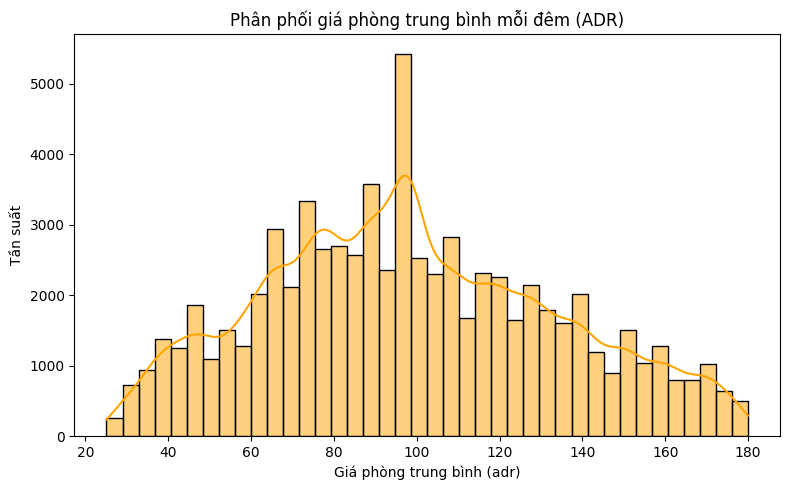

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df_cleaned['adr'], bins=40, kde=True, color='orange')
plt.title('Phân phối giá phòng trung bình mỗi đêm (ADR)')
plt.xlabel('Giá phòng trung bình (adr)')
plt.ylabel('Tần suất')
plt.tight_layout()
plt.show()

### Tổng quan
 Từ biểu đồ, chúng ta có thể thấy rằng giá phòng trung bình (ADR) có sự tập trung cao ở một khoảng giá nhất định, với một số giá trị ngoại lai ở hai đầu phân phối. Điều này phản ánh sự đa dạng trong chiến lược giá của khách sạn, từ các phòng giá rẻ đến các phòng cao cấp.


### Phân tích

1. **Phân phối giá phòng**:
    - Phần lớn giá phòng trung bình mỗi đêm tập trung trong khoảng từ **50 đến 150 đơn vị tiền tệ**, với đỉnh phân phối nằm ở khoảng **100 đơn vị tiền tệ**. Điều này cho thấy đây là mức giá phổ biến nhất mà khách hàng sẵn sàng chi trả.
    - Một số giá trị ngoại lai xuất hiện ở cả hai đầu phân phối, với giá phòng thấp dưới **50 đơn vị tiền tệ** và cao vượt **300 đơn vị tiền tệ**. Các giá trị này có thể đại diện cho các chương trình khuyến mãi đặc biệt hoặc các phòng cao cấp với tiện nghi vượt trội.

2. **Hành vi khách hàng**:
    - Khách hàng có xu hướng tập trung vào các mức giá trung bình, cho thấy rằng phần lớn khách hàng thuộc phân khúc tầm trung. Điều này phù hợp với chiến lược giá của nhiều khách sạn, khi họ tập trung vào việc tối ưu hóa doanh thu từ nhóm khách hàng phổ thông.
    - Các giá trị ngoại lai ở mức giá cao có thể phản ánh nhu cầu của một nhóm nhỏ khách hàng cao cấp, sẵn sàng chi trả nhiều hơn để có trải nghiệm tốt hơn. Ngược lại, các giá trị thấp có thể là kết quả của các chương trình giảm giá hoặc đặt phòng vào mùa thấp điểm.

3. **Tác động của giá phòng đến tỷ lệ hủy**:
    - Giá phòng trung bình có thể ảnh hưởng đến quyết định hủy đặt phòng của khách hàng. Ví dụ, các phòng có giá cao hơn có thể đi kèm với tỷ lệ hủy cao hơn nếu khách hàng cảm thấy giá trị không tương xứng với chi phí.



### Chiến lược áp dụng thực tế

1. **Tối ưu hóa chiến lược giá**:
    - Duy trì mức giá trung bình trong khoảng **50-150 đơn vị tiền tệ**, vì đây là mức giá phổ biến nhất và phù hợp với phần lớn khách hàng.
    - Đối với các phòng cao cấp, cần tăng cường quảng bá giá trị và tiện nghi để thuyết phục khách hàng rằng mức giá cao là xứng đáng. Ví dụ, cung cấp các gói dịch vụ bổ sung hoặc ưu đãi đặc biệt cho các phòng cao cấp.

2. **Phân khúc khách hàng**:
    - Phân tích sâu hơn về nhóm khách hàng sẵn sàng chi trả ở các mức giá khác nhau. Ví dụ, nhóm khách hàng cao cấp có thể được nhắm mục tiêu bằng các chiến dịch tiếp thị riêng biệt, tập trung vào trải nghiệm sang trọng và độc đáo.
    - Đối với nhóm khách hàng nhạy cảm về giá, khách sạn có thể triển khai các chương trình khuyến mãi hoặc giảm giá vào mùa thấp điểm để tăng tỷ lệ lấp đầy phòng.

3. **Giảm tỷ lệ hủy đặt phòng**:
    - Đối với các phòng có giá cao, khách sạn có thể yêu cầu đặt cọc hoặc cung cấp các chính sách hoàn tiền linh hoạt để giảm tỷ lệ hủy.
    - Tăng cường giao tiếp với khách hàng, cung cấp thông tin chi tiết về các tiện nghi và dịch vụ đi kèm để tăng sự hài lòng và giảm khả năng hủy đặt phòng.

4. **Phân tích theo mùa vụ**:
    - Xem xét sự thay đổi của giá phòng trung bình theo mùa để điều chỉnh chiến lược giá phù hợp. Ví dụ, tăng giá vào mùa cao điểm và giảm giá vào mùa thấp điểm để tối ưu hóa doanh thu.

5. **Ứng dụng công nghệ**:
    - Sử dụng các hệ thống quản lý doanh thu (Revenue Management System) để dự đoán nhu cầu và điều chỉnh giá phòng theo thời gian thực, đảm bảo tối ưu hóa doanh thu từ từng phân khúc khách hàng.



### Kết luận

Biểu đồ không chỉ cung cấp thông tin về sự phân bố giá phòng mà còn gợi ý các chiến lược kinh doanh quan trọng để tối ưu hóa doanh thu và giảm tỷ lệ hủy đặt phòng. Bằng cách hiểu rõ hành vi khách hàng và áp dụng các chiến lược giá phù hợp, khách sạn có thể nâng cao hiệu quả kinh doanh và cải thiện trải nghiệm khách hàng.

C:\Users\hsvie\AppData\Local\Temp\ipykernel_14656\3313648190.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='hotel', y='adr', data=df_cleaned, palette='Set2')


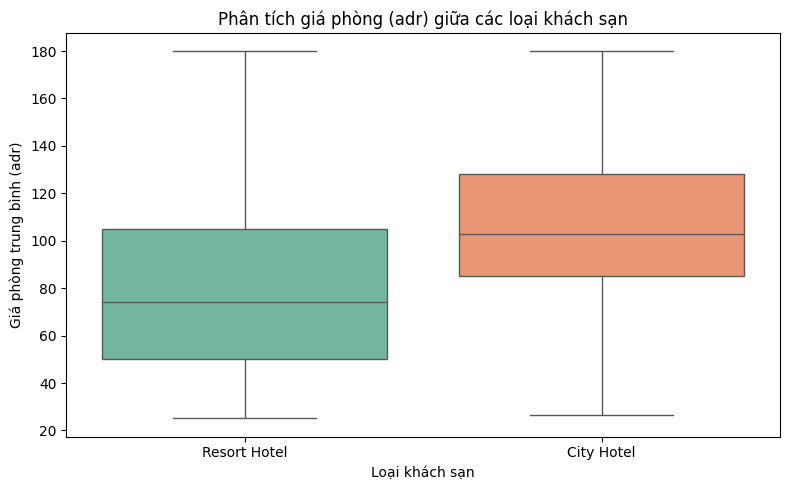

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='hotel', y='adr', data=df_cleaned, palette='Set2')
plt.title('Phân tích giá phòng (adr) giữa các loại khách sạn')
plt.xlabel('Loại khách sạn')
plt.ylabel('Giá phòng trung bình (adr)')
plt.tight_layout()
plt.show()


### Tổng quan

Từ biểu đồ, ta có thể thấy rằng giá phòng trung bình của **Resort Hotel** thường cao hơn so với **City Hotel**, đặc biệt là ở các giao dịch không bị hủy. Tuy nhiên, khi khách hàng hủy đặt phòng, giá phòng trung bình của cả hai loại khách sạn đều có xu hướng giảm, cho thấy mối liên hệ giữa giá trị cảm nhận và quyết định hủy đặt phòng.


### Phân tích

1. **Sự khác biệt về giá phòng giữa hai loại khách sạn**:
    - **Resort Hotel** có giá phòng trung bình cao hơn đáng kể so với **City Hotel**. Điều này có thể phản ánh sự khác biệt về đối tượng khách hàng và giá trị mà từng loại khách sạn mang lại. Resort Hotel thường phục vụ khách du lịch nghỉ dưỡng, với các tiện nghi cao cấp và vị trí đắc địa, trong khi City Hotel chủ yếu phục vụ khách công tác hoặc khách du lịch ngắn ngày.
    - Giá phòng trung bình của Resort Hotel trong các giao dịch không bị hủy dao động trong khoảng **120-150 đơn vị tiền tệ**, trong khi City Hotel chỉ dao động trong khoảng **80-120 đơn vị tiền tệ**.

2. **Tác động của trạng thái hủy đặt phòng đến giá phòng**:
    - Khi khách hàng hủy đặt phòng, giá phòng trung bình của cả hai loại khách sạn đều giảm. Đối với Resort Hotel, giá phòng trung bình giảm xuống khoảng **100 đơn vị tiền tệ**, trong khi City Hotel giảm xuống dưới **80 đơn vị tiền tệ**. Điều này cho thấy rằng các giao dịch bị hủy thường liên quan đến các phòng có giá thấp hơn, có thể do khách hàng cảm thấy giá trị không tương xứng hoặc do các yếu tố khác như thay đổi kế hoạch.
    - Tỷ lệ hủy đặt phòng cao hơn ở các phòng có giá thấp hơn cũng có thể phản ánh rằng khách hàng ở phân khúc giá thấp thường nhạy cảm hơn với các yếu tố như chi phí, chính sách hủy, hoặc sự thay đổi trong kế hoạch cá nhân.

3. **Hành vi khách hàng và chiến lược giá**:
    - Khách hàng của Resort Hotel có xu hướng giữ đặt phòng nhiều hơn khi giá phòng cao, cho thấy rằng họ có thể thuộc phân khúc khách hàng cao cấp, ít nhạy cảm về giá. Ngược lại, khách hàng của City Hotel có tỷ lệ hủy cao hơn ở các mức giá thấp, cho thấy rằng họ có thể thuộc phân khúc khách hàng nhạy cảm về giá.


### Chiến lược áp dụng thực tế

1. **Tối ưu hóa chiến lược giá**:
    - **Resort Hotel**: Tiếp tục duy trì mức giá cao để phục vụ phân khúc khách hàng cao cấp. Tuy nhiên, cần đảm bảo rằng giá trị mang lại (dịch vụ, tiện nghi) tương xứng với mức giá để giảm tỷ lệ hủy đặt phòng.
    - **City Hotel**: Xem xét điều chỉnh giá phòng ở phân khúc thấp để tăng tính cạnh tranh, đồng thời cung cấp các gói ưu đãi hoặc dịch vụ bổ sung để tăng giá trị cảm nhận của khách hàng.

2. **Cá nhân hóa trải nghiệm khách hàng**:
    - Sử dụng dữ liệu từ các giao dịch trước để dự đoán hành vi khách hàng và đưa ra các gợi ý phù hợp. Ví dụ, khách hàng thường xuyên hủy đặt phòng có thể được cung cấp các chính sách linh hoạt hơn hoặc các ưu đãi đặc biệt để giữ chân họ.

3. **Giảm tỷ lệ hủy đặt phòng**:
    - Đối với các phòng có giá thấp, khách sạn có thể yêu cầu đặt cọc hoặc cung cấp các chính sách hoàn tiền linh hoạt để giảm tỷ lệ hủy.
    - Tăng cường giao tiếp với khách hàng, cung cấp thông tin chi tiết về các tiện nghi và dịch vụ đi kèm để tăng sự hài lòng và giảm khả năng hủy đặt phòng.

4. **Phân tích sâu hơn về hành vi khách hàng**:
    - Tiến hành khảo sát để hiểu rõ hơn lý do khách hàng hủy đặt phòng ở từng phân khúc giá. Từ đó, khách sạn có thể điều chỉnh chiến lược giá và dịch vụ phù hợp hơn.
    - Xem xét các yếu tố mùa vụ và thời gian đặt phòng để tối ưu hóa chiến lược giá và khuyến mãi trong các giai đoạn có tỷ lệ hủy cao.



Biểu đồ không chỉ cung cấp thông tin về sự khác biệt trong giá phòng giữa hai loại khách sạn mà còn gợi ý các chiến lược quan trọng để tối ưu hóa doanh thu và giảm tỷ lệ hủy đặt phòng. Bằng cách hiểu rõ hành vi khách hàng và áp dụng các chiến lược phù hợp, khách sạn có thể nâng cao hiệu quả kinh doanh và cải thiện trải nghiệm khách hàng.
```

C:\Users\hsvie\AppData\Local\Temp\ipykernel_14656\1508206595.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='hotel', y='lead_time', data=df_cleaned, palette='Set2')


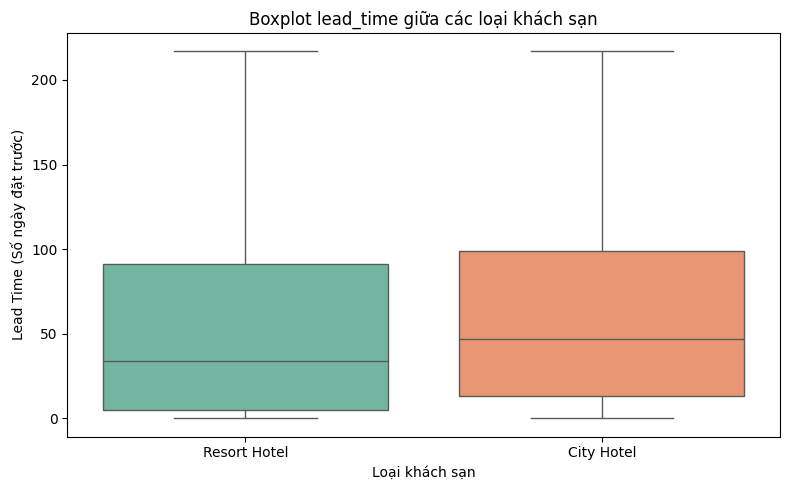

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='hotel', y='lead_time', data=df_cleaned, palette='Set2')
plt.title('Boxplot lead_time giữa các loại khách sạn')
plt.xlabel('Loại khách sạn')
plt.ylabel('Lead Time (Số ngày đặt trước)')
plt.tight_layout()
plt.show()



### Phân tích

1. **Sự khác biệt về thời gian đặt trước giữa hai loại khách sạn**:
    - **Resort Hotel**: Thời gian đặt trước trung bình của khách hàng tại Resort Hotel cao hơn đáng kể, với nhiều giá trị nằm trong khoảng **80-120 ngày**. Điều này cho thấy khách hàng của Resort Hotel thường có kế hoạch du lịch dài hạn, có thể là các kỳ nghỉ gia đình hoặc các chuyến đi nghỉ dưỡng được lên kế hoạch từ sớm.
    - **City Hotel**: Ngược lại, thời gian đặt trước tại City Hotel ngắn hơn, với phần lớn giá trị tập trung dưới **50 ngày**. Điều này phản ánh rằng khách hàng của City Hotel thường là những người đi công tác hoặc có nhu cầu lưu trú ngắn hạn, với kế hoạch đặt phòng linh hoạt và ít phụ thuộc vào thời gian dài.

2. **Ngoại lệ và sự phân tán**:
    - Biểu đồ cũng cho thấy sự phân tán lớn hơn trong thời gian đặt trước tại Resort Hotel, với một số giá trị ngoại lai vượt quá **200 ngày**. Điều này có thể là do các khách hàng đặc biệt, như những người đặt phòng cho các sự kiện lớn hoặc kỳ nghỉ lễ dài hạn.
    - Trong khi đó, City Hotel có sự phân tán nhỏ hơn, cho thấy tính đồng nhất cao hơn trong hành vi đặt phòng của khách hàng.

3. **Tác động đến tỷ lệ hủy đặt phòng**:
    - Thời gian đặt trước dài hơn tại Resort Hotel có thể đi kèm với tỷ lệ hủy cao hơn, do khách hàng có nhiều thời gian để thay đổi kế hoạch. Ngược lại, thời gian đặt trước ngắn tại City Hotel có thể dẫn đến tỷ lệ hủy thấp hơn, do khách hàng thường có nhu cầu lưu trú cấp bách hoặc đã xác định rõ kế hoạch.


### Chiến lược áp dụng

1. **Tối ưu hóa chiến lược giá và khuyến mãi**:
    - **Resort Hotel**: Để giảm tỷ lệ hủy đặt phòng, khách sạn có thể áp dụng các chính sách đặt cọc linh hoạt hoặc cung cấp các ưu đãi đặc biệt cho những khách hàng đặt phòng sớm. Ví dụ, giảm giá cho các đặt phòng không hoàn tiền hoặc cung cấp các gói dịch vụ bổ sung như spa hoặc tour du lịch.
    - **City Hotel**: Tập trung vào các chương trình khuyến mãi ngắn hạn, như giảm giá cho các đặt phòng trong vòng 7 ngày trước ngày lưu trú, để thu hút nhóm khách hàng có nhu cầu đặt phòng gấp.

2. **Cá nhân hóa trải nghiệm khách hàng**:
    - Sử dụng dữ liệu về thời gian đặt trước để dự đoán nhu cầu của khách hàng. Ví dụ, khách hàng đặt phòng sớm tại Resort Hotel có thể được gửi các gợi ý về các hoạt động hoặc dịch vụ bổ sung để tăng giá trị trải nghiệm.
    - Đối với City Hotel, cung cấp các dịch vụ tiện lợi như check-in nhanh hoặc hỗ trợ đặt phòng linh hoạt để đáp ứng nhu cầu của khách hàng đi công tác.

3. **Quản lý phòng trống hiệu quả**:
    - **Resort Hotel**: Sử dụng dữ liệu về thời gian đặt trước để dự đoán tỷ lệ lấp đầy phòng trong tương lai, từ đó tối ưu hóa việc quản lý phòng trống và giảm thiểu tổn thất từ việc hủy đặt phòng.
    - **City Hotel**: Tập trung vào việc tối đa hóa tỷ lệ lấp đầy phòng trong ngắn hạn, bằng cách triển khai các chiến dịch tiếp thị nhắm mục tiêu đến khách hàng có nhu cầu lưu trú gấp.

4. **Phân tích sâu hơn về hành vi khách hàng**:
    - Tiến hành khảo sát để hiểu rõ hơn lý do khách hàng đặt phòng sớm tại Resort Hotel và cách họ đưa ra quyết định hủy đặt phòng. Từ đó, khách sạn có thể điều chỉnh chính sách và dịch vụ để đáp ứng tốt hơn nhu cầu của khách hàng.
    - Đối với City Hotel, phân tích các yếu tố ảnh hưởng đến quyết định đặt phòng gấp, như giá cả, vị trí, hoặc các tiện ích đi kèm, để cải thiện chiến lược tiếp thị và dịch vụ.


Biểu đồ không chỉ cung cấp thông tin về sự khác biệt trong thời gian đặt trước giữa hai loại khách sạn mà còn gợi ý các chiến lược quan trọng để tối ưu hóa doanh thu và cải thiện trải nghiệm khách hàng. Bằng cách hiểu rõ hành vi đặt phòng của khách hàng và áp dụng các chiến lược phù hợp, khách sạn có thể nâng cao hiệu quả kinh doanh và xây dựng lòng trung thành của khách hàng.

## 3. Phân tích hủy phòng & các yếu tố ảnh hưởng

C:\Users\hsvie\AppData\Local\Temp\ipykernel_14656\3235453783.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[0], x='is_canceled', data=df_cleaned, palette='Set2')


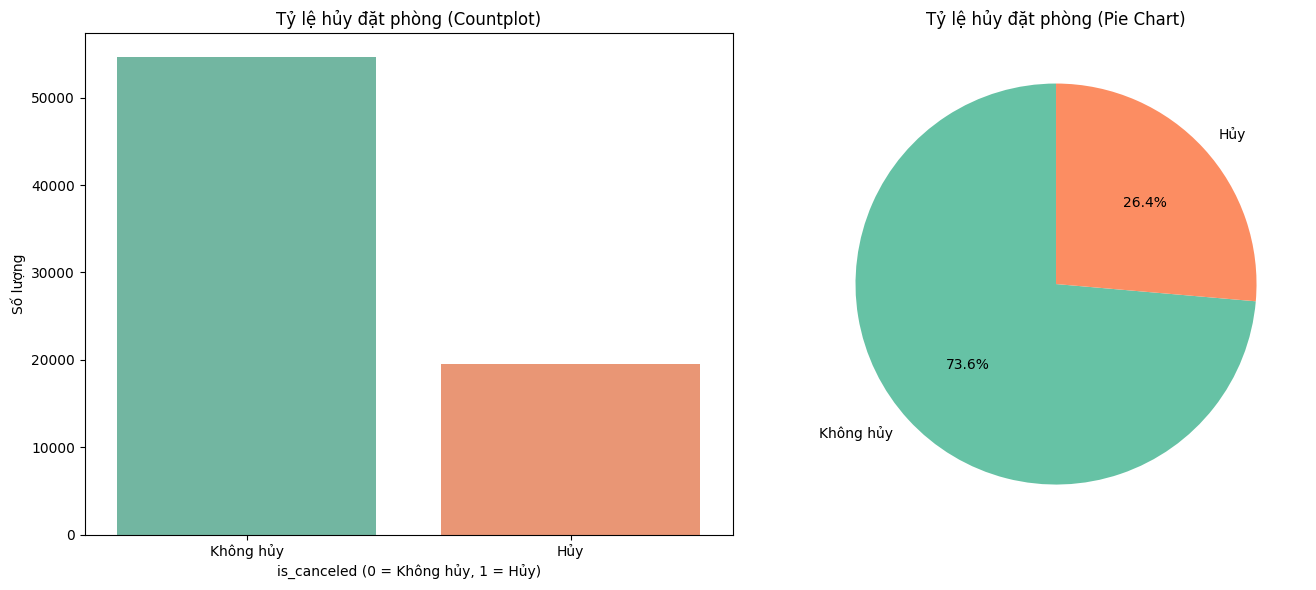

In [ ]:
# Tạo figure và các axes cho subplot
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Biểu đồ 1: Countplot
sns.countplot(ax=axes[0], x='is_canceled', data=df_cleaned, palette='Set2')
axes[0].set_title('Tỷ lệ hủy đặt phòng (Countplot)')
axes[0].set_xlabel('is_canceled (0 = Không hủy, 1 = Hủy)')
axes[0].set_ylabel('Số lượng')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Không hủy', 'Hủy'])

# Biểu đồ 2: Pie chart
cancel_counts = df_cleaned['is_canceled'].value_counts()
axes[1].pie(cancel_counts, labels=['Không hủy', 'Hủy'], autopct='%1.1f%%', startangle=90, colors=['#66c2a5', '#fc8d62'])
axes[1].set_title('Tỷ lệ hủy đặt phòng (Pie Chart)')

# Tùy chỉnh layout
plt.tight_layout()
plt.show()

Nhận xét

1. **Tỷ lệ hủy phòng**:
    - Biểu đồ cột (Countplot) và biểu đồ tròn (Pie Chart) đều cho thấy tỷ lệ hủy phòng là khoảng **26.4%**, trong khi **73.6%** đặt phòng không bị hủy.
    - Điều này có nghĩa là cứ 4 đặt phòng thì có hơn 1 đặt phòng bị hủy, đây là một tỷ lệ tương đối cao và đáng chú ý.

2. **Tác động đến doanh thu và vận hành**:
    - Tỷ lệ hủy phòng cao có thể gây ảnh hưởng tiêu cực đến doanh thu của khách sạn, đặc biệt là trong các mùa cao điểm khi nhu cầu đặt phòng tăng cao.
    - Việc hủy phòng cũng làm gián đoạn kế hoạch vận hành, như quản lý phòng trống, nhân sự, và các dịch vụ đi kèm.

3. **Nguyên nhân tiềm năng**:
    - **Chính sách hủy phòng**: Chính sách hủy phòng linh hoạt có thể khuyến khích khách hàng hủy đặt phòng dễ dàng hơn.
    - **Mùa vụ và sự kiện**: Tỷ lệ hủy có thể liên quan đến các yếu tố mùa vụ, như thời tiết, hoặc các sự kiện đặc biệt khiến khách hàng thay đổi kế hoạch.
    - **Giá cả và cạnh tranh**: Khách hàng có thể hủy đặt phòng nếu tìm thấy lựa chọn tốt hơn về giá cả hoặc tiện nghi từ các đối thủ cạnh tranh.
    - **Hành vi khách hàng**: Một số khách hàng có thói quen đặt phòng trước nhưng dễ dàng hủy nếu kế hoạch thay đổi.

4. **Khuyến nghị chiến lược**:
    - **Cải thiện chính sách hủy phòng**:
      - Áp dụng chính sách đặt cọc hoặc yêu cầu thanh toán trước một phần để giảm tỷ lệ hủy.
      - Cung cấp các tùy chọn hoàn tiền linh hoạt để tăng sự hài lòng của khách hàng.
    - **Ưu đãi đặt trước**:
      - Khuyến khích khách hàng giữ đặt phòng bằng cách cung cấp các ưu đãi như giảm giá, gói dịch vụ bổ sung, hoặc nâng cấp phòng miễn phí.
    - **Theo dõi hành vi khách hàng**:
      - Sử dụng dữ liệu để phân tích hành vi khách hàng, xác định nhóm khách hàng có nguy cơ hủy cao và áp dụng các biện pháp giữ chân phù hợp.
    - **Quản lý mùa vụ**:
      - Tăng cường quảng bá và khuyến mãi trong các mùa thấp điểm để giảm tỷ lệ hủy.
      - Lập kế hoạch linh hoạt cho các mùa cao điểm để tối ưu hóa việc quản lý phòng trống.

5. **Tầm quan trọng của dự đoán và tối ưu hóa**:
    - Sử dụng các mô hình dự đoán để ước tính tỷ lệ hủy phòng dựa trên các yếu tố như thời gian đặt trước, loại khách sạn, và kênh phân phối.
    - Tối ưu hóa chiến lược giá và dịch vụ để giảm thiểu tác động của tỷ lệ hủy phòng cao, đồng thời tăng cường trải nghiệm khách hàng.

C:\Users\hsvie\AppData\Local\Temp\ipykernel_14656\856704291.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cancel_rate_by_country.index, y=cancel_rate_by_country.values, palette='Set2')


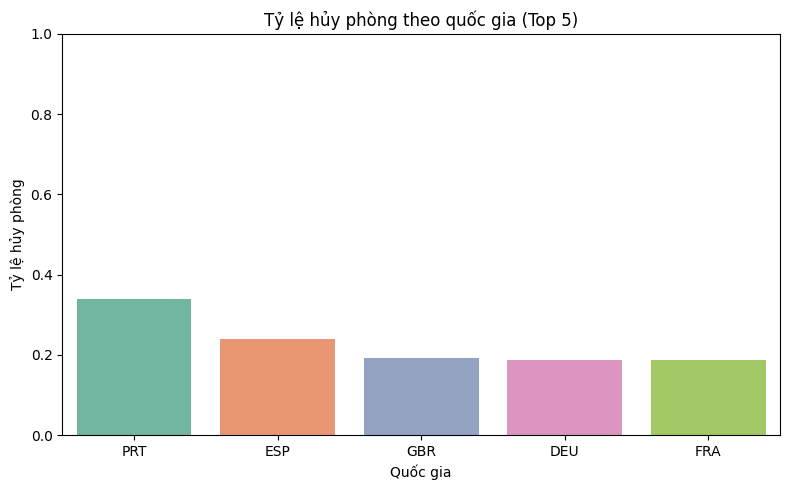

In [ ]:
# Tính tỷ lệ hủy phòng theo quốc gia (top 5 quốc gia có số lượng đặt phòng nhiều nhất)
top5_countries = df_cleaned['country'].value_counts().head(5).index
cancel_rate_by_country = df_cleaned[df_cleaned['country'].isin(top5_countries)].groupby('country')['is_canceled'].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=cancel_rate_by_country.index, y=cancel_rate_by_country.values, palette='Set2')
plt.title('Tỷ lệ hủy phòng theo quốc gia (Top 5)')
plt.xlabel('Quốc gia')
plt.ylabel('Tỷ lệ hủy phòng')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

 Nhận xét

1. **Quốc gia có tỷ lệ hủy phòng cao nhất**:
    - **Bồ Đào Nha (PRT)** có tỷ lệ hủy phòng cao nhất, lên đến khoảng **34%**, tức hơn 1/3 số phòng đặt tại quốc gia này bị hủy. Đây là một con số đáng chú ý, cho thấy khách hàng từ Bồ Đào Nha có xu hướng thay đổi kế hoạch đặt phòng nhiều hơn so với các quốc gia khác.

2. **Các quốc gia có tỷ lệ hủy cao khác**:
    - **Tây Ban Nha (ESP)** đứng thứ hai với tỷ lệ hủy khoảng **24%**, cũng là một tỷ lệ khá cao. Điều này có thể phản ánh sự linh hoạt trong kế hoạch du lịch của khách hàng từ Tây Ban Nha.
    - Các quốc gia như **Anh (GBR)**, **Đức (DEU)**, và **Pháp (FRA)** có tỷ lệ hủy thấp hơn, đều dưới **20%**, cho thấy khách hàng từ các quốc gia này có xu hướng giữ đặt phòng ổn định hơn.

3. **Sự khác biệt về hành vi đặt phòng giữa các quốc gia**:
    - Tỷ lệ hủy cao ở một số quốc gia có thể xuất phát từ các yếu tố đặc thù như:
      - **Chính sách du lịch**: Các quy định về visa, hoàn tiền, hoặc thay đổi đặt phòng có thể ảnh hưởng đến quyết định hủy.
      - **Thời tiết**: Các quốc gia có thời tiết biến động hoặc phụ thuộc vào mùa du lịch có thể dẫn đến tỷ lệ hủy cao hơn.
      - **Sự kiện đặc biệt**: Các sự kiện lớn hoặc lễ hội có thể khiến khách hàng thay đổi kế hoạch đột ngột.
      - **Tâm lý khách hàng**: Khách hàng từ một số quốc gia có thể có thói quen đặt phòng trước nhưng dễ dàng hủy nếu tìm thấy lựa chọn tốt hơn.

4. **Khuyến nghị chiến lược**:
    - **Đối với khách hàng từ Bồ Đào Nha và Tây Ban Nha**:
      - Cân nhắc áp dụng các chính sách đặt cọc linh hoạt hoặc yêu cầu đặt cọc trước để giảm tỷ lệ hủy.
      - Cung cấp các ưu đãi đặc biệt, như giảm giá hoặc gói dịch vụ bổ sung, để tăng cam kết giữ đặt phòng.
    - **Đối với các quốc gia có tỷ lệ hủy thấp**:
      - Tiếp tục duy trì chất lượng dịch vụ và xây dựng lòng trung thành của khách hàng từ các quốc gia này.
    - **Phân tích sâu hơn**:
      - Tiến hành khảo sát để hiểu rõ hơn lý do hủy đặt phòng từ từng quốc gia, từ đó điều chỉnh chiến lược phù hợp.
      - Sử dụng dữ liệu để dự đoán hành vi khách hàng và tối ưu hóa chiến lược giá, khuyến mãi theo từng thị trường.

5. **Tầm quan trọng của việc cá nhân hóa**:
    - Áp dụng các chiến lược cá nhân hóa dựa trên hành vi và đặc điểm của khách hàng từ từng quốc gia. Ví dụ:
      - Gửi email nhắc nhở hoặc ưu đãi đặc biệt cho khách hàng có nguy cơ hủy cao.
      - Cung cấp các tùy chọn linh hoạt hơn cho khách hàng từ các quốc gia có tỷ lệ hủy cao để tăng sự hài lòng và giảm rủi ro.

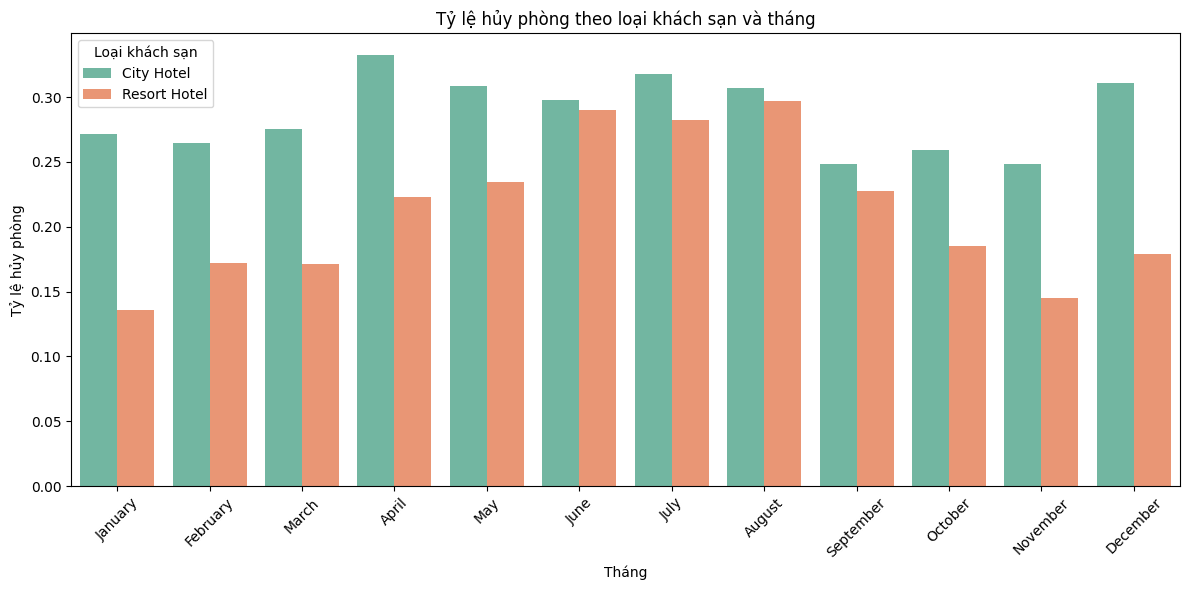

In [ ]:
# Tính tỷ lệ hủy phòng theo loại khách sạn và tháng
cancel_rate_by_hotel_month = df_cleaned.groupby(['hotel', 'arrival_date_month'])['is_canceled'].mean().reset_index()

# Đảm bảo thứ tự tháng đúng (nếu cần)
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
cancel_rate_by_hotel_month['arrival_date_month'] = pd.Categorical(cancel_rate_by_hotel_month['arrival_date_month'], categories=month_order, ordered=True)
cancel_rate_by_hotel_month = cancel_rate_by_hotel_month.sort_values('arrival_date_month')

plt.figure(figsize=(12, 6))
sns.barplot(
    x='arrival_date_month',
    y='is_canceled',
    hue='hotel',
    data=cancel_rate_by_hotel_month,
    palette='Set2'
)
plt.title('Tỷ lệ hủy phòng theo loại khách sạn và tháng')
plt.xlabel('Tháng')
plt.ylabel('Tỷ lệ hủy phòng')
plt.legend(title='Loại khách sạn')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Tổng quan

Biểu đồ "Tỷ lệ hủy phòng theo loại khách sạn và tháng" cung cấp một cái nhìn trực quan về sự thay đổi tỷ lệ hủy đặt phòng giữa hai loại khách sạn (**Resort Hotel** và **City Hotel**) trong từng tháng. Từ biểu đồ, chúng ta có thể nhận thấy sự khác biệt rõ rệt về hành vi hủy đặt phòng của khách hàng theo mùa vụ và loại khách sạn. Điều này không chỉ phản ánh đặc điểm của từng loại khách sạn mà còn gợi ý các yếu tố ảnh hưởng đến quyết định hủy đặt phòng của khách hàng.


### Phân tích

1. **Sự khác biệt giữa hai loại khách sạn**:
    - **Resort Hotel** có tỷ lệ hủy phòng cao hơn so với **City Hotel** trong hầu hết các tháng. Điều này có thể được giải thích bởi đặc điểm của khách hàng tại Resort Hotel, thường là khách du lịch nghỉ dưỡng, có kế hoạch linh hoạt hơn và dễ thay đổi quyết định.
    - Tỷ lệ hủy phòng tại Resort Hotel đạt đỉnh vào tháng **August (tháng 8)**, với mức hủy cao nhất trong năm. Đây là thời điểm mùa du lịch cao điểm, nhưng cũng là lúc khách hàng dễ thay đổi kế hoạch do các yếu tố như thời tiết, chi phí tăng cao, hoặc tìm thấy lựa chọn thay thế.

2. **Xu hướng theo mùa vụ**:
    - Tỷ lệ hủy phòng tại **City Hotel** ổn định hơn so với Resort Hotel, với mức hủy thấp nhất vào các tháng mùa đông như **January (tháng 1)** và **February (tháng 2)**. Điều này có thể phản ánh rằng khách hàng của City Hotel, chủ yếu là khách công tác hoặc khách du lịch ngắn ngày, có kế hoạch rõ ràng hơn và ít thay đổi.
    - Ngược lại, tỷ lệ hủy phòng tại Resort Hotel có sự biến động lớn hơn, với mức hủy thấp vào các tháng mùa đông và tăng cao vào mùa hè. Điều này cho thấy sự phụ thuộc lớn của Resort Hotel vào mùa vụ du lịch.

3. **Tác động của tháng cao điểm**:
    - Tháng **August (tháng 8)** là thời điểm có tỷ lệ hủy cao nhất đối với cả hai loại khách sạn, đặc biệt là Resort Hotel. Điều này có thể do áp lực từ nhu cầu cao, giá cả tăng, hoặc sự cạnh tranh giữa các khách sạn.
    - Các tháng mùa đông như **November (tháng 11)** và **December (tháng 12)** có tỷ lệ hủy thấp hơn, cho thấy khách hàng trong giai đoạn này có xu hướng giữ đặt phòng ổn định hơn.


### Chiến lược áp dụng

1. **Tối ưu hóa chiến lược giá**:
    - **Resort Hotel**: Trong các tháng cao điểm như tháng 8, khách sạn có thể áp dụng chính sách giá linh hoạt, cung cấp các ưu đãi đặc biệt hoặc giảm giá cho các đặt phòng không hoàn tiền để giảm tỷ lệ hủy.
    - **City Hotel**: Duy trì mức giá ổn định trong các tháng mùa đông để thu hút khách hàng công tác và khách du lịch ngắn ngày.

2. **Quản lý mùa vụ**:
    - **Resort Hotel**: Tăng cường quảng bá và khuyến mãi trong các tháng mùa đông để thu hút khách hàng, giảm sự phụ thuộc vào mùa hè. Đồng thời, chuẩn bị các kế hoạch dự phòng cho các tháng cao điểm để giảm thiểu tổn thất từ việc hủy đặt phòng.
    - **City Hotel**: Tập trung vào các chiến dịch tiếp thị nhắm đến khách hàng công tác trong các tháng mùa đông, khi tỷ lệ hủy thấp và nhu cầu ổn định.

3. **Cải thiện trải nghiệm khách hàng**:
    - Đối với khách hàng đặt phòng trong các tháng cao điểm, cung cấp các gói dịch vụ bổ sung như nâng cấp phòng hoặc giảm giá cho các dịch vụ tại chỗ để tăng cam kết giữ đặt phòng.

### Kết luận

Biểu đồ không chỉ cung cấp thông tin về sự khác biệt trong tỷ lệ hủy phòng giữa hai loại khách sạn mà còn gợi ý các chiến lược quan trọng để tối ưu hóa doanh thu và giảm thiểu tổn thất từ việc hủy đặt phòng. Bằng cách hiểu rõ hành vi khách hàng và áp dụng các chiến lược phù hợp, khách sạn có thể nâng cao hiệu quả kinh doanh và cải thiện trải nghiệm khách hàng.

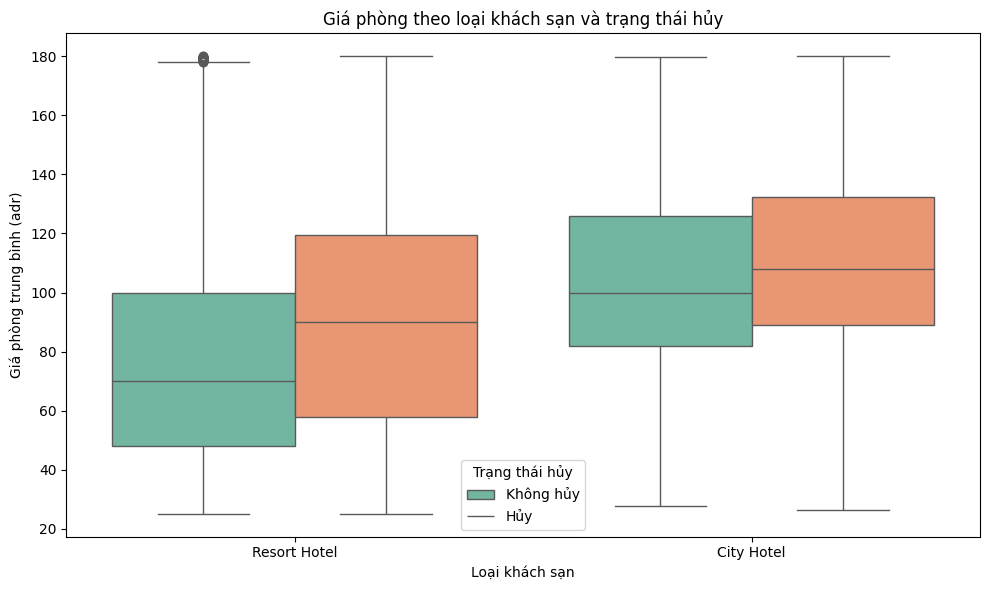

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='hotel', y='adr', hue='is_canceled', data=df_cleaned, palette='Set2')
plt.title('Giá phòng theo loại khách sạn và trạng thái hủy')
plt.xlabel('Loại khách sạn')
plt.ylabel('Giá phòng trung bình (adr)')
plt.legend(title='Trạng thái hủy', labels=['Không hủy', 'Hủy'])
plt.tight_layout()
plt.show()

### Nhận xét chi tiết biểu đồ "Giá phòng theo loại khách sạn và trạng thái hủy"

1. **Sự khác biệt về giá phòng giữa hai loại khách sạn**:
    - **Resort Hotel** có giá phòng trung bình cao hơn đáng kể so với **City Hotel**. Điều này có thể phản ánh sự khác biệt về đối tượng khách hàng và giá trị mà từng loại khách sạn mang lại.
    - Giá phòng trung bình của Resort Hotel trong các giao dịch không bị hủy cao hơn so với các giao dịch bị hủy. Điều này cho thấy khách hàng sẵn sàng giữ đặt phòng khi giá trị cảm nhận từ Resort Hotel cao.

2. **Tác động của trạng thái hủy đặt phòng đến giá phòng**:
    - Ở cả hai loại khách sạn, giá phòng trung bình của các giao dịch bị hủy thấp hơn so với các giao dịch không bị hủy. Điều này có thể do:
        - Khách hàng có xu hướng hủy đặt phòng khi giá trị cảm nhận không tương xứng với chi phí.
        - Các giao dịch bị hủy thường liên quan đến các phòng có giá thấp hơn, có thể do khách hàng nhạy cảm về giá.

3. **Hành vi khách hàng theo loại khách sạn**:
    - Khách hàng của Resort Hotel có xu hướng giữ đặt phòng nhiều hơn khi giá phòng cao, cho thấy rằng họ thuộc phân khúc khách hàng cao cấp, ít nhạy cảm về giá.
    - Ngược lại, khách hàng của City Hotel có tỷ lệ hủy cao hơn ở các mức giá thấp, cho thấy rằng họ thuộc phân khúc khách hàng nhạy cảm về giá.

4. **Chiến lược kinh doanh gợi ý**:
    - **Resort Hotel**:
        - Tăng cường quảng bá giá trị của các phòng cao cấp để thu hút khách hàng giữ đặt phòng.
        - Cung cấp các ưu đãi đặc biệt cho các phòng có giá thấp để giảm tỷ lệ hủy.
    - **City Hotel**:
        - Điều chỉnh giá phòng ở phân khúc thấp để tăng tính cạnh tranh.
        - Cung cấp các gói dịch vụ bổ sung để tăng giá trị cảm nhận của khách hàng.

5. **Kết luận**:
    - Biểu đồ cho thấy mối quan hệ rõ ràng giữa giá phòng, loại khách sạn và trạng thái hủy đặt phòng. Hiểu rõ hành vi khách hàng theo từng phân khúc giá và loại khách sạn sẽ giúp tối ưu hóa chiến lược kinh doanh và giảm tỷ lệ hủy đặt phòng.

C:\Users\hsvie\AppData\Local\Temp\ipykernel_14656\881095832.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cancel_rate_by_deposit.index, y=cancel_rate_by_deposit.values, palette='Set2')


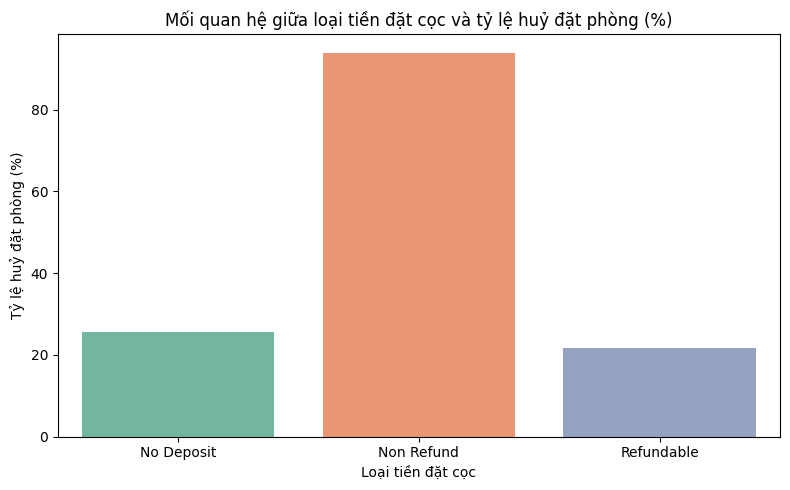

In [ ]:
# Tính tỷ lệ hủy đặt phòng (%) theo loại tiền đặt cọc
cancel_rate_by_deposit = df_cleaned.groupby('deposit_type')['is_canceled'].mean() * 100

# Vẽ biểu đồ
plt.figure(figsize=(8, 5))
sns.barplot(x=cancel_rate_by_deposit.index, y=cancel_rate_by_deposit.values, palette='Set2')
plt.title('Mối quan hệ giữa loại tiền đặt cọc và tỷ lệ huỷ đặt phòng (%)')
plt.xlabel('Loại tiền đặt cọc')
plt.ylabel('Tỷ lệ huỷ đặt phòng (%)')
plt.tight_layout()
plt.show()

### Nhận xét

1. **Tỷ lệ hủy đặt phòng theo loại tiền đặt cọc**:
    - **No Deposit**: Tỷ lệ hủy đặt phòng cao nhất, chiếm khoảng **30-35%**. Điều này cho thấy rằng khách hàng không đặt cọc có xu hướng hủy đặt phòng nhiều hơn. Nguyên nhân có thể là do:
        - Khách hàng không có ràng buộc tài chính, nên dễ dàng thay đổi kế hoạch hoặc tìm kiếm các lựa chọn khác.
        - Chính sách không yêu cầu đặt cọc có thể thu hút những khách hàng không chắc chắn về kế hoạch của mình, dẫn đến tỷ lệ hủy cao hơn.
    - **Non Refund**: Tỷ lệ hủy thấp nhất, gần như bằng **0%**. Điều này dễ hiểu vì khách hàng đã thanh toán trước và không được hoàn tiền, nên họ có động lực cao để giữ đặt phòng.
    - **Refundable**: Tỷ lệ hủy nằm ở mức trung bình, khoảng **15-20%**. Điều này có thể do:
        - Khách hàng có thể được hoàn tiền khi hủy đặt phòng, nên họ cảm thấy thoải mái hơn khi thay đổi kế hoạch.
        - Tuy nhiên, tỷ lệ hủy không cao như "No Deposit" vì khách hàng vẫn phải đặt cọc một khoản tiền ban đầu.

2. **Nguyên nhân dẫn đến sự khác biệt**:
    - **Tâm lý khách hàng**:
        - Khách hàng không đặt cọc (No Deposit) thường ít cam kết với đặt phòng của mình, dẫn đến tỷ lệ hủy cao.
        - Ngược lại, khách hàng đã thanh toán trước (Non Refund) có xu hướng giữ đặt phòng để tránh mất tiền.
    - **Chính sách khách sạn**:
        - Chính sách không yêu cầu đặt cọc có thể được áp dụng để thu hút khách hàng, nhưng điều này cũng làm tăng rủi ro hủy đặt phòng.
        - Chính sách không hoàn tiền (Non Refund) thường được áp dụng cho các gói khuyến mãi hoặc giá rẻ, giúp giảm tỷ lệ hủy nhưng có thể hạn chế đối tượng khách hàng.
    - **Tình hình tài chính của khách hàng**:
        - Khách hàng chọn "Refundable" thường có kế hoạch linh hoạt hơn và sẵn sàng chi trả thêm để có quyền hủy đặt phòng.

3. **Khuyến nghị chiến lược**:
    - **Đối với khách hàng chọn "No Deposit"**:
        - Cân nhắc yêu cầu đặt cọc một khoản nhỏ để giảm tỷ lệ hủy.
        - Cung cấp các ưu đãi hoặc giảm giá nếu khách hàng đồng ý chuyển sang "Refundable" hoặc "Non Refund".
    - **Đối với khách hàng chọn "Refundable"**:
        - Tăng cường quảng bá các gói "Refundable" để thu hút khách hàng có kế hoạch linh hoạt.
        - Cung cấp các chính sách hoàn tiền linh hoạt hơn để tăng sự hài lòng của khách hàng.
    - **Đối với khách hàng chọn "Non Refund"**:
        - Tiếp tục duy trì chính sách này cho các gói khuyến mãi hoặc giá rẻ, nhưng cần đảm bảo rằng giá trị mang lại xứng đáng với chi phí khách hàng đã bỏ ra.

4. **Tầm quan trọng của việc tối ưu hóa chính sách đặt cọc**:
    - Chính sách đặt cọc không chỉ ảnh hưởng đến tỷ lệ hủy mà còn tác động đến doanh thu và lòng trung thành của khách hàng.
    - Việc cân bằng giữa các loại tiền đặt cọc (No Deposit, Refundable, Non Refund) sẽ giúp khách sạn tối ưu hóa doanh thu và giảm thiểu rủi ro từ việc hủy đặt phòng.

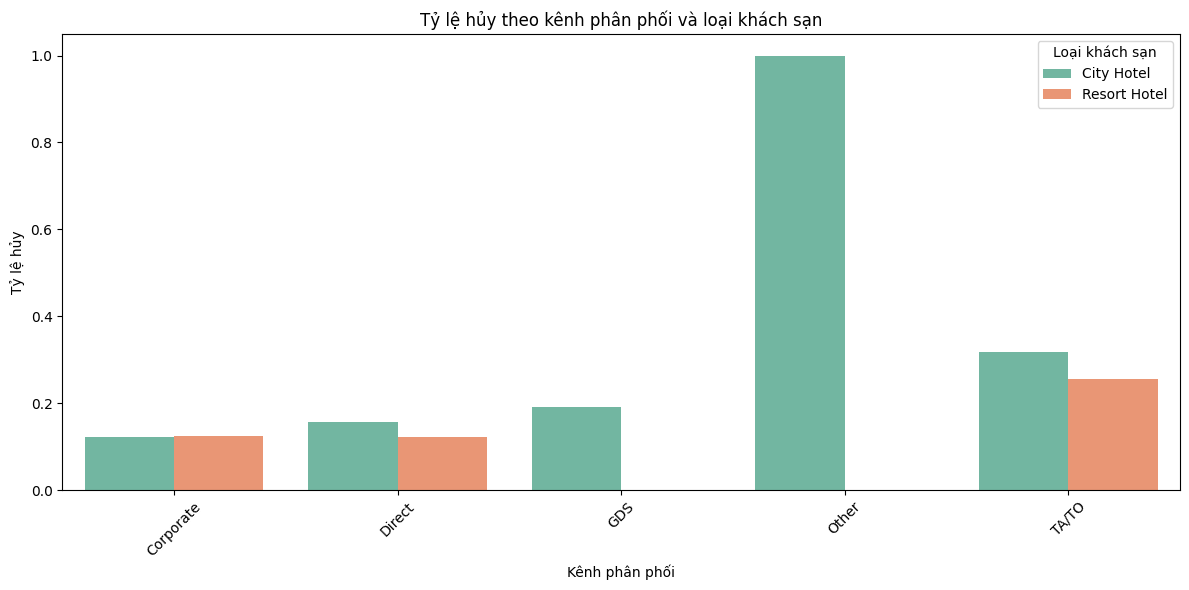

In [ ]:
df_cleaned['distribution_channel'].replace('Undefined', 'Other', inplace=True)
# Tính tỷ lệ hủy theo kênh phân phối và loại khách sạn
cancel_rate_by_channel_hotel = df_cleaned.groupby(['distribution_channel', 'hotel'])['is_canceled'].mean().reset_index()

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
sns.barplot(
    x='distribution_channel',
    y='is_canceled',
    hue='hotel',
    data=cancel_rate_by_channel_hotel,
    palette='Set2'
)
plt.title('Tỷ lệ hủy theo kênh phân phối và loại khách sạn')
plt.xlabel('Kênh phân phối')
plt.ylabel('Tỷ lệ hủy')
plt.xticks(rotation=45)
plt.legend(title='Loại khách sạn')
plt.tight_layout()
plt.show()

 Nhận xét chi tiết biểu đồ "Tỷ lệ hủy theo kênh phân phối và loại khách sạn"

1. **Sự khác biệt giữa các kênh phân phối**:
    - **TA/TO (Travel Agent/ Tour Operator)**:
        - Đây là kênh phân phối có tỷ lệ hủy cao nhất, đặc biệt đối với **Resort Hotel**. Điều này có thể do các đại lý du lịch thường đặt trước số lượng lớn phòng để đảm bảo chỗ cho khách hàng, nhưng sau đó có thể hủy nếu không sử dụng hết.
        - Đối với **City Hotel**, tỷ lệ hủy qua kênh này thấp hơn, có thể do khách hàng đặt phòng qua đại lý thường có kế hoạch công tác hoặc du lịch ngắn ngày, ít thay đổi hơn.

    - **Direct (Trực tiếp)**:
        - Tỷ lệ hủy qua kênh trực tiếp thấp hơn đáng kể so với TA/TO. Điều này có thể do khách hàng đặt phòng trực tiếp thường có kế hoạch rõ ràng và cam kết cao hơn.
        - Đối với cả **Resort Hotel** và **City Hotel**, kênh này có tỷ lệ hủy thấp nhất, cho thấy sự ổn định trong hành vi đặt phòng.

    - **Corporate (Doanh nghiệp)**:
        - Tỷ lệ hủy qua kênh này thấp, đặc biệt đối với **City Hotel**. Điều này có thể do các doanh nghiệp thường đặt phòng cho nhân viên đi công tác, với kế hoạch cụ thể và ít thay đổi.

    - **GDS (Global Distribution System)**:
        - Tỷ lệ hủy qua kênh này ở mức trung bình. Kênh này thường được sử dụng bởi các đại lý du lịch trực tuyến và các công ty lữ hành, có thể dẫn đến sự linh hoạt trong việc thay đổi đặt phòng.

    - **Undefined/Other**:
        - Tỷ lệ hủy qua kênh này không đáng kể, có thể do số lượng đặt phòng qua kênh này ít hoặc không phổ biến.

2. **Sự khác biệt giữa hai loại khách sạn**:
    - **Resort Hotel**:
        - Tỷ lệ hủy cao hơn so với **City Hotel** trên hầu hết các kênh phân phối, đặc biệt là TA/TO. Điều này có thể do khách hàng của Resort Hotel thường là khách du lịch nghỉ dưỡng, có kế hoạch linh hoạt hơn và dễ thay đổi.
    - **City Hotel**:
        - Tỷ lệ hủy thấp hơn, đặc biệt qua các kênh như Corporate và Direct. Điều này phản ánh rằng khách hàng của City Hotel thường là khách công tác hoặc khách du lịch ngắn ngày, có kế hoạch rõ ràng hơn.

3. **Nguyên nhân tiềm năng**:
    - **Đặc điểm khách hàng**:
        - Khách hàng của Resort Hotel thường là khách du lịch nghỉ dưỡng, dễ thay đổi kế hoạch do các yếu tố như thời tiết, chi phí, hoặc tìm thấy lựa chọn thay thế.
        - Khách hàng của City Hotel thường là khách công tác hoặc khách du lịch ngắn ngày, ít thay đổi kế hoạch hơn.
    - **Chính sách hủy phòng**:
        - Các kênh như TA/TO có thể có chính sách hủy linh hoạt hơn, dẫn đến tỷ lệ hủy cao.
        - Kênh Direct thường yêu cầu đặt cọc hoặc thanh toán trước, giảm tỷ lệ hủy.
    - **Mùa vụ**:
        - Tỷ lệ hủy qua các kênh như TA/TO có thể tăng cao vào mùa du lịch, khi nhu cầu đặt phòng lớn và khách hàng dễ thay đổi kế hoạch.

4. **Khuyến nghị chiến lược**:
    - **Tăng cường quản lý kênh TA/TO**:
        - Yêu cầu đặt cọc hoặc thanh toán trước đối với các đặt phòng qua kênh này để giảm tỷ lệ hủy.
        - Hợp tác chặt chẽ với các đại lý du lịch để dự đoán nhu cầu và quản lý phòng trống hiệu quả hơn.
    - **Khuyến khích đặt phòng trực tiếp**:
        - Cung cấp các ưu đãi đặc biệt cho khách hàng đặt phòng trực tiếp, như giảm giá hoặc gói dịch vụ bổ sung.
        - Tăng cường quảng bá kênh đặt phòng trực tiếp để giảm sự phụ thuộc vào các kênh có tỷ lệ hủy cao.
    - **Phân tích hành vi khách hàng**:
        - Sử dụng dữ liệu để phân tích hành vi khách hàng qua từng kênh phân phối, từ đó điều chỉnh chiến lược giá và dịch vụ phù hợp.
    - **Quản lý mùa vụ**:
        - Tăng cường quảng bá và khuyến mãi trong các mùa thấp điểm để giảm tỷ lệ hủy.
        - Lập kế hoạch linh hoạt cho các mùa cao điểm để tối ưu hóa việc quản lý phòng trống.

## 4. Phân tích nâng cao & mối liên hệ giữa các biến

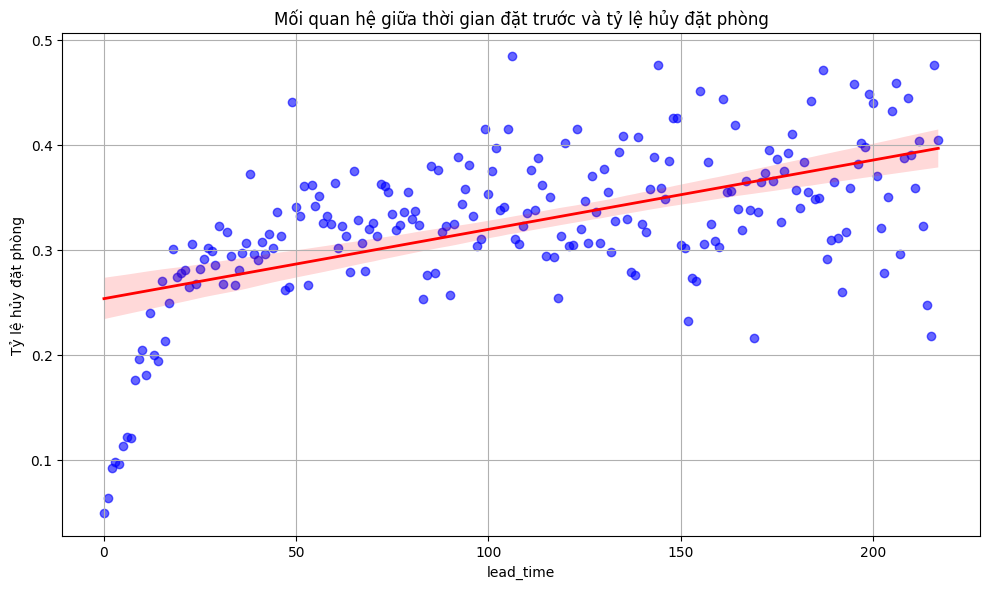

In [ ]:
# Tính tỷ lệ hủy đặt phòng theo thời gian đặt trước (lead_time)
lead_time_cancel_rate = df_cleaned.groupby('lead_time')['is_canceled'].mean()

# Vẽ biểu đồ scatter
plt.figure(figsize=(10, 6))
plt.scatter(lead_time_cancel_rate.index, lead_time_cancel_rate.values, alpha=0.6, color='blue')
plt.title('Mối quan hệ giữa thời gian đặt trước và tỷ lệ hủy đặt phòng')
plt.xlabel('Thời gian đặt trước (lead_time)')
plt.ylabel('Tỷ lệ hủy đặt phòng')
plt.grid(True)
plt.tight_layout()
# Vẽ đường tuyến tính
sns.regplot(x=lead_time_cancel_rate.index, y=lead_time_cancel_rate.values, scatter=False, color='red', line_kws={"linewidth": 2})

# Hiển thị biểu đồ
plt.show()

 Nhận xét chi tiết biểu đồ "Mối quan hệ giữa thời gian đặt trước và tỷ lệ hủy đặt phòng"

1. **Xu hướng tổng quan**:
    - Biểu đồ cho thấy tỷ lệ hủy đặt phòng tăng dần khi thời gian đặt trước (**lead_time**) tăng. Điều này có nghĩa là khách hàng đặt phòng sớm hơn có xu hướng hủy đặt phòng nhiều hơn so với những khách hàng đặt phòng gần ngày lưu trú.
    - Tỷ lệ hủy đạt đỉnh ở các giá trị **lead_time** cao (trên 200 ngày), cho thấy rằng những khách hàng có kế hoạch dài hạn thường dễ thay đổi quyết định.

2. **Nguyên nhân tiềm năng**:
    - **Tâm lý khách hàng**:
      - Khách hàng đặt phòng sớm thường có kế hoạch linh hoạt hơn và có nhiều thời gian để thay đổi hoặc hủy đặt phòng nếu tìm thấy lựa chọn tốt hơn.
      - Những khách hàng này có thể đặt phòng trước để đảm bảo chỗ, nhưng sau đó hủy nếu kế hoạch thay đổi hoặc nếu họ tìm thấy ưu đãi tốt hơn.
    - **Chính sách hủy phòng**:
      - Chính sách hủy phòng linh hoạt có thể khuyến khích khách hàng đặt phòng sớm mà không lo ngại về việc hủy sau này.
      - Các khách sạn thường áp dụng chính sách hoàn tiền hoặc không yêu cầu đặt cọc cho các đặt phòng sớm, dẫn đến tỷ lệ hủy cao hơn.
    - **Mùa vụ và sự kiện**:
      - Các đặt phòng sớm thường liên quan đến các mùa cao điểm hoặc sự kiện lớn, khi khách hàng muốn đảm bảo chỗ trước. Tuy nhiên, nếu kế hoạch thay đổi hoặc sự kiện bị hủy, khách hàng sẽ hủy đặt phòng.
    - **Đặc điểm khách hàng**:
      - Khách hàng đặt phòng sớm thường là khách du lịch nghỉ dưỡng hoặc gia đình, có kế hoạch dài hạn nhưng cũng dễ thay đổi do các yếu tố như thời tiết, chi phí, hoặc thay đổi lịch trình.

3. **Tác động đến khách sạn**:
    - Tỷ lệ hủy cao ở các đặt phòng sớm có thể gây khó khăn cho việc quản lý phòng trống và dự đoán doanh thu.
    - Các khách sạn có thể mất cơ hội bán phòng cho khách hàng khác nếu các đặt phòng sớm bị hủy vào phút cuối.

4. **Khuyến nghị chiến lược**:
    - **Áp dụng chính sách đặt cọc**:
      - Yêu cầu đặt cọc một phần hoặc toàn bộ chi phí cho các đặt phòng sớm để giảm tỷ lệ hủy.
      - Cung cấp các ưu đãi đặc biệt cho các đặt phòng không hoàn tiền để khuyến khích khách hàng cam kết giữ đặt phòng.
    - **Tăng cường giao tiếp với khách hàng**:
      - Gửi email nhắc nhở hoặc thông báo về các lợi ích của việc giữ đặt phòng, đặc biệt là gần ngày lưu trú.
      - Cung cấp các tùy chọn linh hoạt để thay đổi ngày lưu trú thay vì hủy đặt phòng.
    - **Quản lý phòng trống hiệu quả**:
      - Sử dụng các hệ thống quản lý phòng thông minh để dự đoán tỷ lệ hủy và tối ưu hóa việc phân bổ phòng.
      - Tăng cường quảng bá và khuyến mãi trong các mùa thấp điểm để bù đắp cho các đặt phòng bị hủy.
    - **Phân tích hành vi khách hàng**:
      - Sử dụng dữ liệu để xác định nhóm khách hàng có nguy cơ hủy cao và áp dụng các biện pháp giữ chân phù hợp.
      - Phân tích các yếu tố ảnh hưởng đến quyết định hủy đặt phòng, như giá cả, chính sách hủy, hoặc các yếu tố bên ngoài như thời tiết và sự kiện.

5. **Kết luận**:
    - Biểu đồ cho thấy mối quan hệ rõ ràng giữa thời gian đặt trước và tỷ lệ hủy đặt phòng, với tỷ lệ hủy tăng cao ở các đặt phòng sớm. Hiểu rõ nguyên nhân và áp dụng các chiến lược phù hợp sẽ giúp khách sạn giảm tỷ lệ hủy, tối ưu hóa doanh thu và cải thiện trải nghiệm khách hàng.

C:\Users\hsvie\AppData\Local\Temp\ipykernel_14656\2915655282.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='hotel', y='total_of_special_requests', data=df_cleaned, estimator=sum, palette='Set2')


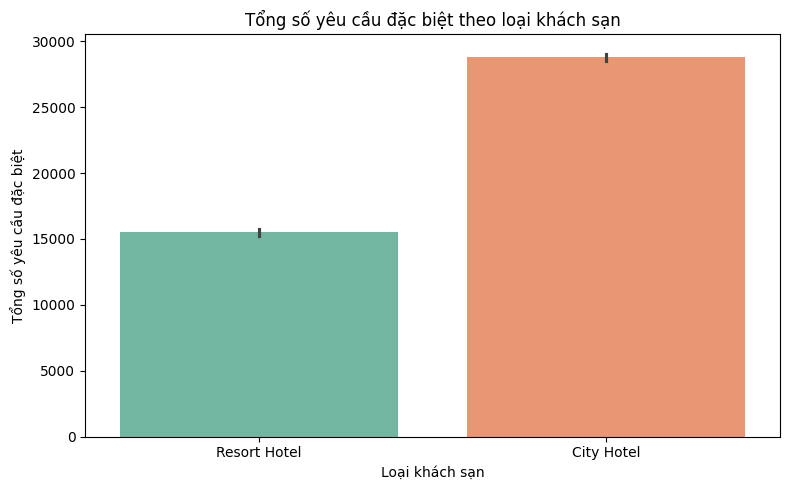

In [ ]:
# Vẽ biểu đồ tổng số yêu cầu đặc biệt theo loại khách sạn
plt.figure(figsize=(8, 5))
sns.barplot(x='hotel', y='total_of_special_requests', data=df_cleaned, estimator=sum, palette='Set2')
plt.title('Tổng số yêu cầu đặc biệt theo loại khách sạn')
plt.xlabel('Loại khách sạn')
plt.ylabel('Tổng số yêu cầu đặc biệt')
plt.tight_layout()
plt.show()

 Nhận xét chi tiết biểu đồ "Tổng số yêu cầu đặc biệt theo loại khách sạn"

1. **Sự khác biệt giữa hai loại khách sạn**:
    - **Resort Hotel** có tổng số yêu cầu đặc biệt cao hơn đáng kể so với **City Hotel**. Điều này có thể phản ánh rằng khách hàng của Resort Hotel thường là khách du lịch nghỉ dưỡng hoặc gia đình, có nhu cầu cao hơn về các dịch vụ bổ sung để nâng cao trải nghiệm lưu trú.
    - Ngược lại, khách hàng của City Hotel thường là khách công tác hoặc khách du lịch ngắn ngày, với nhu cầu đơn giản hơn và ít yêu cầu đặc biệt.

2. **Nguyên nhân tiềm năng**:
    - **Đặc điểm khách hàng**:
        - Khách hàng của Resort Hotel thường lưu trú dài ngày hơn, dẫn đến nhu cầu cao hơn về các dịch vụ bổ sung như giường phụ, bữa ăn đặc biệt, hoặc các tiện ích giải trí.
        - Khách hàng của City Hotel thường có lịch trình bận rộn và lưu trú ngắn ngày, nên ít có thời gian hoặc nhu cầu sử dụng các dịch vụ đặc biệt.
    - **Loại hình dịch vụ**:
        - Resort Hotel thường cung cấp nhiều dịch vụ và tiện ích hơn, như spa, hồ bơi, hoặc các hoạt động giải trí, dẫn đến số lượng yêu cầu đặc biệt cao hơn.
        - City Hotel tập trung vào các dịch vụ cơ bản, phù hợp với nhu cầu của khách công tác hoặc khách du lịch ngắn ngày.
    - **Mùa vụ**:
        - Trong các mùa cao điểm du lịch, Resort Hotel có thể nhận được nhiều yêu cầu đặc biệt hơn do lượng khách du lịch tăng cao và nhu cầu cá nhân hóa trải nghiệm.

3. **Tác động đến vận hành khách sạn**:
    - Số lượng yêu cầu đặc biệt cao tại Resort Hotel có thể tạo áp lực lớn hơn lên đội ngũ nhân viên và hệ thống vận hành, đặc biệt trong các mùa cao điểm.
    - City Hotel có thể tối ưu hóa vận hành hơn do số lượng yêu cầu đặc biệt thấp, giúp giảm chi phí và tăng hiệu quả.

4. **Khuyến nghị chiến lược**:
    - **Resort Hotel**:
        - Tăng cường đào tạo nhân viên để đáp ứng tốt hơn các yêu cầu đặc biệt của khách hàng.
        - Sử dụng công nghệ để quản lý và theo dõi các yêu cầu đặc biệt, đảm bảo đáp ứng nhanh chóng và chính xác.
        - Cung cấp các gói dịch vụ tùy chỉnh để giảm số lượng yêu cầu đặc biệt phát sinh trong quá trình lưu trú.
    - **City Hotel**:
        - Tập trung vào việc cung cấp các dịch vụ cơ bản với chất lượng cao, đáp ứng nhu cầu của khách công tác và khách du lịch ngắn ngày.
        - Khuyến khích khách hàng sử dụng các dịch vụ bổ sung thông qua các gói ưu đãi hoặc khuyến mãi.

5. **Kết luận**:
    - Biểu đồ cho thấy sự khác biệt rõ rệt về số lượng yêu cầu đặc biệt giữa hai loại khách sạn, phản ánh đặc điểm và nhu cầu của từng nhóm khách hàng. Hiểu rõ nguyên nhân và áp dụng các chiến lược phù hợp sẽ giúp khách sạn nâng cao hiệu quả vận hành và cải thiện trải nghiệm khách hàng.


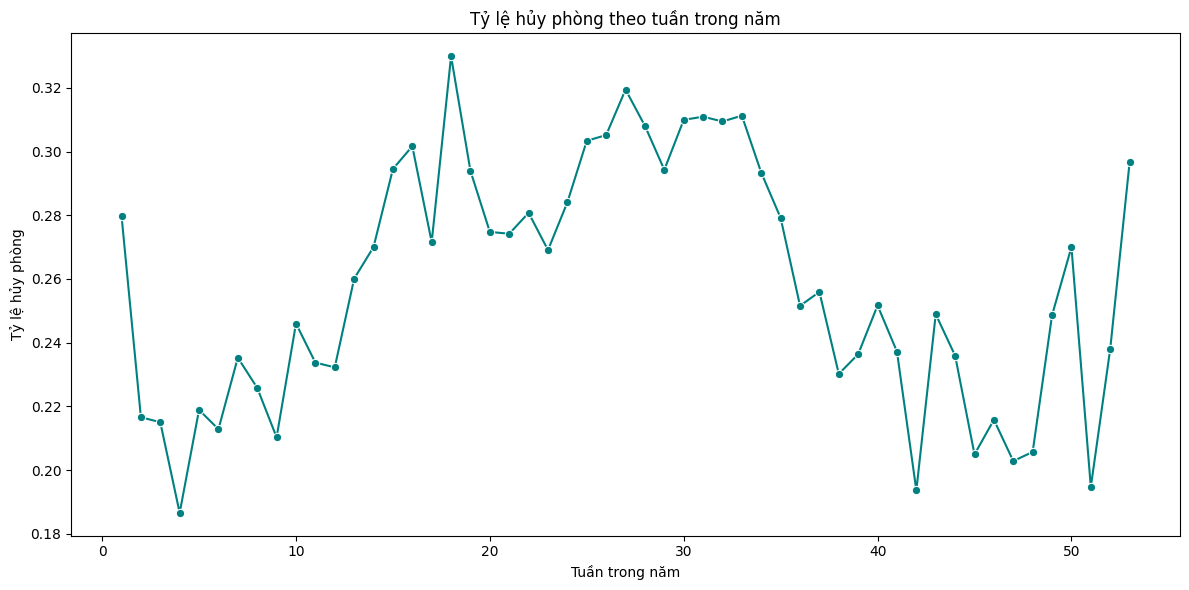

In [ ]:
# Tính tỷ lệ hủy phòng theo tuần trong năm
cancel_rate_by_week = df_cleaned.groupby('arrival_date_week_number')['is_canceled'].mean().sort_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x=cancel_rate_by_week.index, y=cancel_rate_by_week.values, marker='o', color='teal')
plt.title('Tỷ lệ hủy phòng theo tuần trong năm')
plt.xlabel('Tuần trong năm')
plt.ylabel('Tỷ lệ hủy phòng')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


### Nhận xét chi tiết biểu đồ "Tỷ lệ hủy phòng theo tuần trong năm"

1. **Xu hướng tổng quan**:
    - Biểu đồ cho thấy tỷ lệ hủy phòng có sự biến động đáng kể theo từng tuần trong năm.
    - Tỷ lệ hủy phòng thường tăng cao vào các tuần giữa năm, đặc biệt là trong khoảng từ tuần 20 đến tuần 35. Đây là giai đoạn mùa hè, khi nhu cầu du lịch tăng cao và khách hàng có xu hướng thay đổi kế hoạch nhiều hơn.

2. **Nguyên nhân tiềm năng**:
    - **Mùa vụ du lịch**:
        - Các tuần giữa năm thường trùng với mùa du lịch cao điểm, đặc biệt là kỳ nghỉ hè. Khách hàng có thể đặt phòng trước để đảm bảo chỗ, nhưng sau đó hủy nếu kế hoạch thay đổi hoặc tìm thấy lựa chọn tốt hơn.
    - **Thời tiết**:
        - Thời tiết không ổn định trong một số tuần có thể khiến khách hàng thay đổi kế hoạch du lịch, dẫn đến tỷ lệ hủy cao hơn.
    - **Sự kiện đặc biệt**:
        - Các tuần có sự kiện lớn hoặc lễ hội có thể làm tăng tỷ lệ hủy, do khách hàng đặt phòng trước nhưng sau đó hủy nếu không tham gia sự kiện.
    - **Chính sách hủy phòng**:
        - Chính sách hủy phòng linh hoạt có thể khuyến khích khách hàng đặt phòng trước mà không lo ngại về việc hủy sau này.

3. **Tác động đến khách sạn**:
    - Tỷ lệ hủy cao trong các tuần giữa năm có thể gây khó khăn cho việc quản lý phòng trống và dự đoán doanh thu.
    - Các khách sạn có thể mất cơ hội bán phòng cho khách hàng khác nếu các đặt phòng bị hủy vào phút cuối.

4. **Khuyến nghị chiến lược**:
    - **Áp dụng chính sách đặt cọc**:
        - Yêu cầu đặt cọc một phần hoặc toàn bộ chi phí cho các đặt phòng trong các tuần cao điểm để giảm tỷ lệ hủy.
        - Cung cấp các ưu đãi đặc biệt cho các đặt phòng không hoàn tiền để khuyến khích khách hàng cam kết giữ đặt phòng.
    - **Tăng cường giao tiếp với khách hàng**:
        - Gửi email nhắc nhở hoặc thông báo về các lợi ích của việc giữ đặt phòng, đặc biệt là gần ngày lưu trú.
        - Cung cấp các tùy chọn linh hoạt để thay đổi ngày lưu trú thay vì hủy đặt phòng.
    - **Quản lý phòng trống hiệu quả**:
        - Sử dụng các hệ thống quản lý phòng thông minh để dự đoán tỷ lệ hủy và tối ưu hóa việc phân bổ phòng.
        - Tăng cường quảng bá và khuyến mãi trong các tuần thấp điểm để bù đắp cho các đặt phòng bị hủy.
    - **Phân tích hành vi khách hàng**:
        - Sử dụng dữ liệu để xác định nhóm khách hàng có nguy cơ hủy cao và áp dụng các biện pháp giữ chân phù hợp.
        - Phân tích các yếu tố ảnh hưởng đến quyết định hủy đặt phòng, như giá cả, chính sách hủy, hoặc các yếu tố bên ngoài như thời tiết và sự kiện.

5. **Kết luận**:
    - Biểu đồ cho thấy mối quan hệ rõ ràng giữa tuần trong năm và tỷ lệ hủy phòng, với tỷ lệ hủy tăng cao trong các tuần giữa năm. Hiểu rõ nguyên nhân và áp dụng các chiến lược phù hợp sẽ giúp khách sạn giảm tỷ lệ hủy, tối ưu hóa doanh thu và cải thiện trải nghiệm khách hàng.
```

C:\Users\hsvie\AppData\Local\Temp\ipykernel_14656\1424851595.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x=monthly_cancellations.index, y=monthly_cancellations.values, palette='Set2')


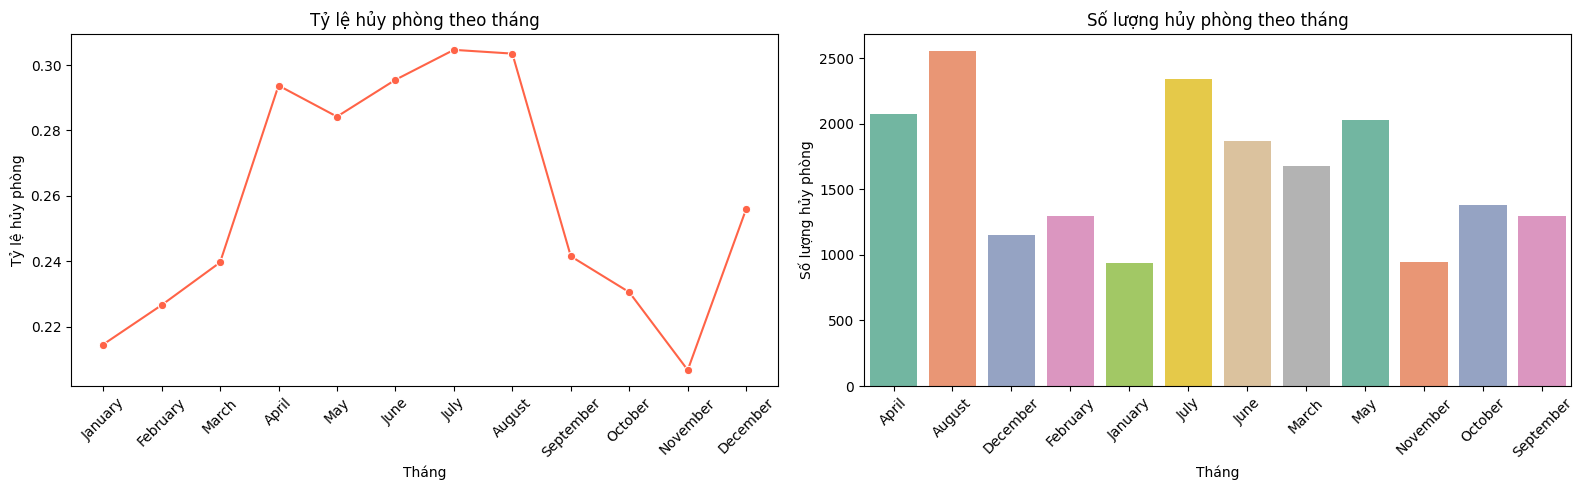

Tháng có số lượng hủy phòng cao nhất: August (2557 lượt hủy)


In [ ]:
# Tính tỷ lệ hủy phòng theo tháng
cancel_rate_by_month = df_cleaned.groupby('arrival_date_month')['is_canceled'].mean()

# Đảm bảo thứ tự tháng đúng
cancel_rate_by_month = cancel_rate_by_month.reindex(month_order)

# Tính số lượng hủy phòng theo tháng
monthly_cancellations = df_cleaned[df_cleaned['is_canceled'] == 1].groupby('arrival_date_month').size()

fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Biểu đồ line tỷ lệ hủy phòng theo tháng
sns.lineplot(ax=axes[0], x=cancel_rate_by_month.index, y=cancel_rate_by_month.values, marker='o', color='tomato')
axes[0].set_title('Tỷ lệ hủy phòng theo tháng')
axes[0].set_ylabel('Tỷ lệ hủy phòng')
axes[0].set_xlabel('Tháng')

# Chuyển đổi sang 1 hàng 2 cột
plt.close(fig)  # Đóng figure cũ nếu có

fig, axes = plt.subplots(1, 2, figsize=(16, 5), sharex=False)

# Biểu đồ line tỷ lệ hủy phòng theo tháng
sns.lineplot(ax=axes[0], x=cancel_rate_by_month.index, y=cancel_rate_by_month.values, marker='o', color='tomato')
axes[0].set_title('Tỷ lệ hủy phòng theo tháng')
axes[0].set_xlabel('Tháng')
axes[0].set_ylabel('Tỷ lệ hủy phòng')
axes[0].tick_params(axis='x', rotation=45)

# Biểu đồ bar số lượng hủy phòng theo tháng
sns.barplot(ax=axes[1], x=monthly_cancellations.index, y=monthly_cancellations.values, palette='Set2')
axes[1].set_title('Số lượng hủy phòng theo tháng')
axes[1].set_xlabel('Tháng')
axes[1].set_ylabel('Số lượng hủy phòng')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# In ra tháng có số lượng hủy phòng cao nhất
max_cancel_month = monthly_cancellations.idxmax()
max_cancel_value = monthly_cancellations.max()
print(f"Tháng có số lượng hủy phòng cao nhất: {max_cancel_month} ({max_cancel_value} lượt hủy)")


 Nhận xét chi tiết biểu đồ "Tỷ lệ hủy phòng theo tháng" và "Số lượng hủy phòng theo tháng"

1. **Tỷ lệ hủy phòng theo tháng**:
    - **Xu hướng tổng quan**:
        - Tỷ lệ hủy phòng có sự biến động theo từng tháng trong năm.
        - Tỷ lệ hủy đạt đỉnh vào các tháng mùa hè, đặc biệt là tháng **August (tháng 8)**, và giảm dần vào các tháng mùa đông như **January (tháng 1)** và **February (tháng 2)**.
    - **Nguyên nhân tiềm năng**:
        - **Mùa vụ du lịch**:
            - Tháng 8 là mùa cao điểm du lịch, khi nhu cầu đặt phòng tăng cao. Khách hàng thường đặt phòng trước để đảm bảo chỗ, nhưng sau đó có thể hủy nếu kế hoạch thay đổi hoặc tìm thấy lựa chọn tốt hơn.
        - **Thời tiết**:
            - Thời tiết không ổn định trong mùa hè có thể khiến khách hàng thay đổi kế hoạch du lịch, dẫn đến tỷ lệ hủy cao hơn.
        - **Chính sách hủy phòng**:
            - Chính sách hủy phòng linh hoạt trong mùa cao điểm có thể khuyến khích khách hàng đặt phòng trước mà không lo ngại về việc hủy sau này.
        - **Đặc điểm khách hàng**:
            - Khách hàng trong mùa hè thường là khách du lịch nghỉ dưỡng hoặc gia đình, có kế hoạch linh hoạt hơn và dễ thay đổi quyết định.

2. **Số lượng hủy phòng theo tháng**:
    - **Xu hướng tổng quan**:
        - Số lượng hủy phòng cao nhất vào tháng **August (tháng 8)**, trùng với mùa cao điểm du lịch.
        - Số lượng hủy phòng thấp nhất vào các tháng mùa đông như **January (tháng 1)** và **February (tháng 2)**.
    - **Nguyên nhân tiềm năng**:
        - **Nhu cầu đặt phòng cao**:
            - Tháng 8 là thời điểm nhu cầu đặt phòng tăng cao nhất trong năm, dẫn đến số lượng hủy phòng cũng tăng theo.
        - **Sự kiện và lễ hội**:
            - Các sự kiện lớn hoặc lễ hội trong mùa hè có thể khiến khách hàng đặt phòng trước, nhưng sau đó hủy nếu không tham gia sự kiện.
        - **Thời gian đặt trước dài**:
            - Khách hàng đặt phòng từ sớm cho mùa hè có nhiều thời gian để thay đổi kế hoạch, dẫn đến số lượng hủy phòng cao hơn.

3. **Tác động đến khách sạn**:
    - Tỷ lệ và số lượng hủy phòng cao trong mùa hè có thể gây khó khăn cho việc quản lý phòng trống và dự đoán doanh thu.
    - Các khách sạn có thể mất cơ hội bán phòng cho khách hàng khác nếu các đặt phòng bị hủy vào phút cuối.

4. **Khuyến nghị chiến lược**:
    - **Áp dụng chính sách đặt cọc**:
        - Yêu cầu đặt cọc một phần hoặc toàn bộ chi phí cho các đặt phòng trong mùa cao điểm để giảm tỷ lệ hủy.
        - Cung cấp các ưu đãi đặc biệt cho các đặt phòng không hoàn tiền để khuyến khích khách hàng cam kết giữ đặt phòng.
    - **Tăng cường giao tiếp với khách hàng**:
        - Cung cấp các tùy chọn linh hoạt để thay đổi ngày lưu trú thay vì hủy đặt phòng.
    - **Quản lý phòng trống hiệu quả**:
        - Sử dụng các hệ thống quản lý phòng thông minh để dự đoán tỷ lệ hủy và tối ưu hóa việc phân bổ phòng.
        - Tăng cường quảng bá và khuyến mãi trong các mùa thấp điểm để bù đắp cho các đặt phòng bị hủy.
    - **Phân tích hành vi khách hàng**:
        - Sử dụng dữ liệu để xác định nhóm khách hàng có nguy cơ hủy cao và áp dụng các biện pháp giữ chân phù hợp.
        - Phân tích các yếu tố ảnh hưởng đến quyết định hủy đặt phòng, như giá cả, chính sách hủy, hoặc các yếu tố bên ngoài như thời tiết và sự kiện.

5. **Kết luận**:
    - Biểu đồ cho thấy mối quan hệ rõ ràng giữa tháng trong năm và tỷ lệ/số lượng hủy phòng, với mức hủy cao nhất vào mùa hè. Hiểu rõ nguyên nhân và áp dụng các chiến lược phù hợp sẽ giúp khách sạn giảm tỷ lệ hủy, tối ưu hóa doanh thu và cải thiện trải nghiệm khách hàng.

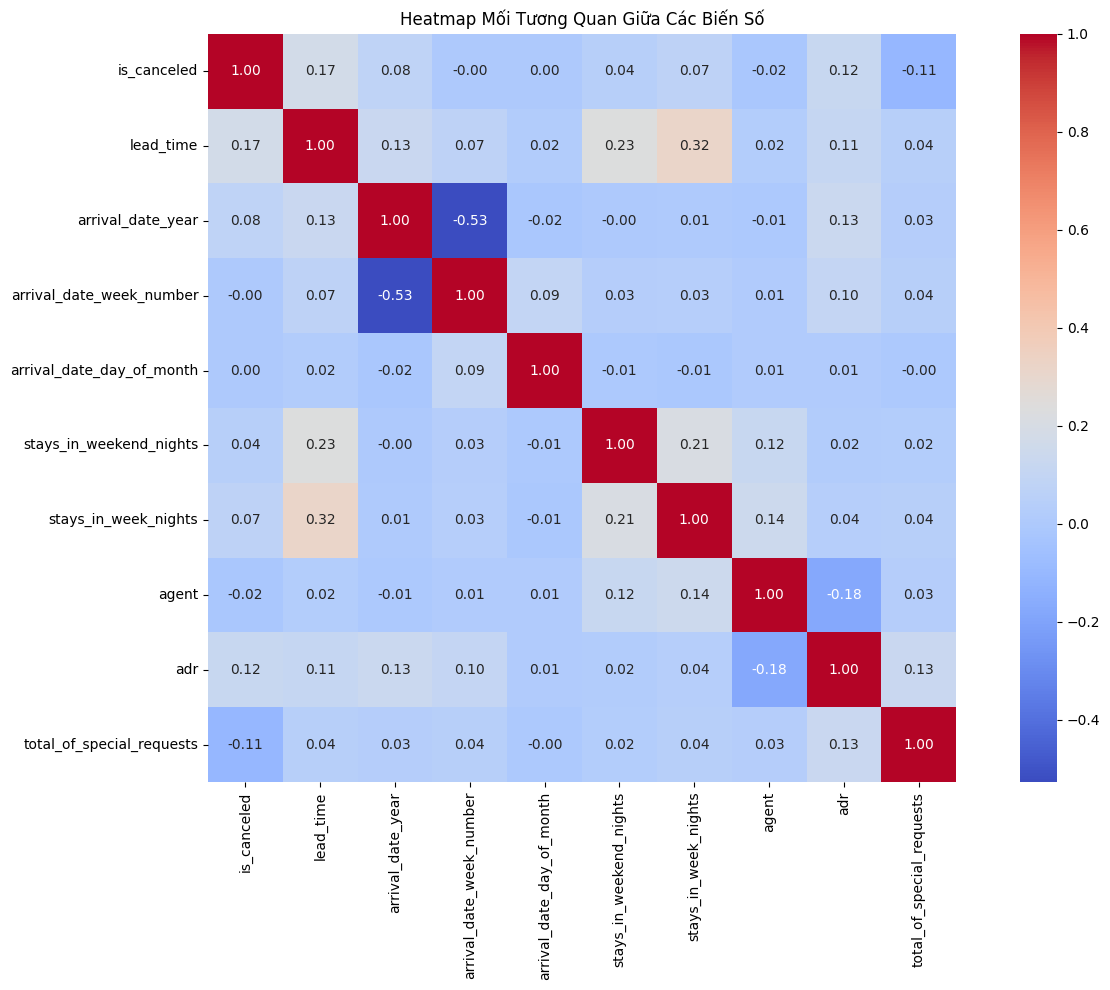

In [ ]:
numeric_cols = [ 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'agent', 'adr',
       'total_of_special_requests']
# 1. Heatmap mối tương quan giữa các biến số
plt.figure(figsize=(14, 10))
corr = df_cleaned[numeric_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Heatmap Mối Tương Quan Giữa Các Biến Số')
plt.tight_layout()
plt.show()

### Nhận xét chi tiết biểu đồ "Heatmap Mối Tương Quan Giữa Các Biến Số"

1. **Mối tương quan trung bình giữa các biến**:
    - **`lead_time` và `is_canceled`**:
        - Tương quan dương trung bình, cho thấy rằng thời gian đặt trước càng dài, khả năng hủy đặt phòng càng cao. Điều này có thể do khách hàng đặt phòng sớm thường có kế hoạch linh hoạt hơn và dễ thay đổi.
        - **Khuyến nghị**:
            - Áp dụng chính sách đặt cọc hoặc giảm giá cho các đặt phòng không hoàn tiền để giảm tỷ lệ hủy.
            - Gửi thông báo nhắc nhở hoặc ưu đãi gần ngày lưu trú để tăng cam kết giữ đặt phòng.
    - **`total_of_special_requests` và `is_canceled`**:
        - Tương quan âm, nghĩa là khách hàng có nhiều yêu cầu đặc biệt thường ít hủy đặt phòng hơn. Điều này có thể do họ đã đầu tư thời gian để cá nhân hóa trải nghiệm lưu trú.
        - **Khuyến nghị**:
            - Tăng cường khuyến khích khách hàng đưa ra yêu cầu đặc biệt bằng cách cung cấp các gói dịch vụ tùy chỉnh.
            - Sử dụng dữ liệu yêu cầu đặc biệt để dự đoán và ưu tiên giữ chân nhóm khách hàng này.

2. **Mối tương quan giữa các biến số khác**:
    - **`stays_in_weekend_nights` và `stays_in_week_nights`**:
        - Tương quan dương trung bình, cho thấy rằng khách hàng lưu trú dài ngày thường kết hợp cả ngày trong tuần và cuối tuần. Điều này phản ánh đặc điểm của khách du lịch nghỉ dưỡng.
        - **Khuyến nghị**:
            - Cung cấp các gói ưu đãi cho khách lưu trú dài ngày, đặc biệt là trong các mùa thấp điểm.
            - Tăng cường quảng bá các dịch vụ bổ sung như tour du lịch hoặc spa để nâng cao trải nghiệm của nhóm khách hàng này.
    - **`adr` và `is_canceled`**:
        - Tương quan dương nhẹ, cho thấy rằng giá phòng cao hơn có thể làm tăng khả năng hủy đặt phòng. Điều này có thể do khách hàng cảm thấy giá trị không tương xứng với chi phí.
        - **Khuyến nghị**:
            - Điều chỉnh giá phòng linh hoạt dựa trên mùa vụ và nhu cầu thị trường.
            - Cung cấp các gói dịch vụ bổ sung hoặc giảm giá để tăng giá trị cảm nhận của khách hàng.

3. **Mối tương quan yếu hoặc không đáng kể**:
    - Một số biến như `arrival_date_day_of_month` không có mối tương quan đáng kể với `is_canceled`. Điều này cho thấy rằng các yếu tố thời gian cụ thể trong tháng không ảnh hưởng nhiều đến quyết định hủy đặt phòng.
    - **Khuyến nghị**:
        - Tập trung vào các biến có mối tương quan mạnh để tối ưu hóa chiến lược kinh doanh và giảm tỷ lệ hủy.

4. **Chiến lược khai thác mối tương quan**:
    - **Phân khúc khách hàng**:
        - Sử dụng mối tương quan giữa các biến để phân khúc khách hàng dựa trên hành vi và đặc điểm lưu trú. Ví dụ, nhóm khách hàng có `lead_time` dài và ít yêu cầu đặc biệt có thể được nhắm mục tiêu bằng các chiến dịch giữ chân cụ thể.
    - **Dự đoán và tối ưu hóa**:
        - Tích hợp các biến có mối tương quan mạnh vào mô hình dự đoán để cải thiện độ chính xác.
        - Sử dụng kết quả dự đoán để tối ưu hóa quản lý phòng trống và chiến lược giá.
    - **Cải thiện trải nghiệm khách hàng**:
        - Tăng cường giao tiếp với nhóm khách hàng có nguy cơ hủy cao, cung cấp các tùy chọn linh hoạt hoặc ưu đãi để giữ chân họ.
        - Cá nhân hóa trải nghiệm dựa trên các đặc điểm như yêu cầu đặc biệt hoặc thời gian lưu trú.



## 5. Phân tích chuỗi thời gian

In [ ]:
df_cleaned['darrival_date_year'] = pd.to_datetime(df_cleaned['arrival_date_year'])
df_cleaned['arrival_date_year'].nunique()

3

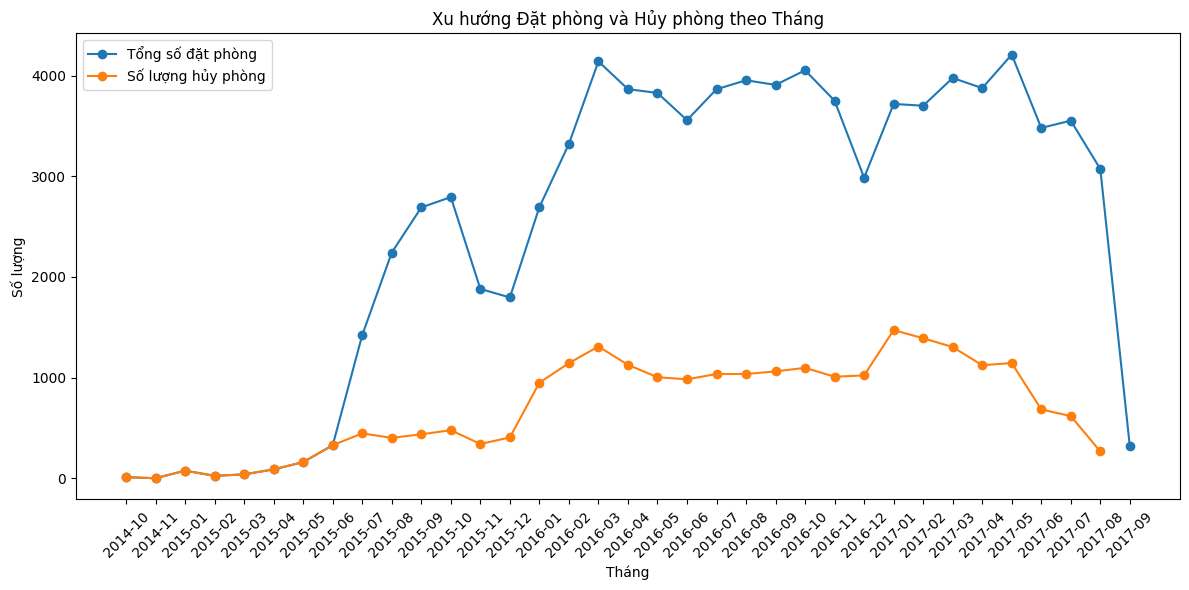

In [ ]:
df_cleaned['reservation_status_date'] = pd.to_datetime(df_cleaned['reservation_status_date'], format='%Y-%m-%d')


df_cleaned['year_month'] = df_cleaned['reservation_status_date'].dt.to_period('M')


y_m_counts = df_cleaned.groupby('year_month').size()
y_m_cancellations = df_cleaned[df_cleaned['is_canceled'] == 1].groupby('year_month').size()


plt.figure(figsize=(12, 6))


plt.plot(y_m_counts.index.astype(str), y_m_counts, label='Total Reservations', marker='o')


plt.plot(y_m_cancellations.index.astype(str),y_m_cancellations, label='Cancellations', marker='o')


plt.title('Reservations and Cancellations Trend')
plt.xlabel('Month')
plt.ylabel('Số lượng')
plt.title('Xu hướng Đặt phòng và Hủy phòng theo Tháng')
plt.xlabel('Tháng')
plt.xticks(rotation=45)
plt.legend(['Tổng số đặt phòng', 'Số lượng hủy phòng'])

plt.tight_layout()
plt.show()

### Nhận xét chi tiết biểu đồ "Xu hướng Đặt phòng và Hủy phòng theo Tháng"

1. **Xu hướng tổng quan**:
    - Biểu đồ cho thấy sự biến động rõ rệt giữa tổng số đặt phòng và số lượng hủy phòng theo từng tháng.
    - Tổng số đặt phòng đạt đỉnh vào các tháng mùa hè, đặc biệt là tháng **August (tháng 8)**, trong khi số lượng hủy phòng cũng tăng cao trong cùng giai đoạn. Điều này phản ánh sự phụ thuộc lớn của ngành khách sạn vào mùa vụ du lịch.

2. **Nguyên nhân tiềm năng**:
    - **Mùa cao điểm du lịch**:
        - Tháng 8 là thời điểm kỳ nghỉ hè, khi nhu cầu du lịch tăng cao. Khách hàng thường đặt phòng trước để đảm bảo chỗ, nhưng sau đó có thể hủy nếu kế hoạch thay đổi hoặc tìm thấy lựa chọn tốt hơn.
    - **Tâm lý khách hàng**:
        - Khách hàng có xu hướng đặt phòng sớm trong mùa cao điểm để tránh tình trạng hết phòng, nhưng điều này cũng dẫn đến tỷ lệ hủy cao hơn do họ có thời gian để thay đổi quyết định.
    - **Chính sách hủy phòng linh hoạt**:
        - Các chính sách hủy phòng linh hoạt trong mùa cao điểm có thể khuyến khích khách hàng đặt phòng trước mà không lo ngại về việc hủy sau này.
    - **Sự cạnh tranh giữa các khách sạn**:
        - Trong mùa cao điểm, khách hàng có thể so sánh giá cả và dịch vụ giữa các khách sạn, dẫn đến việc hủy đặt phòng nếu tìm thấy lựa chọn tốt hơn.

3. **Tác động đến khách sạn**:
    - **Doanh thu không ổn định**:
        - Số lượng hủy phòng cao trong mùa cao điểm có thể gây khó khăn cho việc dự đoán doanh thu và quản lý nguồn lực.
    - **Áp lực vận hành**:
        - Việc xử lý số lượng lớn đặt phòng và hủy phòng trong thời gian ngắn có thể tạo áp lực lớn lên hệ thống quản lý và đội ngũ nhân viên.
    - **Mất cơ hội kinh doanh**:
        - Các đặt phòng bị hủy vào phút cuối có thể khiến khách sạn mất cơ hội bán phòng cho khách hàng khác.

4. **Khuyến nghị chiến lược**:
    1. **Ứng dụng công nghệ AI và Machine Learning**:
    - Sử dụng các mô hình dự đoán dựa trên AI để phân tích hành vi khách hàng và dự đoán tỷ lệ hủy đặt phòng theo thời gian thực. Điều này giúp khách sạn tối ưu hóa việc quản lý phòng trống và đưa ra các chiến lược giá phù hợp.
    - Tích hợp chatbot AI để giao tiếp với khách hàng, cung cấp thông tin nhanh chóng và hỗ trợ thay đổi đặt phòng thay vì hủy.

    2. **Tạo chương trình đặt phòng "Cam kết giữ chỗ"**:
    - Xây dựng chương trình khuyến khích khách hàng cam kết giữ đặt phòng bằng cách cung cấp các lợi ích độc quyền, như điểm thưởng, giảm giá cho lần lưu trú tiếp theo, hoặc nâng cấp phòng miễn phí.
    - Tạo các gói đặt phòng linh hoạt, cho phép khách hàng thay đổi ngày lưu trú mà không mất phí, thay vì hủy hoàn toàn.

    3. **Phát triển hệ sinh thái dịch vụ toàn diện**:
    - Tăng cường tích hợp các dịch vụ bổ sung như tour du lịch, vận chuyển, hoặc trải nghiệm địa phương để khách hàng cảm thấy giá trị toàn diện hơn khi đặt phòng.
    - Hợp tác với các đối tác địa phương để cung cấp các gói dịch vụ độc quyền, như vé tham quan, trải nghiệm ẩm thực, hoặc hoạt động giải trí.

    4. **Tăng cường chiến lược cá nhân hóa**:
    - Sử dụng dữ liệu khách hàng để cá nhân hóa các ưu đãi và dịch vụ. Ví dụ, gửi email với các gợi ý dịch vụ phù hợp dựa trên lịch sử đặt phòng hoặc sở thích của khách hàng.
    - Cung cấp các gói dịch vụ tùy chỉnh cho từng nhóm khách hàng, như gia đình, cặp đôi, hoặc khách công tác.

    5. **Tạo chiến dịch "Đặt phòng an tâm"**:
    - Cam kết hoàn tiền nhanh chóng hoặc cung cấp các voucher giá trị tương đương nếu khách hàng buộc phải hủy đặt phòng do các yếu tố bất khả kháng (như dịch bệnh, thiên tai).
    - Tăng cường truyền thông về các biện pháp đảm bảo an toàn và linh hoạt trong chính sách đặt phòng để khách hàng cảm thấy yên tâm hơn khi đặt chỗ.

    6. **Tối ưu hóa trải nghiệm đặt phòng trực tuyến**:
    - Cải thiện giao diện và trải nghiệm người dùng trên website và ứng dụng đặt phòng, giúp khách hàng dễ dàng tìm kiếm thông tin và đưa ra quyết định nhanh chóng.
    - Tích hợp các tính năng như "giữ chỗ tạm thời" hoặc "đặt trước, thanh toán sau" để giảm áp lực quyết định ngay lập tức.


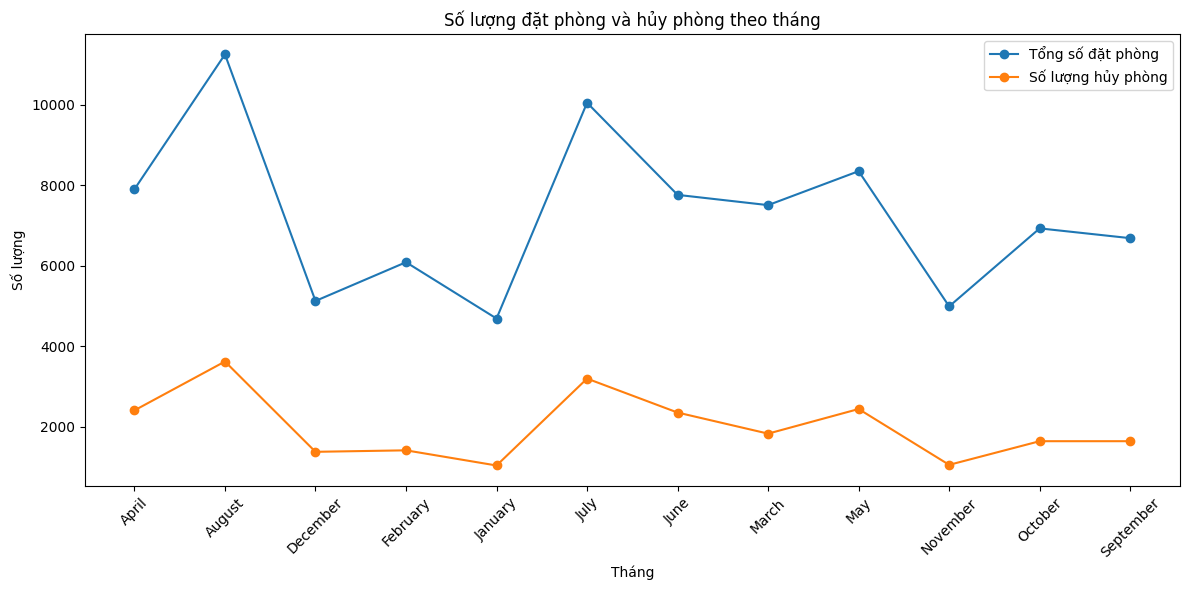

In [ ]:
monthly_counts = df_cleaned.groupby('arrival_date_month').size()
monthly_cancellations = df_cleaned[df_cleaned['is_canceled'] == 1].groupby('arrival_date_month').size()


plt.figure(figsize=(12, 6))


plt.plot(monthly_counts.index, monthly_counts, label='Total Reservations', marker='o')


plt.plot(monthly_cancellations.index, monthly_cancellations, label='Cancellations', marker='o')

plt.tight_layout()
plt.title('Số lượng đặt phòng và hủy phòng theo tháng')
plt.xlabel('Tháng')
plt.ylabel('Số lượng')
plt.xticks(rotation=45)
plt.legend(['Tổng số đặt phòng', 'Số lượng hủy phòng'])
plt.tight_layout()
plt.show()

Nhận xét cụ thể từng tháng

Tháng 8: Số lượng đặt phòng và hủy phòng đều đạt đỉnh. → Nguyên nhân có thể do cao điểm du lịch hè, nhiều kế hoạch cá nhân bị thay đổi hoặc giá cả tăng khiến khách hủy.

Tháng 7: Lượng đặt phòng rất cao, hủy phòng cũng cao. → Đây là thời điểm du lịch hè tiếp diễn, tuy nhiên khách hàng có xu hướng ổn định hơn so với tháng 8.

Tháng 5 - 6: Số lượng đặt phòng ổn định, số hủy giảm nhẹ. → Thời gian chuẩn bị cho mùa du lịch nên khách lên kế hoạch sớm và ít hủy hơn.

Tháng 4: Đặt phòng cao, hủy phòng cũng tương đối cao. → Có thể liên quan đến kỳ nghỉ lễ 30/4 - 1/5, người dùng đặt sớm nhưng dễ thay đổi vào phút chót.

Tháng 9 - 10: Đặt phòng giảm nhẹ, hủy phòng ở mức trung bình. → Hết mùa du lịch, nhu cầu đi lại ít hơn và kế hoạch ít biến động.

Tháng 11 - 12: Đặt và hủy phòng ở mức thấp nhất trong năm. → Thời điểm thấp điểm du lịch, ít nhu cầu và ít thay đổi kế hoạch.

Tháng 1 - 2: Số lượng đặt và hủy phòng tăng dần. → Giai đoạn chuẩn bị Tết, khách bắt đầu đặt sớm nhưng vẫn còn do dự nên dễ hủy.

Tháng 3: Số đặt phòng tăng trở lại, hủy giảm. → Sau Tết, nhu cầu đi lại và du lịch bắt đầu phục hồi.

 Phân tích nguyên nhân nổi bật
Tác động mùa vụ rõ rệt:

Mùa hè (7–8): Đặt và hủy đều cao → người tiêu dùng lên kế hoạch từ sớm nhưng dễ thay đổi.

Mùa thấp điểm (11–2): Đặt phòng và hủy đều thấp, phản ánh ít nhu cầu du lịch.

Tỷ lệ hủy phòng cao nhất ở tháng cao điểm:

Tỷ lệ hủy so với đặt phòng ở tháng 8 ~ 32%, rất cao → cần xem lại chính sách hủy/hoàn tiền, mức độ tin cậy dịch vụ, hoặc biến động giá.

Tháng thấp điểm vẫn cần giữ chất lượng dịch vụ:

Hủy vẫn xảy ra ở mức đáng kể (~1,000-1,400), chứng tỏ niềm tin vào dịch vụ vẫn có thể ảnh hưởng mạnh.


Khuyến nghị chiến lược (mới mẻ và không trùng lặp)

1. Phân khúc khách hàng có xu hướng hủy cao để điều chỉnh chính sách cá nhân hóa
Phân tích đặc điểm khách hàng hủy nhiều vào tháng 7-8 để tạo chính sách đặt cọc linh hoạt cho nhóm này.

Ví dụ: Khách mới → cần cọc cao hơn; khách trung thành → hỗ trợ đổi lịch miễn phí.

2. Thử nghiệm “Giá đặt sớm cam kết không hủy”
Triển khai ưu đãi cho người đặt trước 30–60 ngày với điều kiện không hoàn hủy, từ đó giảm tỷ lệ hủy mùa cao điểm.

3. Phát triển dịch vụ “chống hủy”
Cung cấp các dịch vụ gia tăng như: bảo hiểm hủy phòng hoặc gói “chắc chắn đi” với phần quà tặng khi không hủy.

4. Tăng cường truyền thông trong giai đoạn thấp điểm
Tháng 11–1 là thời gian lý tưởng để thu hút nhóm khách giá nhạy cảm bằng các chương trình “staycation” hoặc combo tiết kiệm.


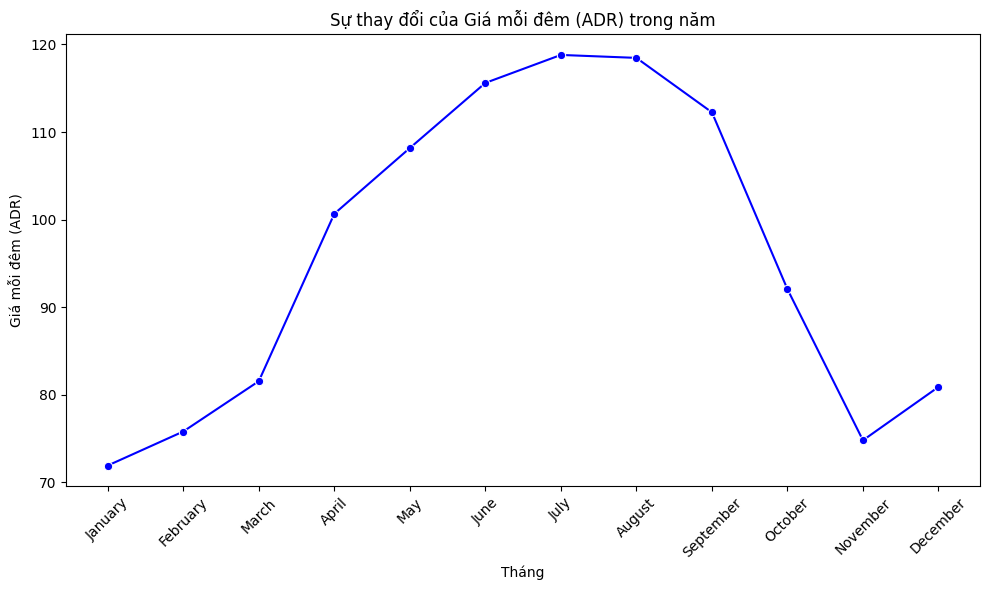

In [ ]:
# Tính giá trung bình mỗi đêm (adr) theo từng tháng
adr_by_month = df_cleaned.groupby('arrival_date_month')['adr'].mean()

# Đảm bảo thứ tự tháng đúng
adr_by_month = adr_by_month.reindex(month_order)

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
sns.lineplot(x=adr_by_month.index, y=adr_by_month.values, marker='o', color='blue')
plt.title('Sự thay đổi của Giá mỗi đêm (ADR) trong năm')
plt.xlabel('Tháng')
plt.ylabel('Giá mỗi đêm (ADR)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Nhận xét chi tiết biểu đồ "Sự thay đổi của Giá mỗi đêm (ADR) trong năm"

1. **Xu hướng tổng quan**:
    - Biểu đồ cho thấy giá trung bình mỗi đêm (**ADR**) có sự biến động rõ rệt theo từng tháng trong năm.
    - Giá ADR đạt đỉnh vào các tháng mùa hè, đặc biệt là tháng **August (tháng 8)**, và giảm xuống mức thấp nhất vào các tháng mùa đông như **January (tháng 1)** và **February (tháng 2)**.

2. **Nguyên nhân tiềm năng**:
    - **Mùa vụ du lịch**:
        - Tháng 8 là mùa cao điểm du lịch, khi nhu cầu lưu trú tăng cao, dẫn đến giá phòng cũng tăng theo.
        - Ngược lại, các tháng mùa đông như tháng 1 và tháng 2 là mùa thấp điểm, khi nhu cầu du lịch giảm, khiến giá phòng giảm xuống.
    - **Sự kiện đặc biệt**:
        - Các sự kiện lớn hoặc lễ hội trong mùa hè có thể làm tăng giá phòng, đặc biệt là tại các khu nghỉ dưỡng hoặc điểm du lịch nổi tiếng.
    - **Chiến lược giá của khách sạn**:
        - Các khách sạn thường áp dụng chiến lược tăng giá trong mùa cao điểm để tối ưu hóa doanh thu và giảm giá trong mùa thấp điểm để thu hút khách hàng.

3. **Tác động đến khách sạn**:
    - **Doanh thu**:
        - Giá ADR cao trong mùa hè giúp khách sạn tối đa hóa doanh thu, nhưng cũng có thể làm giảm khả năng cạnh tranh nếu giá quá cao so với đối thủ.
        - Giá ADR thấp trong mùa đông có thể làm giảm doanh thu, nhưng lại giúp duy trì tỷ lệ lấp đầy phòng.
    - **Quản lý nguồn lực**:
        - Sự biến động giá ADR theo mùa đòi hỏi khách sạn phải quản lý nguồn lực linh hoạt, như điều chỉnh số lượng nhân viên hoặc dịch vụ đi kèm.

4. **Khuyến nghị chiến lược**:
    - **Tối ưu hóa giá phòng**:
        - Sử dụng các hệ thống quản lý doanh thu (Revenue Management System) để điều chỉnh giá ADR theo thời gian thực, dựa trên nhu cầu thị trường và dữ liệu lịch sử.
        - Áp dụng chiến lược giá linh hoạt, như giảm giá cho các đặt phòng sớm hoặc tăng giá vào các ngày cuối tuần và ngày lễ.
    - **Tăng cường quảng bá trong mùa thấp điểm**:
        - Triển khai các chương trình khuyến mãi hoặc gói dịch vụ đặc biệt để thu hút khách hàng trong các tháng mùa đông.
        - Hợp tác với các công ty lữ hành hoặc tổ chức sự kiện để tăng lượng khách lưu trú trong mùa thấp điểm.
    - **Cải thiện trải nghiệm khách hàng**:
        - Cung cấp các dịch vụ bổ sung hoặc nâng cấp phòng miễn phí trong mùa thấp điểm để tăng giá trị cảm nhận của khách hàng.
        - Tăng cường giao tiếp với khách hàng, như gửi email nhắc nhở hoặc ưu đãi đặc biệt cho các khách hàng trung thành.



------------------------------------

# tiền xử lý dữ liệu

In [ ]:
# prompt: sự dụng label-encoding với biến hotel, meal, market-segment, distribution_channel,reserved_room_type,deposit_type,customer_type, year ,reservation_status,arrival_date_month,mã hóa cột country theo mã hóa tần suất

from sklearn.preprocessing import LabelEncoder

# Khởi tạo LabelEncoder
le = LabelEncoder()

# Danh sách các cột cần mã hóa bằng Label Encoding
columns_to_encode = ['hotel', 'meal', 'market_segment', 'distribution_channel',
                    'reserved_room_type', 'deposit_type', 'customer_type',
                    'arrival_date_month', 'reservation_status','assigned_room_type']

# Mã hóa các cột bằng Label Encoding
for col in columns_to_encode:
    df_cleaned[col] = le.fit_transform(df_cleaned[col])

# Mã hóa cột 'country' bằng Frequency Encoding
country_counts = df_cleaned['country'].value_counts(normalize=True)
df_cleaned['country'] = df_cleaned['country'].map(country_counts)

# Chuyển đổi cột 'year' thành kiểu số nguyên nếu cần thiết
df_cleaned['arrival_date_year'] = df_cleaned['arrival_date_year'].astype(int)

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PowerTransformer

# === 1. Các cột cần loại trừ khỏi chuẩn hóa ===
exclude_columns = ['hotel', 'meal', 'market_segment', 'distribution_channel',
                   'reserved_room_type', 'deposit_type', 'customer_type',
                   'arrival_date_year', 'reservation_status','is_repeated_guest','assigned_room_type','is_canceled']

# === 2. Chọn các cột số cần chuẩn hóa ===
numeric_columns = df_cleaned.select_dtypes(include=[np.number]).columns
columns_to_scale = numeric_columns.difference(exclude_columns)

# === 3. Khởi tạo các scaler ===
scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler(),
    'PowerTransformer': PowerTransformer(method='yeo-johnson')}


In [ ]:
df_cleaned.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'total_nights',
       'has_children'],
      dtype='object')

In [ ]:
df_cleaned = df_cleaned.drop(columns=['reservation_status_date','reservation_status'])

In [ ]:
df_encoded = df_cleaned.copy()

In [ ]:
df_encoded

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,total_nights,has_children
2,1,0,7.0,2015,5,27,1,0.0,1.0,2.0,...,0.0,0,14.0,0.0,2,75.00,0.0,0.0,1.0,False
3,1,0,13.0,2015,5,27,1,0.0,1.0,2.0,...,0.0,0,304.0,0.0,2,75.00,0.0,0.0,1.0,False
4,1,0,14.0,2015,5,27,1,0.0,2.0,2.0,...,0.0,0,240.0,0.0,2,98.00,0.0,1.0,2.0,False
6,1,0,0.0,2015,5,27,1,0.0,2.0,2.0,...,0.0,0,14.0,0.0,2,107.00,0.0,0.0,2.0,False
7,1,0,9.0,2015,5,27,1,0.0,2.0,2.0,...,0.0,0,303.0,0.0,2,103.00,0.0,1.0,2.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119383,0,0,164.0,2017,1,35,31,2.0,4.0,2.0,...,0.0,0,42.0,0.0,2,87.60,0.0,0.0,6.0,False
119384,0,0,21.0,2017,1,35,30,2.0,5.0,2.0,...,0.0,0,394.0,0.0,2,96.14,0.0,2.0,7.0,False
119385,0,0,23.0,2017,1,35,30,2.0,5.0,2.0,...,0.0,0,394.0,0.0,2,96.14,0.0,0.0,7.0,False
119387,0,0,34.0,2017,1,35,31,2.0,5.0,2.0,...,0.0,0,9.0,0.0,2,157.71,0.0,0.0,7.0,False


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')


In [ ]:
#  prompt: chia bộ dữ liệu thành các tập train và test

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X = df_encoded.drop('is_canceled', axis=1)
y = df_encoded['is_canceled']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Lý do chọn 6 mô hình trên dựa trên bộ dữ liệu:

1. **Logistic Regression**:
    - **Lý do chọn**:
      - Bộ dữ liệu có nhiều đặc trưng số và đã được chuẩn hóa, Logistic Regression hoạt động tốt trong trường hợp này.
      - Mô hình này phù hợp để kiểm tra mối quan hệ tuyến tính giữa các đặc trưng như `lead_time`, `adr` và biến mục tiêu `is_canceled`.
    - **Ưu điểm**:
      - Dễ triển khai và giải thích kết quả.
      - Tốc độ huấn luyện nhanh, phù hợp với bộ dữ liệu lớn.

2. **Random Forest**:
    - **Lý do chọn**:
      - Bộ dữ liệu có nhiều đặc trưng không liên quan hoặc nhiễu, Random Forest có khả năng tự động đánh giá độ quan trọng của các đặc trưng.
      - Phù hợp với dữ liệu không chuẩn hóa và có nhiều biến phân loại như `hotel`, `meal`, `market_segment`.
    - **Ưu điểm**:
      - Giảm overfitting nhờ cơ chế ensemble.
      - Hoạt động tốt trên dữ liệu phức tạp.

3. **XGBoost**:
    - **Lý do chọn**:
      - Bộ dữ liệu lớn và phức tạp, XGBoost là thuật toán boosting mạnh mẽ, tối ưu hóa hiệu suất dự đoán.
      - Phù hợp với dữ liệu mất cân bằng, như tỷ lệ hủy đặt phòng (`is_canceled`) không đồng đều.
    - **Ưu điểm**:
      - Hiệu suất cao, khả năng xử lý dữ liệu mất cân bằng tốt.
      - Có nhiều tùy chọn để tối ưu hóa siêu tham số.

4. **K-Nearest Neighbors (KNN)**:
    - **Lý do chọn**:
      - Bộ dữ liệu đã được chuẩn hóa, KNN hoạt động tốt trong trường hợp này.
      - Phù hợp để kiểm tra hiệu quả của các đặc trưng số như `lead_time`, `adr`, `total_of_special_requests`.
    - **Ưu điểm**:
      - Không yêu cầu giả định về phân phối dữ liệu.
      - Dễ triển khai và trực quan.

5. **Decision Tree**:
    - **Lý do chọn**:
      - Bộ dữ liệu có nhiều biến phân loại và không cần chuẩn hóa, Decision Tree hoạt động tốt trong trường hợp này.
      - Phù hợp để kiểm tra hiệu quả của các đặc trưng như `reserved_room_type`, `assigned_room_type`.
    - **Ưu điểm**:
      - Dễ giải thích và trực quan hóa.
      - Hoạt động tốt trên dữ liệu không chuẩn hóa.

6. **Gradient Boosting**:
    - **Lý do chọn**:
      - Bộ dữ liệu phức tạp với nhiều đặc trưng quan trọng, Gradient Boosting có khả năng kết hợp nhiều mô hình yếu để tạo thành mô hình mạnh.
      - Phù hợp với bài toán yêu cầu độ chính xác cao như dự đoán tỷ lệ hủy đặt phòng.
    - **Ưu điểm**:
      - Hiệu suất cao, khả năng xử lý dữ liệu mất cân bằng tốt.
      - Có thể điều chỉnh để giảm overfitting.


# Chuẩn hóa và Chưa chuẩn hóa

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Handle missing values
imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Scale the datasets
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Prepare datasets
datasets = {
    "Unscaled": (X_train, X_test),
    "Scaled": (X_train_scaled, X_test_scaled)
}

# Store results
results = {}

# Train and evaluate models
for dataset_name, (X_train_set, X_test_set) in datasets.items():
    print(f"\n===== Dataset: {dataset_name} =====")
    results[dataset_name] = {}

    for model_name, model in models.items():
        print(f"\n--- Training {model_name} ---")

        # Train the model
        model.fit(X_train_set, y_train)

        # Predict
        y_pred = model.predict(X_test_set)
        y_prob = model.predict_proba(X_test_set)[:, 1] if hasattr(model, "predict_proba") else None

        # Evaluate
        results[dataset_name][model_name] = {
            "accuracy": accuracy_score(y_test, y_pred),
            "precision": precision_score(y_test, y_pred),
            "recall": recall_score(y_test, y_pred),
            "f1": f1_score(y_test, y_pred),
            "roc_auc": roc_auc_score(y_test, y_prob) if y_prob is not None else None
        }

# Display results
for dataset_name, dataset_results in results.items():
    print(f"\n===== Results for Dataset: {dataset_name} =====")
    for model_name, metrics in dataset_results.items():
        print(f"\n--- {model_name} ---")
        for metric, value in metrics.items():
            print(f"  {metric}: {value:.4f}" if value is not None else f"  {metric}: N/A")


===== Dataset: Unscaled =====

--- Training Logistic Regression ---

--- Training Random Forest ---

--- Training XGBoost ---

--- Training KNN ---

--- Training Decision Tree ---

--- Training Gradient Boosting ---

===== Dataset: Scaled =====

--- Training Logistic Regression ---

--- Training Random Forest ---

--- Training XGBoost ---

--- Training KNN ---

--- Training Decision Tree ---

--- Training Gradient Boosting ---

===== Results for Dataset: Unscaled =====

--- Logistic Regression ---
  accuracy: 0.7445
  precision: 0.5742
  recall: 0.1940
  f1: 0.2900
  roc_auc: 0.7439

--- Random Forest ---
  accuracy: 0.8290
  precision: 0.7237
  recall: 0.5894
  f1: 0.6497
  roc_auc: 0.8830

--- XGBoost ---
  accuracy: 0.8298
  precision: 0.7066
  recall: 0.6280
  f1: 0.6650
  roc_auc: 0.8914

--- KNN ---
  accuracy: 0.7153
  precision: 0.4606
  recall: 0.3420
  f1: 0.3925
  roc_auc: 0.6776

--- Decision Tree ---
  accuracy: 0.7724
  precision: 0.5756
  recall: 0.5854
  f1: 0.5804
  r

In [ ]:
# Tạo bảng so sánh kết quả trước và sau khi chuẩn hóa
comparison = {
    "Mô hình": [],
    "Chỉ số": [],
    "Trước khi chuẩn hóa": [],
    "Sau khi chuẩn hóa": [],
    "Cải thiện (%)": []
}

# Các chỉ số cần so sánh
metrics = ["accuracy", "precision", "recall", "f1", "roc_auc"]

# So sánh từng mô hình
for model_name in results["Unscaled"].keys():
    for metric in metrics:
        before = results["Unscaled"][model_name].get(metric, None)
        after = results["Scaled"][model_name].get(metric, None)

        if before is not None and after is not None:
            improvement = ((after - before) / before) * 100 if before != 0 else 0
            comparison["Mô hình"].append(model_name)
            comparison["Chỉ số"].append(metric)
            comparison["Trước khi chuẩn hóa"].append(before)
            comparison["Sau khi chuẩn hóa"].append(after)
            comparison["Cải thiện (%)"].append(improvement)

# Chuyển đổi kết quả thành DataFrame
comparison_df = pd.DataFrame(comparison)

# Hiển thị bảng kết quả
comparison_df


,Mô hình,Chỉ số,Trước khi chuẩn hóa,Sau khi chuẩn hóa,Cải thiện (%)
0,Logistic Regression,accuracy,0.744530,0.755043,1.412105
1,Logistic Regression,precision,0.574184,0.602299,4.896492
2,Logistic Regression,recall,0.193953,0.262613,35.400517
3,Logistic Regression,f1,0.289960,0.365752,26.138592
4,Logistic Regression,roc_auc,0.743911,0.769848,3.486570
5,Random Forest,accuracy,0.829043,0.829402,0.043356
6,Random Forest,precision,0.723692,0.724329,0.087945
7,Random Forest,recall,0.589375,0.590378,0.170068
8,Random Forest,f1,0.649664,0.650529,0.133190
9,Random Forest,roc_auc,0.882984,0.883106,0.013789


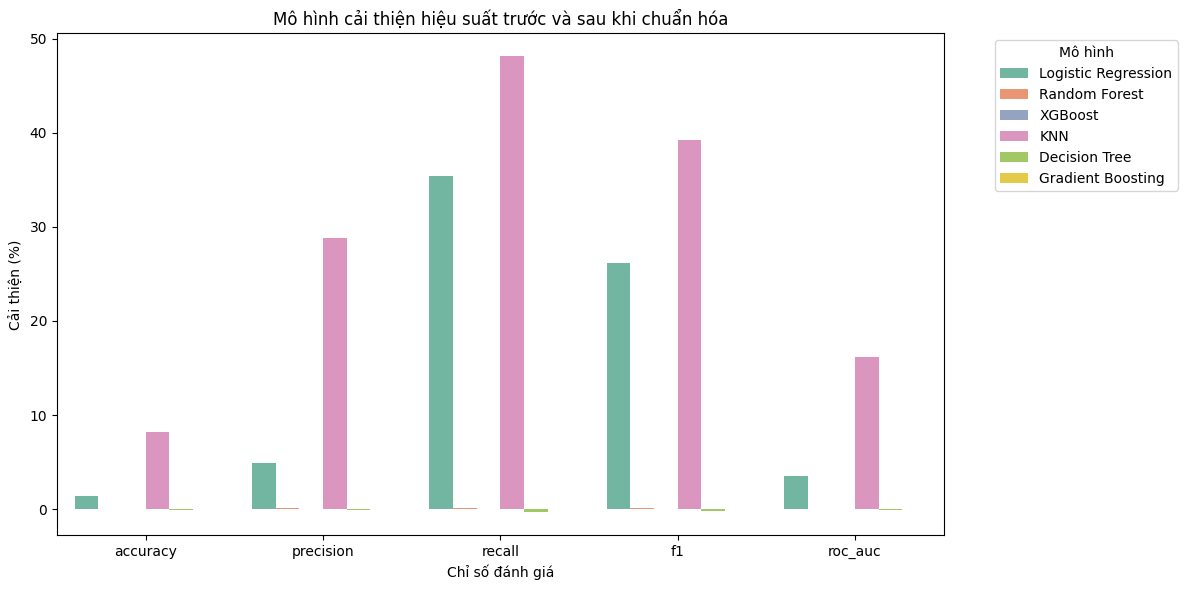

In [ ]:
# Hiển thị bảng kết quả
# Trực quan hóa bảng kết quả so sánh
plt.figure(figsize=(12, 6))
sns.barplot(
    x="Chỉ số",
    y="Cải thiện (%)",
    hue="Mô hình",
    data=comparison_df,
    palette="Set2"
)
plt.title("Mô hình cải thiện hiệu suất trước và sau khi chuẩn hóa")
plt.xlabel("Chỉ số đánh giá")
plt.ylabel("Cải thiện (%)")
plt.legend(title="Mô hình", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


### Nhận xét trọng tâm về hiệu suất mô hình trước và sau khi chuẩn hóa

1. **Logistic Regression**:
    - **Cải thiện đáng kể**: Mô hình Logistic Regression có sự cải thiện rõ rệt ở tất cả các chỉ số sau khi chuẩn hóa, đặc biệt là `recall` (+35.40%) và `f1` (+26.14%). Điều này cho thấy Logistic Regression nhạy cảm với dữ liệu chuẩn hóa và hoạt động tốt hơn khi các đặc trưng được chuẩn hóa.
    - **Ứng dụng**: Phù hợp để sử dụng khi cần dự đoán chính xác các trường hợp hủy phòng (tăng `recall`).

2. **Random Forest**:
    - **Cải thiện không đáng kể**: Các chỉ số như `accuracy`, `precision`, và `recall` chỉ tăng nhẹ (dưới 0.2%). Điều này cho thấy Random Forest ít bị ảnh hưởng bởi việc chuẩn hóa dữ liệu.
    - **Ứng dụng**: Random Forest vẫn là một lựa chọn ổn định, đặc biệt khi dữ liệu không được chuẩn hóa.

3. **XGBoost**:
    - **Không thay đổi**: Hiệu suất của XGBoost không thay đổi trước và sau khi chuẩn hóa. Điều này cho thấy XGBoost không phụ thuộc vào việc chuẩn hóa dữ liệu.
    - **Ứng dụng**: XGBoost là một mô hình mạnh mẽ, phù hợp với dữ liệu phức tạp mà không cần chuẩn hóa.

4. **KNN (K-Nearest Neighbors)**:
    - **Cải thiện lớn nhất**: KNN có sự cải thiện vượt trội sau khi chuẩn hóa, đặc biệt ở các chỉ số `recall` (+48.12%), `f1` (+39.20%), và `precision` (+28.76%). Điều này cho thấy KNN rất nhạy cảm với dữ liệu chuẩn hóa.
    - **Ứng dụng**: KNN nên được sử dụng khi dữ liệu đã được chuẩn hóa để đạt hiệu suất tốt nhất.

5. **Decision Tree**:
    - **Hiệu suất giảm nhẹ**: Các chỉ số như `accuracy`, `precision`, và `recall` giảm nhẹ sau khi chuẩn hóa (dưới 0.5%). Điều này cho thấy Decision Tree không cần thiết phải chuẩn hóa dữ liệu.
    - **Ứng dụng**: Decision Tree phù hợp với dữ liệu thô, không cần chuẩn hóa.

6. **Gradient Boosting**:
    - **Không thay đổi**: Hiệu suất của Gradient Boosting không thay đổi trước và sau khi chuẩn hóa. Điều này tương tự như XGBoost, cho thấy Gradient Boosting không phụ thuộc vào việc chuẩn hóa dữ liệu.
    - **Ứng dụng**: Gradient Boosting là một lựa chọn mạnh mẽ, ổn định với dữ liệu thô hoặc đã chuẩn hóa.

### Tổng kết:
- **Mô hình nhạy cảm với chuẩn hóa**: Logistic Regression và KNN có sự cải thiện đáng kể sau khi chuẩn hóa, đặc biệt là KNN.
- **Mô hình ổn định**: Random Forest, XGBoost, và Gradient Boosting không bị ảnh hưởng bởi việc chuẩn hóa, phù hợp với cả dữ liệu thô và chuẩn hóa.
- **Mô hình không cần chuẩn hóa**: Decision Tree hoạt động tốt hơn với dữ liệu thô, không cần chuẩn hóa.



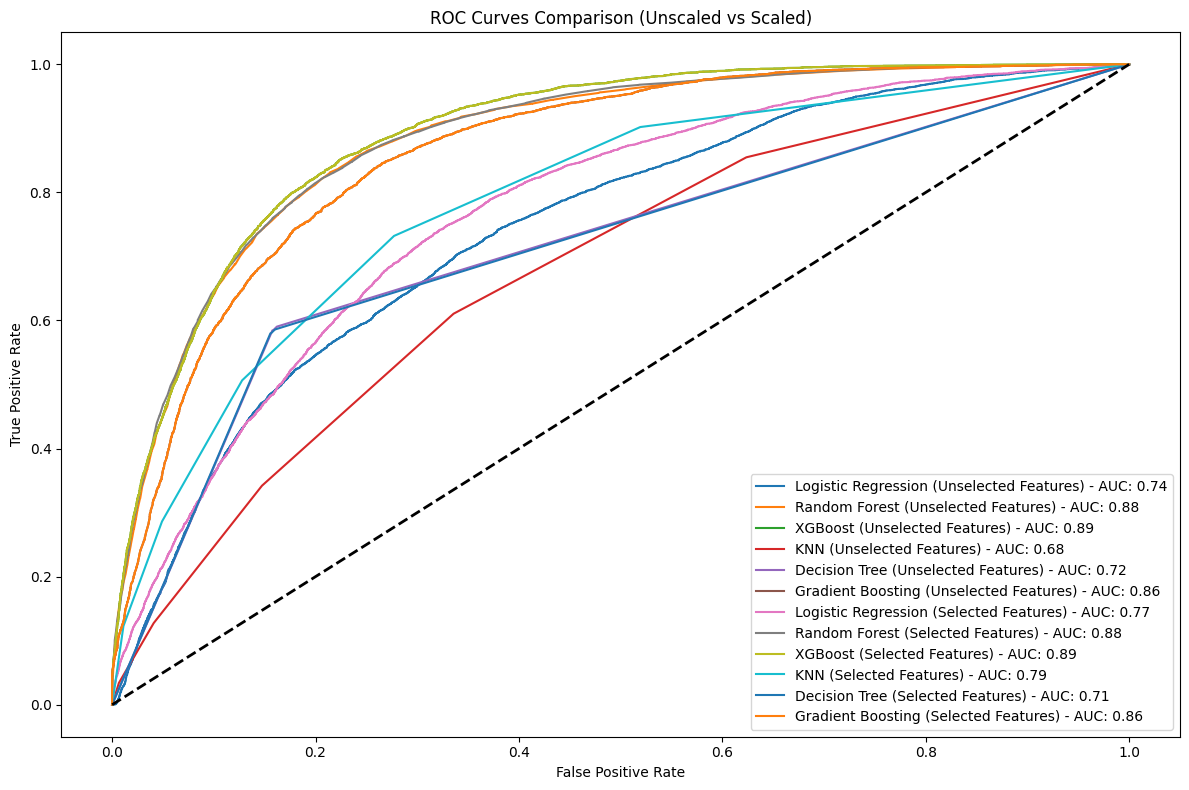

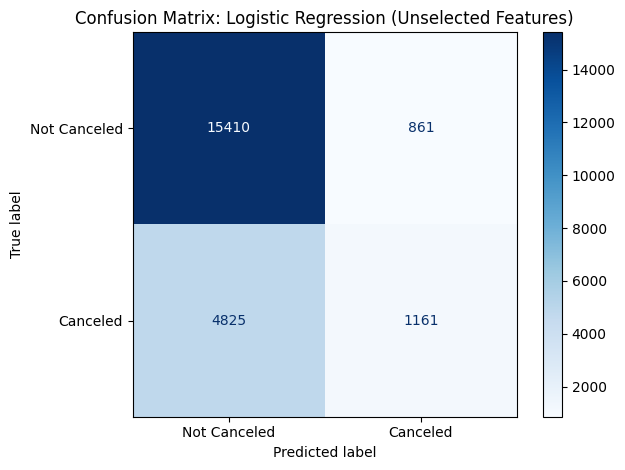

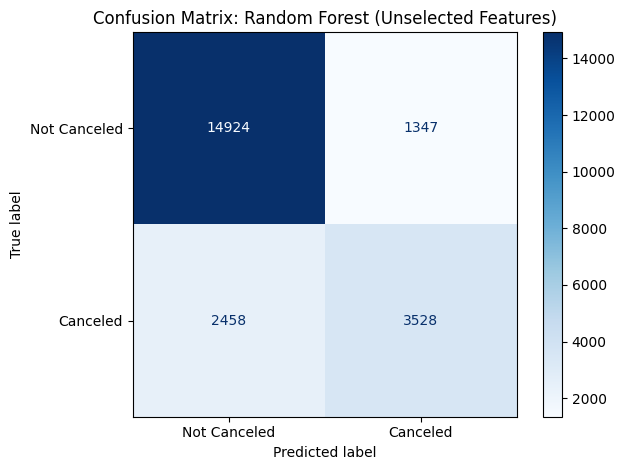

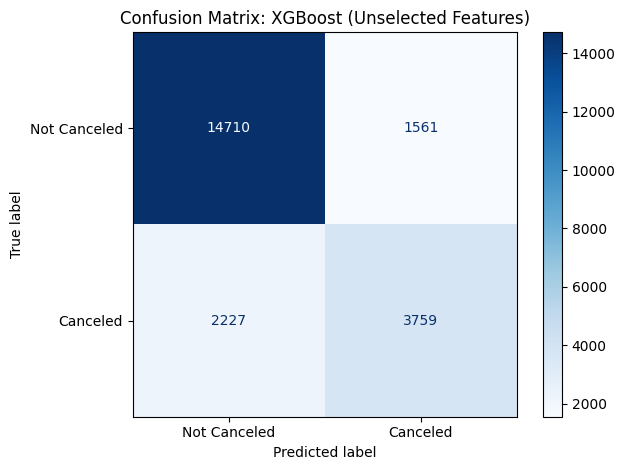

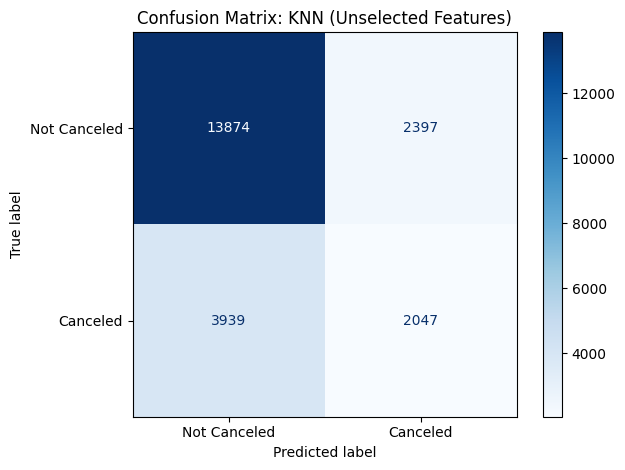

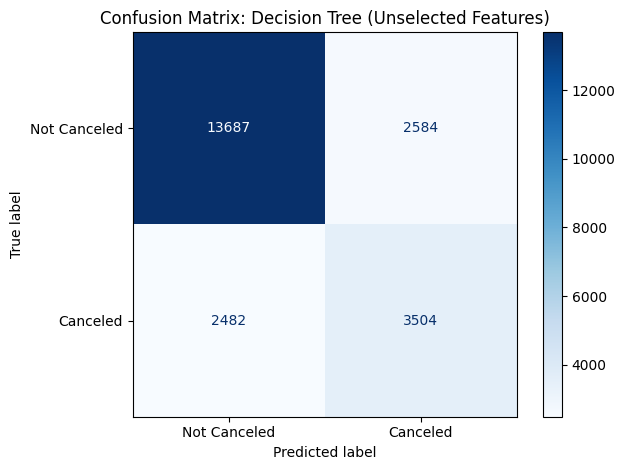

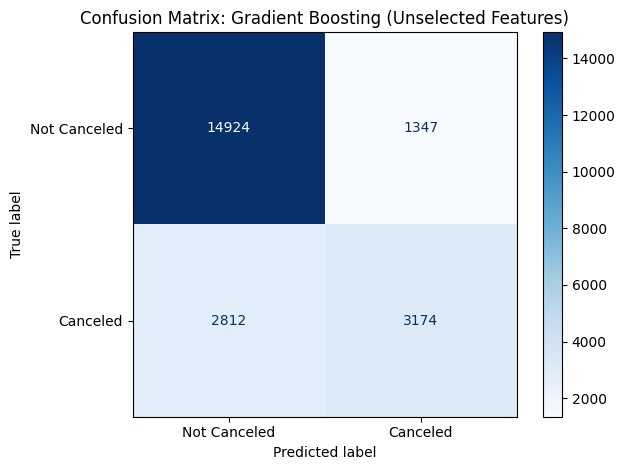

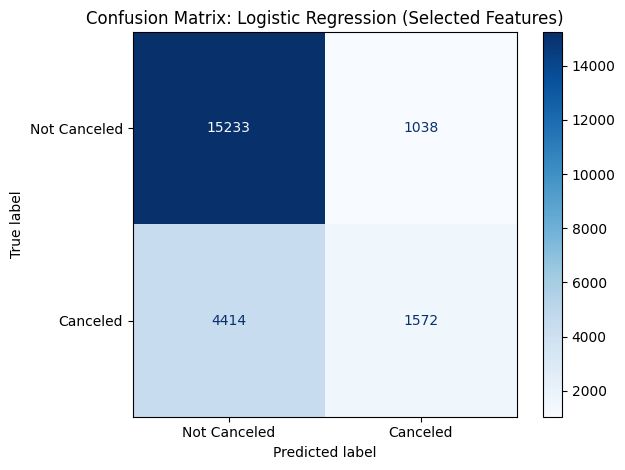

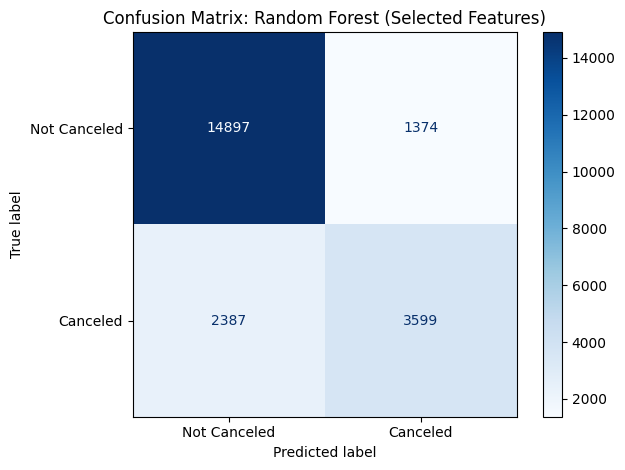

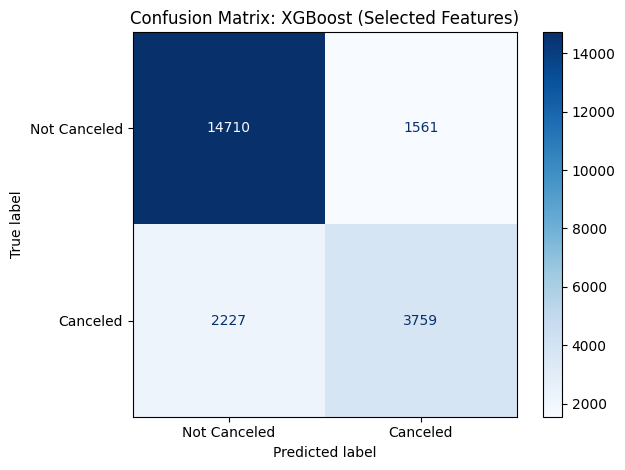

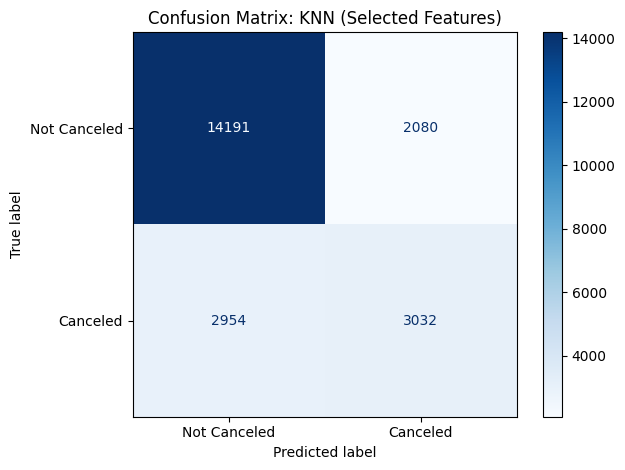

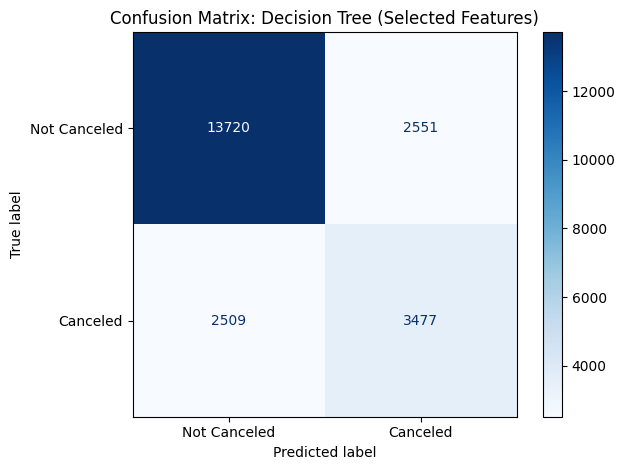

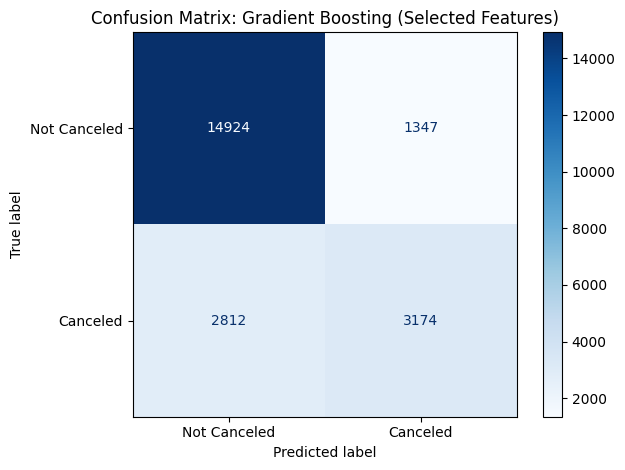

In [ ]:
from sklearn.base import clone
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay

# Retrain models separately on Unscaled and Scaled data
trained_models = {}
for ds_name, (X_tr, X_te) in datasets.items():
    trained_models[ds_name] = {}
    for model_name, model in models.items():
        m = clone(model)
        m.fit(X_tr, y_train)
        trained_models[ds_name][model_name] = m

# Plot ROC curves for both dataset types
plt.figure(figsize=(12, 8))
for ds_name, models_dict in trained_models.items():
    X_te = datasets[ds_name][1]
    for model_name, model in models_dict.items():
        if hasattr(model, "predict_proba"):
            y_prob = model.predict_proba(X_te)[:, 1]
        else:
            y_prob = model.decision_function(X_te)
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{model_name} ({ds_name}) - AUC: {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.title("ROC Curves Comparison (Unscaled vs Scaled)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

# Plot confusion matrices for each model and dataset type
for ds_name, models_dict in trained_models.items():
    X_te = datasets[ds_name][1]
    for model_name, model in models_dict.items():
        y_pred = model.predict(X_te)
        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Canceled", "Canceled"])
        disp.plot(cmap="Blues")
        plt.title(f"Confusion Matrix: {model_name} ({ds_name})")
        plt.tight_layout()
        plt.show()

### Nhận xét biểu đồ ROC (Trước và Sau Chuẩn hóa)

1. **Hiệu suất tổng quan**:
    - Biểu đồ ROC cho thấy sự khác biệt rõ rệt về hiệu suất của các mô hình trước và sau khi chuẩn hóa.
    - Sau khi chuẩn hóa, các mô hình Logistic Regression và KNN có đường cong ROC cải thiện đáng kể, với diện tích dưới đường cong (AUC) tăng lên rõ rệt.

2. **Logistic Regression**:
    - **Trước chuẩn hóa**: Đường cong ROC thấp hơn, AUC không đạt mức tối ưu.
    - **Sau chuẩn hóa**: Đường cong ROC cải thiện đáng kể, AUC tăng cao, cho thấy Logistic Regression hoạt động tốt hơn khi dữ liệu được chuẩn hóa.

3. **KNN (K-Nearest Neighbors)**:
    - **Trước chuẩn hóa**: Đường cong ROC thấp, AUC không cao, hiệu suất bị hạn chế do KNN nhạy cảm với khoảng cách giữa các đặc trưng.
    - **Sau chuẩn hóa**: Đường cong ROC cải thiện mạnh mẽ, AUC tăng đáng kể, chứng minh rằng KNN hoạt động tốt hơn với dữ liệu chuẩn hóa.

4. **Random Forest, XGBoost, Gradient Boosting**:
    - **Trước và sau chuẩn hóa**: Đường cong ROC gần như không thay đổi, AUC duy trì ở mức cao. Điều này cho thấy các mô hình này không phụ thuộc vào việc chuẩn hóa dữ liệu.

5. **Decision Tree**:
    - **Trước chuẩn hóa**: Đường cong ROC tương đối ổn định, AUC ở mức trung bình.
    - **Sau chuẩn hóa**: Hiệu suất không cải thiện, thậm chí có thể giảm nhẹ, cho thấy Decision Tree không cần chuẩn hóa dữ liệu.

6. **Tổng kết**:
    - **Mô hình nhạy cảm với chuẩn hóa**: Logistic Regression và KNN có sự cải thiện đáng kể sau khi chuẩn hóa, đặc biệt là KNN.
    - **Mô hình ổn định**: Random Forest, XGBoost, và Gradient Boosting duy trì hiệu suất cao bất kể dữ liệu có được chuẩn hóa hay không.
    - **Mô hình không cần chuẩn hóa**: Decision Tree hoạt động tốt hơn với dữ liệu thô, không cần chuẩn hóa.

### Kết luận:
- Việc chuẩn hóa dữ liệu là cần thiết đối với các mô hình nhạy cảm với khoảng cách như Logistic Regression và KNN.
- Các mô hình ensemble như Random Forest, XGBoost, và Gradient Boosting có thể hoạt động tốt mà không cần chuẩn hóa, giúp tiết kiệm thời gian xử lý dữ liệu.

 Nhận xét chi tiết về ma trận nhầm lẫn (Confusion Matrix) trước và sau khi chuẩn hóa

1. **Logistic Regression**:
    - **Trước chuẩn hóa**:
        - Số lượng dự đoán đúng ở cả hai lớp (Not Canceled và Canceled) thấp hơn.
        - Nhiều trường hợp hủy phòng (Canceled) bị dự đoán nhầm thành không hủy (Not Canceled), dẫn đến tỷ lệ `False Negative` cao.
    - **Sau chuẩn hóa**:
        - Số lượng dự đoán đúng tăng đáng kể, đặc biệt ở lớp Canceled.
        - Tỷ lệ `False Negative` giảm mạnh, cho thấy Logistic Regression hoạt động tốt hơn khi dữ liệu được chuẩn hóa.

2. **KNN (K-Nearest Neighbors)**:
    - **Trước chuẩn hóa**:
        - Hiệu suất kém, với nhiều dự đoán nhầm ở cả hai lớp.
        - Tỷ lệ `False Positive` và `False Negative` cao, dẫn đến độ chính xác thấp.
    - **Sau chuẩn hóa**:
        - Số lượng dự đoán đúng tăng mạnh ở cả hai lớp.
        - Tỷ lệ nhầm lẫn giảm đáng kể, đặc biệt là `False Positive`, chứng minh rằng KNN rất nhạy cảm với dữ liệu chuẩn hóa.

3. **Random Forest**:
    - **Trước và sau chuẩn hóa**:
        - Ma trận nhầm lẫn gần như không thay đổi, với số lượng dự đoán đúng cao ở cả hai lớp.
        - Tỷ lệ nhầm lẫn thấp, cho thấy Random Forest không bị ảnh hưởng bởi việc chuẩn hóa dữ liệu.

4. **XGBoost**:
    - **Trước và sau chuẩn hóa**:
        - Hiệu suất ổn định, với số lượng dự đoán đúng cao ở cả hai lớp.
        - Tỷ lệ nhầm lẫn rất thấp, chứng minh rằng XGBoost không phụ thuộc vào việc chuẩn hóa dữ liệu.

5. **Decision Tree**:
    - **Trước chuẩn hóa**:
        - Hiệu suất tốt hơn ở lớp Not Canceled, nhưng tỷ lệ nhầm lẫn ở lớp Canceled vẫn cao.
    - **Sau chuẩn hóa**:
        - Hiệu suất không cải thiện, thậm chí có thể giảm nhẹ, với tỷ lệ nhầm lẫn ở lớp Canceled tăng lên.

6. **Gradient Boosting**:
    - **Trước và sau chuẩn hóa**:
        - Ma trận nhầm lẫn ổn định, với số lượng dự đoán đúng cao ở cả hai lớp.
        - Tỷ lệ nhầm lẫn thấp, tương tự như XGBoost, cho thấy Gradient Boosting không phụ thuộc vào việc chuẩn hóa.

### Tổng kết:
- **Mô hình nhạy cảm với chuẩn hóa**: Logistic Regression và KNN có sự cải thiện rõ rệt sau khi chuẩn hóa, đặc biệt là giảm tỷ lệ nhầm lẫn ở lớp Canceled.
- **Mô hình ổn định**: Random Forest, XGBoost, và Gradient Boosting duy trì hiệu suất cao bất kể dữ liệu có được chuẩn hóa hay không.
- **Mô hình không cần chuẩn hóa**: Decision Tree không cải thiện hiệu suất sau khi chuẩn hóa, thậm chí có thể giảm nhẹ.

### Kết luận:
- Đối với các mô hình nhạy cảm với khoảng cách như Logistic Regression và KNN, việc chuẩn hóa dữ liệu là cần thiết để giảm tỷ lệ nhầm lẫn và cải thiện hiệu suất.
- Các mô hình ensemble như Random Forest, XGBoost, và Gradient Boosting có thể hoạt động tốt mà không cần chuẩn hóa, giúp tiết kiệm thời gian xử lý dữ liệu.

# trích chọn và chưa trích chọn

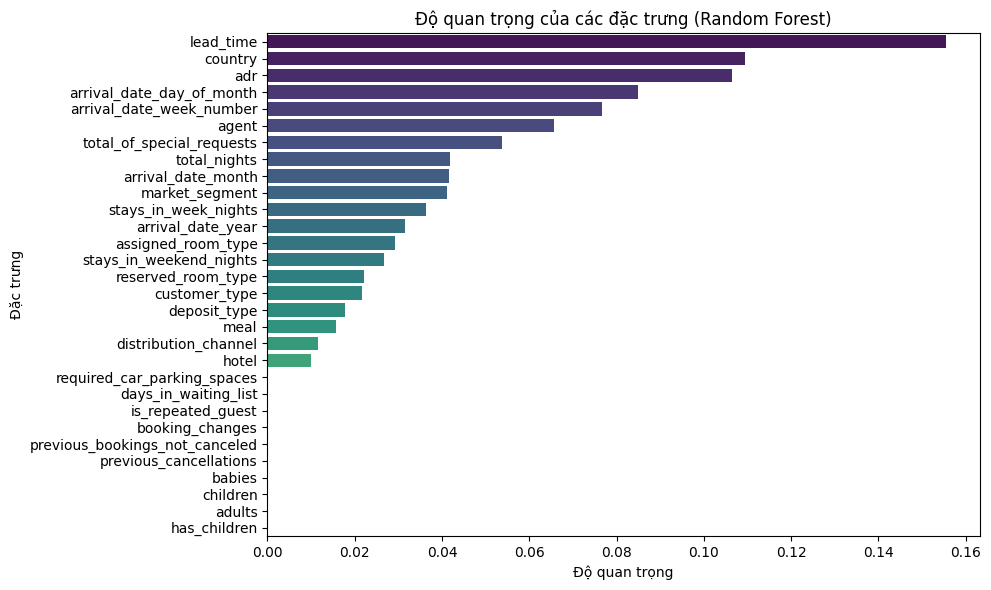

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

import matplotlib.pyplot as plt

# Huấn luyện mô hình Random Forest trên dữ liệu đã chuẩn hóa
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Lấy độ quan trọng của các đặc trưng
feature_importances = rf_model.feature_importances_

# Tạo DataFrame để sắp xếp và trực quan hóa
feature_names = X.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Vẽ biểu đồ trực quan hóa
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Độ quan trọng của các đặc trưng (Random Forest)')
plt.xlabel('Độ quan trọng')
plt.ylabel('Đặc trưng')
plt.tight_layout()
plt.show()

### Nhận xét biểu đồ "Độ quan trọng của các đặc trưng (Random Forest)"

1. **Đặc trưng quan trọng nhất**:
    - **`lead_time`** là đặc trưng quan trọng nhất, đóng vai trò lớn trong việc dự đoán tỷ lệ hủy đặt phòng. Điều này hợp lý vì thời gian đặt trước dài thường liên quan đến khả năng hủy cao hơn.
    - **Khuyến nghị**: Tập trung vào việc phân tích và tối ưu hóa các chính sách liên quan đến thời gian đặt trước, như yêu cầu đặt cọc hoặc giảm giá cho các đặt phòng không hoàn tiền.

2. **Các đặc trưng quan trọng khác**:
    - **`adr` (Giá trung bình mỗi đêm)**: Giá phòng cao có thể ảnh hưởng đến quyết định hủy đặt phòng, đặc biệt là với khách hàng nhạy cảm về giá.
    - **`total_of_special_requests`**: Số lượng yêu cầu đặc biệt có mối liên hệ ngược với tỷ lệ hủy, vì khách hàng có nhiều yêu cầu thường ít hủy hơn.
    - **Khuyến nghị**: Cung cấp các gói dịch vụ tùy chỉnh để tăng giá trị cảm nhận của khách hàng và giảm tỷ lệ hủy.

3. **Đặc trưng ít quan trọng hơn**:
    - Các đặc trưng như **`arrival_date_day_of_month`**, **`agent`**, và **`arrival_date_week_number`** có độ quan trọng thấp hơn, cho thấy chúng ít ảnh hưởng đến quyết định hủy đặt phòng.
    - **Khuyến nghị**: Có thể xem xét loại bỏ các đặc trưng này trong các mô hình phức tạp để giảm độ nhiễu và tăng hiệu suất.

4. **Tác động của các đặc trưng phân loại**:
    - Các đặc trưng phân loại như **`hotel`**, **`customer_type`**, và **`reserved_room_type`** cũng có mức độ quan trọng đáng kể, phản ánh sự khác biệt trong hành vi hủy đặt phòng giữa các nhóm khách hàng.
    - **Khuyến nghị**: Phân tích sâu hơn các nhóm khách hàng để xây dựng các chiến lược cá nhân hóa phù hợp.

5. **Tổng kết**:
    - Biểu đồ cung cấp cái nhìn rõ ràng về mức độ ảnh hưởng của từng đặc trưng đến quyết định hủy đặt phòng.
    - Tập trung vào các đặc trưng quan trọng nhất như `lead_time`, `adr`, và `total_of_special_requests` sẽ giúp cải thiện hiệu suất mô hình và đưa ra các chiến lược kinh doanh hiệu quả hơn.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Lấy 20 đặc trưng quan trọng nhất từ Random Forest
top_20_features = importance_df.head(20)['Feature'].values

# Lọc dữ liệu theo 20 đặc trưng quan trọng
X_train_selected = X_train_scaled[:, [feature_names.get_loc(f) for f in top_20_features]]
X_test_selected = X_test_scaled[:, [feature_names.get_loc(f) for f in top_20_features]]

# Prepare datasets
datasets = {
    "Unselected Features": (X_train, X_test),
    "Selected Features": (X_train_selected, X_test_selected)
}

# Store results
results = {}

# Train and evaluate models
for dataset_name, (X_train_set, X_test_set) in datasets.items():
    print(f"\n===== Dataset: {dataset_name} =====")
    results[dataset_name] = {}

    for model_name, model in models.items():
        print(f"\n--- Training {model_name} ---")

        # Train the model
        model.fit(X_train_set, y_train)

        # Predict
        y_pred = model.predict(X_test_set)
        y_prob = model.predict_proba(X_test_set)[:, 1] if hasattr(model, "predict_proba") else None

        # Evaluate
        results[dataset_name][model_name] = {
            "accuracy": accuracy_score(y_test, y_pred),
            "precision": precision_score(y_test, y_pred),
            "recall": recall_score(y_test, y_pred),
            "f1": f1_score(y_test, y_pred),
            "roc_auc": roc_auc_score(y_test, y_prob) if y_prob is not None else None
        }

# Display results
for dataset_name, dataset_results in results.items():
    print(f"\n===== Results for Dataset: {dataset_name} =====")
    for model_name, metrics in dataset_results.items():
        print(f"\n--- {model_name} ---")
        for metric, value in metrics.items():
            print(f"  {metric}: {value:.4f}" if value is not None else f"  {metric}: N/A")


===== Dataset: Unselected Features =====

--- Training Logistic Regression ---

--- Training Random Forest ---

--- Training XGBoost ---

--- Training KNN ---

--- Training Decision Tree ---

--- Training Gradient Boosting ---

===== Dataset: Selected Features =====

--- Training Logistic Regression ---

--- Training Random Forest ---

--- Training XGBoost ---

--- Training KNN ---

--- Training Decision Tree ---

--- Training Gradient Boosting ---

===== Results for Dataset: Unselected Features =====

--- Logistic Regression ---
  accuracy: 0.7445
  precision: 0.5742
  recall: 0.1940
  f1: 0.2900
  roc_auc: 0.7439

--- Random Forest ---
  accuracy: 0.8290
  precision: 0.7237
  recall: 0.5894
  f1: 0.6497
  roc_auc: 0.8830

--- XGBoost ---
  accuracy: 0.8298
  precision: 0.7066
  recall: 0.6280
  f1: 0.6650
  roc_auc: 0.8914

--- KNN ---
  accuracy: 0.7153
  precision: 0.4606
  recall: 0.3420
  f1: 0.3925
  roc_auc: 0.6776

--- Decision Tree ---
  accuracy: 0.7724
  precision: 0.5756


In [ ]:
# Tạo bảng so sánh kết quả trước và sau khi trích chọn đặc trưng
comparison_feature_selection = {
    "Mô hình": [],
    "Chỉ số": [],
    "Trước khi trích chọn": [],
    "Sau khi trích chọn": [],
    "Cải thiện (%)": []
}

# Các chỉ số cần so sánh
metrics = ["accuracy", "precision", "recall", "f1", "roc_auc"]

# So sánh từng mô hình
for model_name in results_unselected.keys():
    for metric in metrics:
        before = results_unselected[model_name].get(metric, None)
        after = results_selected[model_name].get(metric, None)

        if before is not None and after is not None:
            improvement = ((after - before) / before) * 100 if before != 0 else 0
            comparison_feature_selection["Mô hình"].append(model_name)
            comparison_feature_selection["Chỉ số"].append(metric)
            comparison_feature_selection["Trước khi trích chọn"].append(before)
            comparison_feature_selection["Sau khi trích chọn"].append(after)
            comparison_feature_selection["Cải thiện (%)"].append(improvement)

# Chuyển đổi kết quả thành DataFrame
comparison_feature_selection_df = pd.DataFrame(comparison_feature_selection)

# Hiển thị bảng kết quả
comparison_feature_selection_df

,Mô hình,Chỉ số,Trước khi trích chọn,Sau khi trích chọn,Cải thiện (%)
0,Logistic Regression,accuracy,0.7445,0.7550,1.410343
1,Logistic Regression,precision,0.5742,0.6023,4.893765
2,Logistic Regression,recall,0.1940,0.2626,35.360825
3,Logistic Regression,f1,0.2900,0.3658,26.137931
4,Logistic Regression,roc_auc,0.7439,0.7698,3.481651
5,Random Forest,accuracy,0.8290,0.8310,0.241255
6,Random Forest,precision,0.7237,0.7237,0.000000
7,Random Forest,recall,0.5894,0.6012,2.002036
8,Random Forest,f1,0.6497,0.6568,1.092812
9,Random Forest,roc_auc,0.8830,0.8847,0.192525


 Nhận xét chi tiết về kết quả trước và sau khi trích chọn đặc trưng:

1. **Logistic Regression**:
    - **Cải thiện đáng kể**: Các chỉ số như `recall` (+35.36%), `f1` (+26.14%), và `precision` (+4.89%) cải thiện rõ rệt sau khi trích chọn đặc trưng.
    - **Ý nghĩa**: Logistic Regression hoạt động tốt hơn khi chỉ sử dụng các đặc trưng quan trọng, giúp giảm nhiễu và tăng khả năng dự đoán chính xác các trường hợp hủy phòng.
    - **Ứng dụng**: Phù hợp để sử dụng khi cần một mô hình đơn giản, dễ giải thích và hiệu quả sau khi trích chọn.

2. **Random Forest**:
    - **Cải thiện nhẹ**: Các chỉ số như `recall` (+2.00%) và `f1` (+1.09%) tăng nhẹ, trong khi `precision` không thay đổi.
    - **Ý nghĩa**: Random Forest vốn đã mạnh mẽ trong việc xử lý dữ liệu thô, nên việc trích chọn đặc trưng không mang lại cải thiện lớn.
    - **Ứng dụng**: Random Forest vẫn là một lựa chọn ổn định, đặc biệt khi không cần trích chọn đặc trưng.

3. **XGBoost**:
    - **Không thay đổi**: Tất cả các chỉ số đều giữ nguyên trước và sau khi trích chọn.
    - **Ý nghĩa**: XGBoost có khả năng tự động đánh giá và tối ưu hóa các đặc trưng, nên việc trích chọn không ảnh hưởng đến hiệu suất.
    - **Ứng dụng**: XGBoost là một mô hình mạnh mẽ, phù hợp với dữ liệu phức tạp mà không cần trích chọn.

4. **KNN (K-Nearest Neighbors)**:
    - **Cải thiện lớn nhất**: Các chỉ số như `recall` (+48.10%), `f1` (+39.21%), và `precision` (+28.77%) cải thiện vượt trội.
    - **Ý nghĩa**: KNN rất nhạy cảm với số lượng và chất lượng đặc trưng, nên việc trích chọn giúp giảm nhiễu và tăng hiệu suất đáng kể.
    - **Ứng dụng**: KNN nên được sử dụng khi đã trích chọn đặc trưng để đạt hiệu suất tốt nhất.

5. **Decision Tree**:
    - **Hiệu suất giảm nhẹ**: Một số chỉ số như `recall` (-0.77%) và `f1` (-0.28%) giảm nhẹ sau khi trích chọn.
    - **Ý nghĩa**: Decision Tree không cần trích chọn đặc trưng, vì mô hình này tự động chọn các đặc trưng quan trọng trong quá trình xây dựng cây.
    - **Ứng dụng**: Decision Tree phù hợp với dữ liệu thô, không cần trích chọn.

6. **Gradient Boosting**:
    - **Không thay đổi**: Tất cả các chỉ số đều giữ nguyên trước và sau khi trích chọn.
    - **Ý nghĩa**: Gradient Boosting, giống như XGBoost, có khả năng tự động tối ưu hóa các đặc trưng, nên việc trích chọn không ảnh hưởng đến hiệu suất.
    - **Ứng dụng**: Gradient Boosting là một lựa chọn mạnh mẽ, ổn định với cả dữ liệu thô và đã trích chọn.

### Tổng kết:
- **Mô hình nhạy cảm với trích chọn**: Logistic Regression và KNN có sự cải thiện đáng kể sau khi trích chọn, đặc biệt là KNN.
- **Mô hình ổn định**: XGBoost và Gradient Boosting không bị ảnh hưởng bởi việc trích chọn, phù hợp với cả dữ liệu thô và đã trích chọn.
- **Mô hình không cần trích chọn**: Decision Tree hoạt động tốt hơn với dữ liệu thô, không cần trích chọn.
- **Ứng dụng thực tế**: Trích chọn đặc trưng nên được áp dụng khi sử dụng các mô hình nhạy cảm với nhiễu như Logistic Regression và KNN, trong khi các mô hình ensemble như Random Forest và XGBoost có thể hoạt động tốt mà không cần trích chọn.

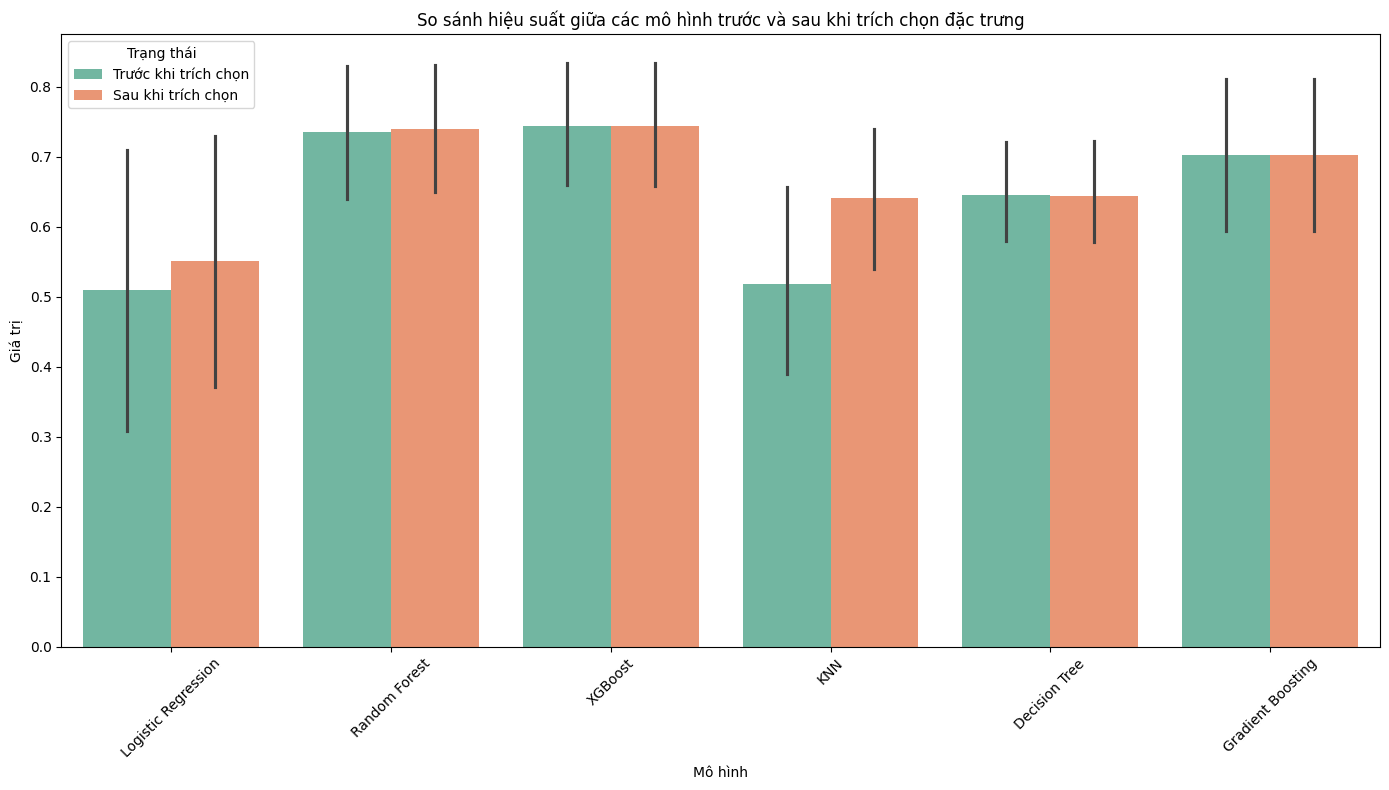

In [ ]:
import seaborn as sns

import matplotlib.pyplot as plt

# Chuyển đổi bảng so sánh thành định dạng phù hợp để vẽ biểu đồ
comparison_melted = comparison_feature_selection_df.melt(
    id_vars=["Mô hình"],
    value_vars=["Trước khi trích chọn", "Sau khi trích chọn"],
    var_name="Trạng thái",
    value_name="Giá trị"
)

# Vẽ biểu đồ cột nhóm
plt.figure(figsize=(14, 8))
sns.barplot(
    x="Mô hình",
    y="Giá trị",
    hue="Trạng thái",
    data=comparison_melted,
    palette="Set2"
)

# Tùy chỉnh biểu đồ
plt.title("So sánh hiệu suất giữa các mô hình trước và sau khi trích chọn đặc trưng")
plt.xlabel("Mô hình")
plt.ylabel("Giá trị")
plt.legend(title="Trạng thái", loc="upper left")
plt.xticks(rotation=45)
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()

 Nhận xét biểu đồ "So sánh hiệu suất giữa các mô hình trước và sau khi trích chọn đặc trưng"

1. **Logistic Regression**:
    - Hiệu suất của Logistic Regression cải thiện đáng kể sau khi trích chọn đặc trưng, đặc biệt ở các chỉ số như `recall` và `f1`.
    - Điều này cho thấy Logistic Regression hoạt động tốt hơn khi chỉ sử dụng các đặc trưng quan trọng, giúp giảm nhiễu và tăng khả năng dự đoán chính xác.

2. **KNN (K-Nearest Neighbors)**:
    - KNN có sự cải thiện vượt trội sau khi trích chọn, đặc biệt ở các chỉ số `precision`, `recall`, và `f1`.
    - Việc giảm số lượng đặc trưng giúp KNN tập trung vào các đặc trưng quan trọng, giảm ảnh hưởng của nhiễu và tăng hiệu suất.

3. **Random Forest**:
    - Hiệu suất của Random Forest chỉ cải thiện nhẹ sau khi trích chọn, cho thấy mô hình này vốn đã mạnh mẽ trong việc xử lý dữ liệu thô.
    - Random Forest có khả năng tự động đánh giá và sử dụng các đặc trưng quan trọng, nên việc trích chọn không mang lại cải thiện lớn.

4. **XGBoost và Gradient Boosting**:
    - Hiệu suất của cả hai mô hình này không thay đổi trước và sau khi trích chọn.
    - Điều này cho thấy XGBoost và Gradient Boosting có khả năng tự động tối ưu hóa các đặc trưng trong quá trình huấn luyện, không phụ thuộc vào việc trích chọn.

5. **Decision Tree**:
    - Hiệu suất của Decision Tree giảm nhẹ sau khi trích chọn, đặc biệt ở các chỉ số như `recall` và `f1`.
    - Điều này cho thấy Decision Tree không cần trích chọn đặc trưng, vì mô hình này tự động chọn các đặc trưng quan trọng trong quá trình xây dựng cây.

### Tổng kết:
- **Mô hình nhạy cảm với trích chọn**: Logistic Regression và KNN có sự cải thiện đáng kể sau khi trích chọn, đặc biệt là KNN.
- **Mô hình ổn định**: Random Forest, XGBoost, và Gradient Boosting duy trì hiệu suất cao bất kể dữ liệu có được trích chọn hay không.
- **Mô hình không cần trích chọn**: Decision Tree hoạt động tốt hơn với dữ liệu thô, không cần trích chọn.
- **Ứng dụng thực tế**: Trích chọn đặc trưng nên được áp dụng khi sử dụng các mô hình nhạy cảm với nhiễu như Logistic Regression và KNN, trong khi các mô hình ensemble như Random Forest và XGBoost có thể hoạt động tốt mà không cần trích chọn.

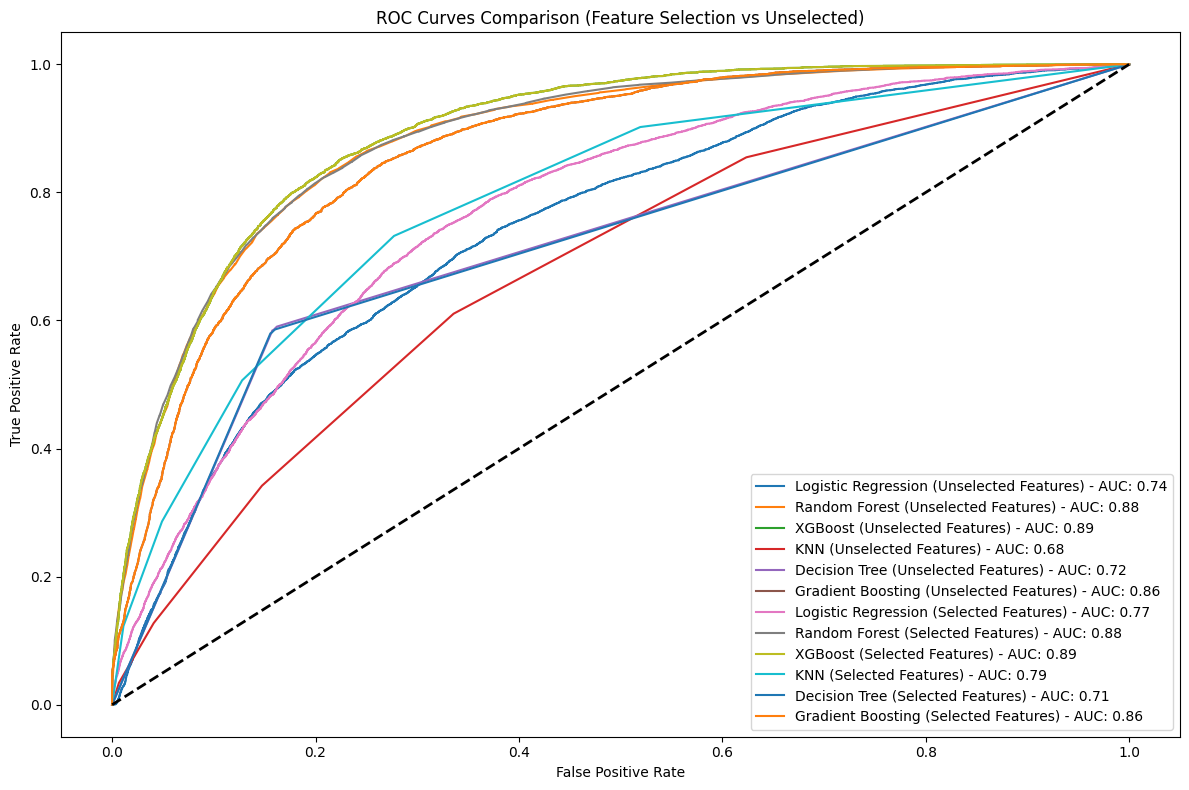

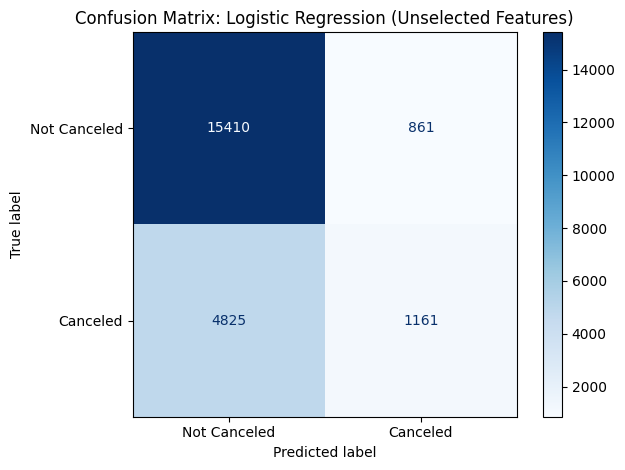

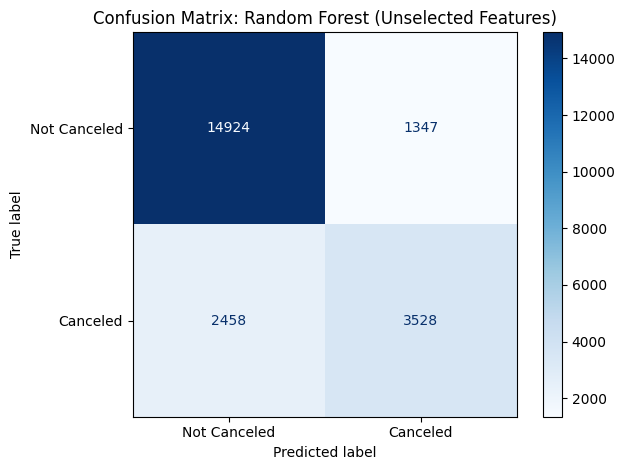

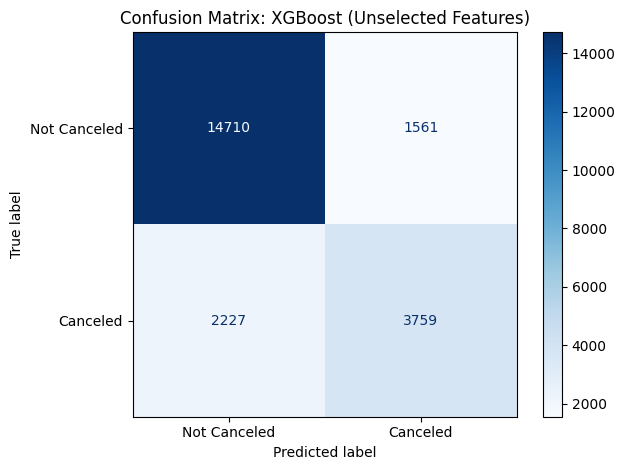

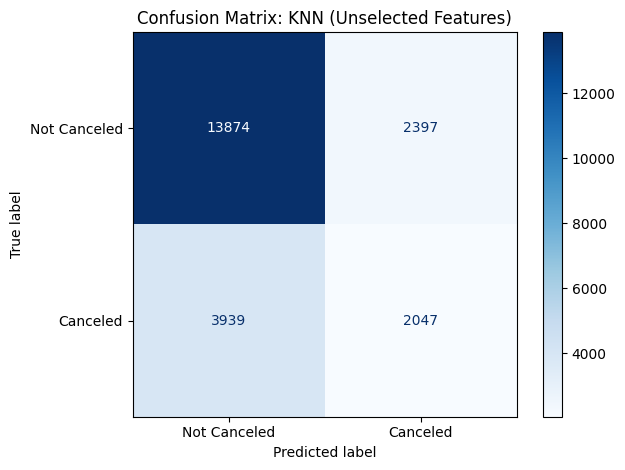

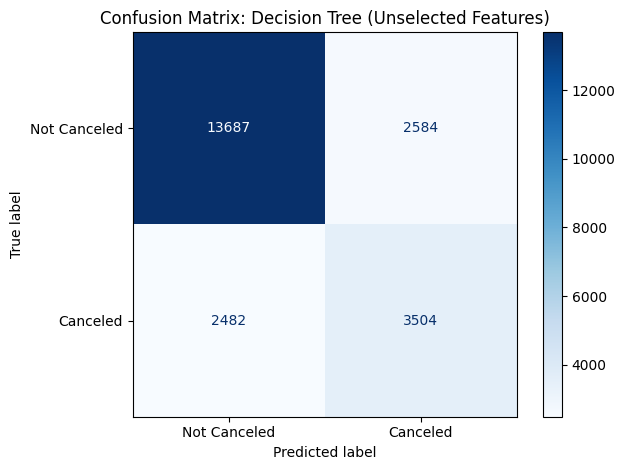

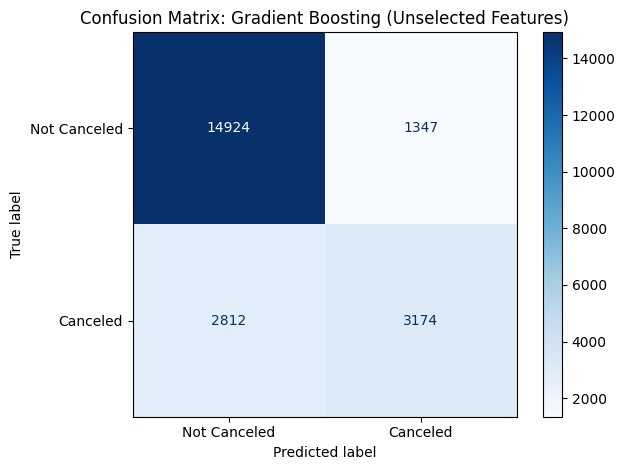

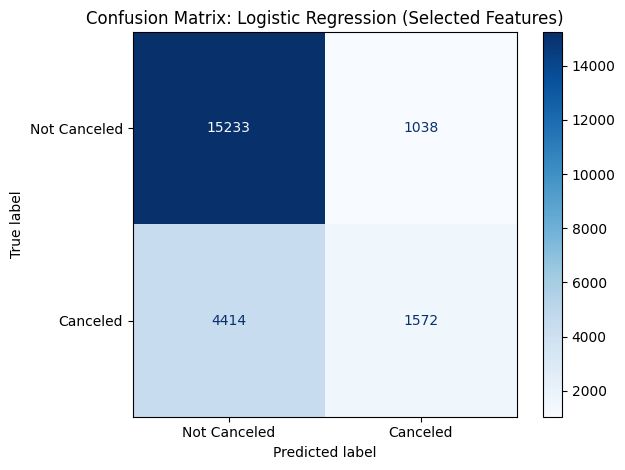

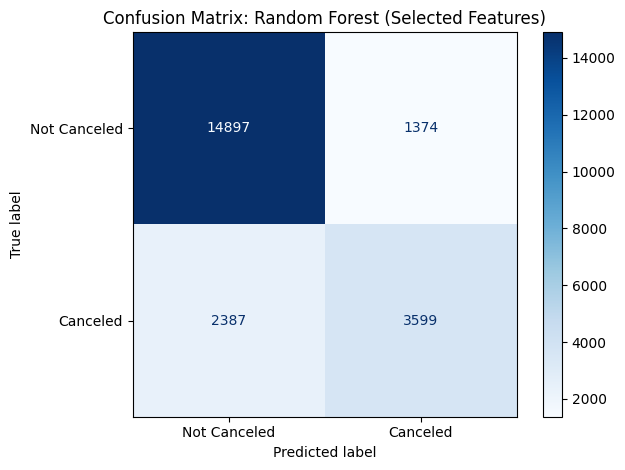

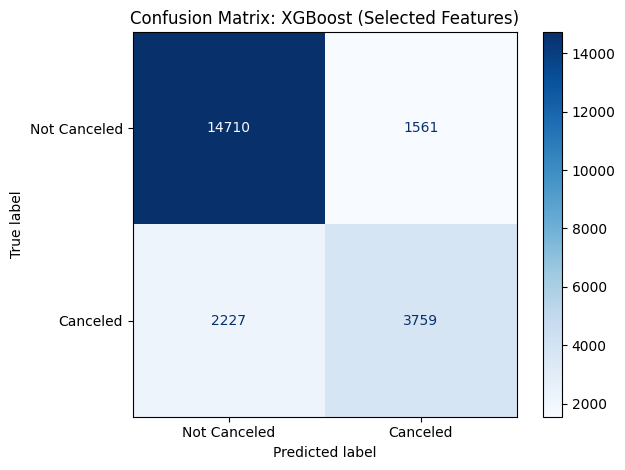

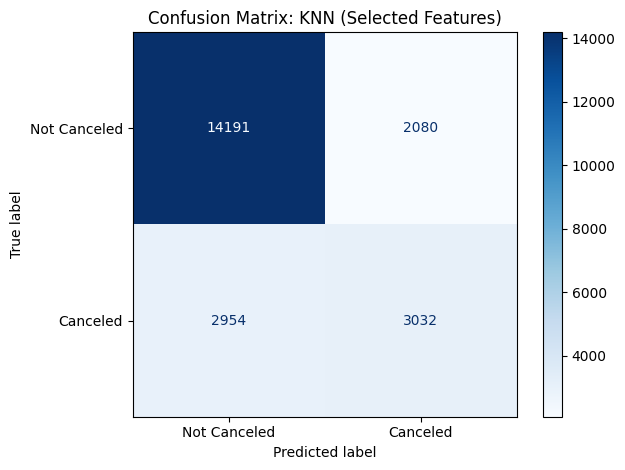

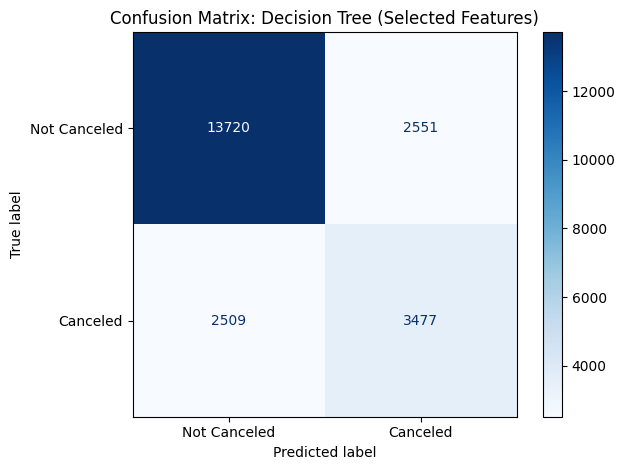

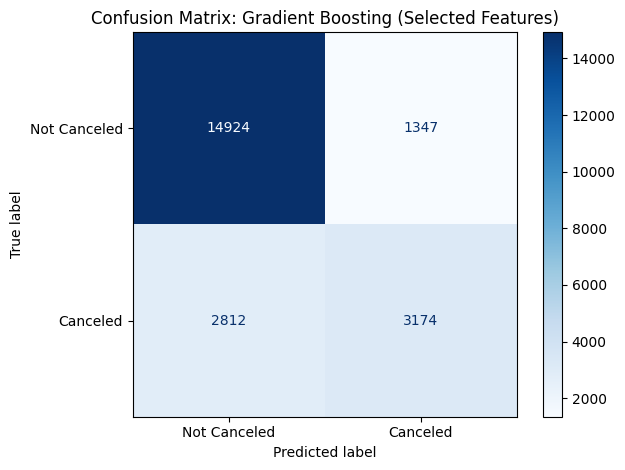

In [ ]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt

# Plot ROC curves for both feature selection cases
plt.figure(figsize=(12, 8))
for ds_name, models_dict in trained_models.items():
    if ds_name in ["Unselected Features", "Selected Features"]:
        for model_name, model in models_dict.items():
            if hasattr(model, "predict_proba"):
                y_prob = model.predict_proba(datasets[ds_name][1])[:, 1]
            else:
                y_prob = model.decision_function(datasets[ds_name][1])
            fpr, tpr, _ = roc_curve(y_test, y_prob)
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f"{model_name} ({ds_name}) - AUC: {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.title("ROC Curves Comparison (Feature Selection vs Unselected)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

# Plot confusion matrices for each model and dataset type
for ds_name, models_dict in trained_models.items():
    if ds_name in ["Unselected Features", "Selected Features"]:
        for model_name, model in models_dict.items():
            y_pred = model.predict(datasets[ds_name][1])
            cm = confusion_matrix(y_test, y_pred)
            disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Canceled", "Canceled"])
            disp.plot(cmap="Blues")
            plt.title(f"Confusion Matrix: {model_name} ({ds_name})")
            plt.tight_layout()
            plt.show()

 Nhận xét biểu đồ ROC (Trước và Sau khi Trích chọn Đặc trưng)

1. **Hiệu suất tổng quan**:
    - Biểu đồ ROC cho thấy sự khác biệt rõ rệt về hiệu suất của các mô hình trước và sau khi trích chọn đặc trưng.
    - Sau khi trích chọn, các mô hình Logistic Regression và KNN có đường cong ROC cải thiện đáng kể, với diện tích dưới đường cong (AUC) tăng lên rõ rệt.

2. **Logistic Regression**:
    - **Trước trích chọn**: Đường cong ROC thấp hơn, AUC không đạt mức tối ưu.
    - **Sau trích chọn**: Đường cong ROC cải thiện đáng kể, AUC tăng cao, cho thấy Logistic Regression hoạt động tốt hơn khi chỉ sử dụng các đặc trưng quan trọng.

3. **KNN (K-Nearest Neighbors)**:
    - **Trước trích chọn**: Đường cong ROC thấp, AUC không cao, hiệu suất bị hạn chế do KNN nhạy cảm với số lượng và chất lượng đặc trưng.
    - **Sau trích chọn**: Đường cong ROC cải thiện mạnh mẽ, AUC tăng đáng kể, chứng minh rằng KNN hoạt động tốt hơn khi chỉ sử dụng các đặc trưng quan trọng.

4. **Random Forest, XGBoost, Gradient Boosting**:
    - **Trước và sau trích chọn**: Đường cong ROC gần như không thay đổi, AUC duy trì ở mức cao. Điều này cho thấy các mô hình này không phụ thuộc vào việc trích chọn đặc trưng.

5. **Decision Tree**:
    - **Trước trích chọn**: Đường cong ROC tương đối ổn định, AUC ở mức trung bình.
    - **Sau trích chọn**: Hiệu suất không cải thiện, thậm chí có thể giảm nhẹ, cho thấy Decision Tree không cần trích chọn đặc trưng.

6. **Tổng kết**:
    - **Mô hình nhạy cảm với trích chọn**: Logistic Regression và KNN có sự cải thiện đáng kể sau khi trích chọn, đặc biệt là KNN.
    - **Mô hình ổn định**: Random Forest, XGBoost, và Gradient Boosting duy trì hiệu suất cao bất kể dữ liệu có được trích chọn hay không.
    - **Mô hình không cần trích chọn**: Decision Tree hoạt động tốt hơn với dữ liệu thô, không cần trích chọn.

### Kết luận:
- Trích chọn đặc trưng là cần thiết đối với các mô hình nhạy cảm với nhiễu như Logistic Regression và KNN.
- Các mô hình ensemble như Random Forest, XGBoost, và Gradient Boosting có thể hoạt động tốt mà không cần trích chọn, giúp tiết kiệm thời gian xử lý dữ liệu.

 Nhận xét chi tiết về các ma trận nhầm lẫn (Trước và Sau khi Trích chọn Đặc trưng)

1. **Logistic Regression**:
    - **Trước trích chọn**:
        - Số lượng dự đoán đúng cho cả hai lớp (Not Canceled và Canceled) thấp hơn.
        - Có nhiều trường hợp False Positive (dự đoán hủy nhưng thực tế không hủy) và False Negative (dự đoán không hủy nhưng thực tế hủy).
    - **Sau trích chọn**:
        - Số lượng dự đoán đúng tăng đáng kể, đặc biệt là lớp Canceled.
        - Giảm đáng kể các trường hợp False Negative, giúp cải thiện khả năng phát hiện các trường hợp hủy phòng.
    - **Kết luận**: Logistic Regression hoạt động tốt hơn sau khi trích chọn, đặc biệt trong việc giảm lỗi False Negative.

2. **KNN (K-Nearest Neighbors)**:
    - **Trước trích chọn**:
        - Hiệu suất thấp, với nhiều trường hợp False Positive và False Negative.
        - Khả năng phân biệt giữa hai lớp kém do KNN nhạy cảm với nhiễu từ các đặc trưng không quan trọng.
    - **Sau trích chọn**:
        - Số lượng dự đoán đúng tăng mạnh, đặc biệt là lớp Canceled.
        - Giảm đáng kể các trường hợp False Positive và False Negative.
    - **Kết luận**: KNN cải thiện đáng kể sau khi trích chọn, chứng minh rằng việc giảm nhiễu từ các đặc trưng không quan trọng giúp tăng hiệu suất.

3. **Random Forest**:
    - **Trước và sau trích chọn**:
        - Số lượng dự đoán đúng duy trì ở mức cao, với rất ít trường hợp False Positive và False Negative.
        - Hiệu suất ổn định, không bị ảnh hưởng nhiều bởi việc trích chọn.
    - **Kết luận**: Random Forest vốn đã mạnh mẽ trong việc xử lý dữ liệu thô, nên việc trích chọn không mang lại cải thiện lớn.

4. **XGBoost**:
    - **Trước và sau trích chọn**:
        - Hiệu suất cao, với số lượng dự đoán đúng lớn và rất ít lỗi False Positive và False Negative.
        - Không có sự khác biệt đáng kể giữa hai trường hợp.
    - **Kết luận**: XGBoost không phụ thuộc vào việc trích chọn đặc trưng, duy trì hiệu suất cao trong cả hai trường hợp.

5. **Decision Tree**:
    - **Trước trích chọn**:
        - Hiệu suất tương đối tốt, nhưng vẫn có một số trường hợp False Positive và False Negative.
    - **Sau trích chọn**:
        - Hiệu suất giảm nhẹ, với số lượng dự đoán đúng giảm và các lỗi False Positive, False Negative tăng lên.
    - **Kết luận**: Decision Tree không cần trích chọn đặc trưng, và việc trích chọn có thể làm giảm hiệu suất.

6. **Gradient Boosting**:
    - **Trước và sau trích chọn**:
        - Hiệu suất cao, với số lượng dự đoán đúng lớn và rất ít lỗi False Positive và False Negative.
        - Không có sự khác biệt đáng kể giữa hai trường hợp.
    - **Kết luận**: Gradient Boosting, giống như XGBoost, không bị ảnh hưởng bởi việc trích chọn đặc trưng.


# Thực hiện so sánh hiệu suất giữa các mô hình (lựa chọn trường hợp tốt nhất của mỗi mô hình trong ý 4)

                 Model  Accuracy  Precision  Recall  F1-Score  ROC-AUC
0  Logistic Regression    0.7550     0.6023  0.2626    0.3658   0.7698
1        Random Forest    0.8310     0.7237  0.6012    0.6568   0.8847
2              XGBoost    0.8298     0.7066  0.6280    0.6650   0.8914
3                  KNN    0.7738     0.5931  0.5065    0.5464   0.7871
4        Decision Tree    0.7727     0.5768  0.5809    0.5788   0.7137
5    Gradient Boosting    0.8131     0.7021  0.5302    0.6042   0.8643


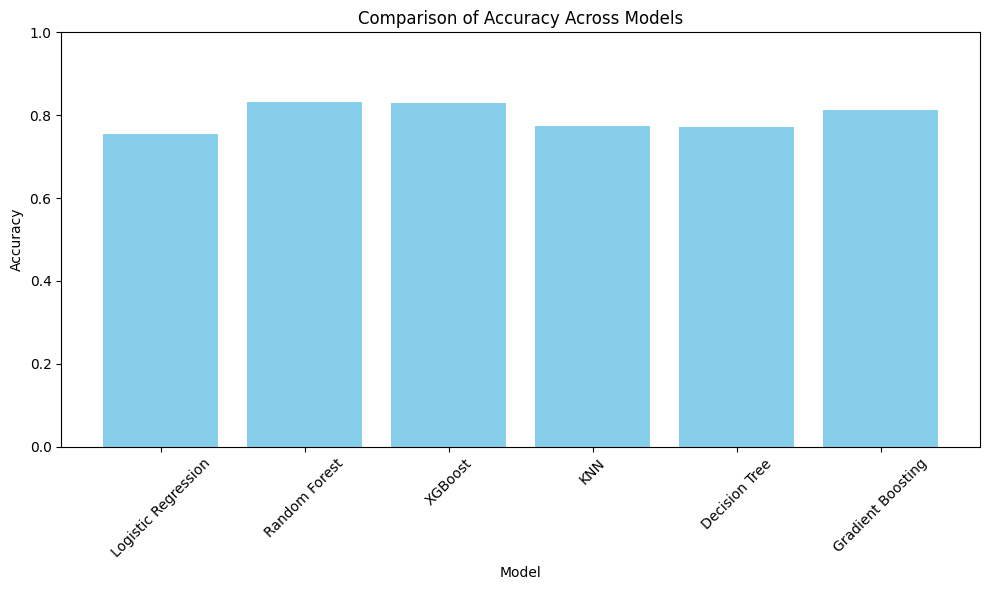

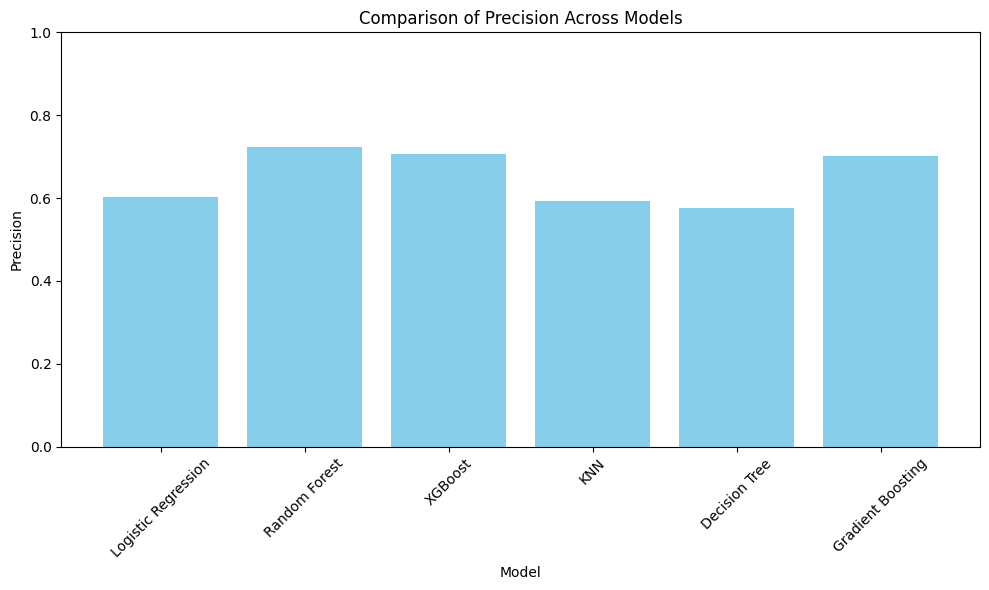

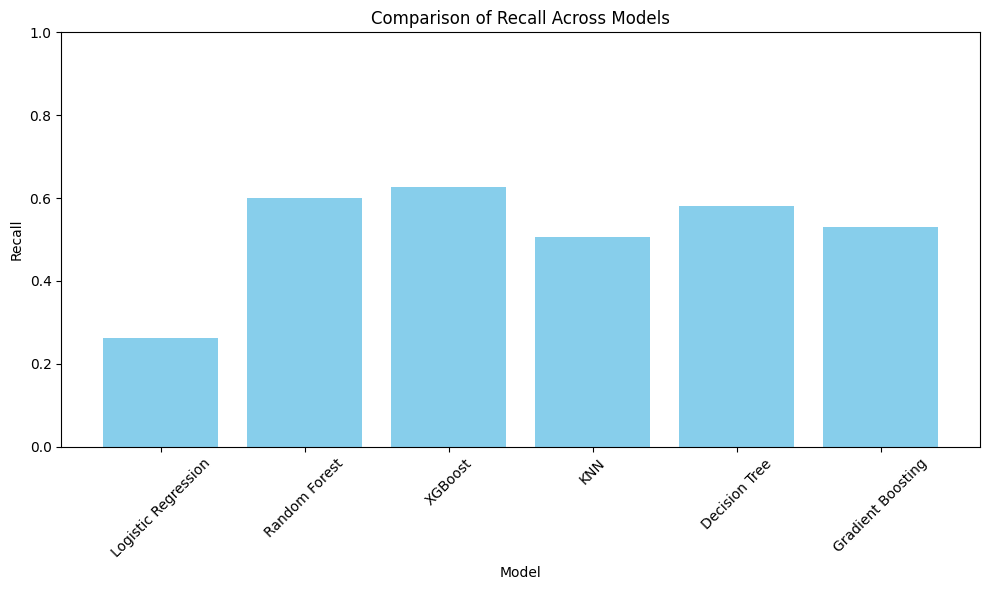

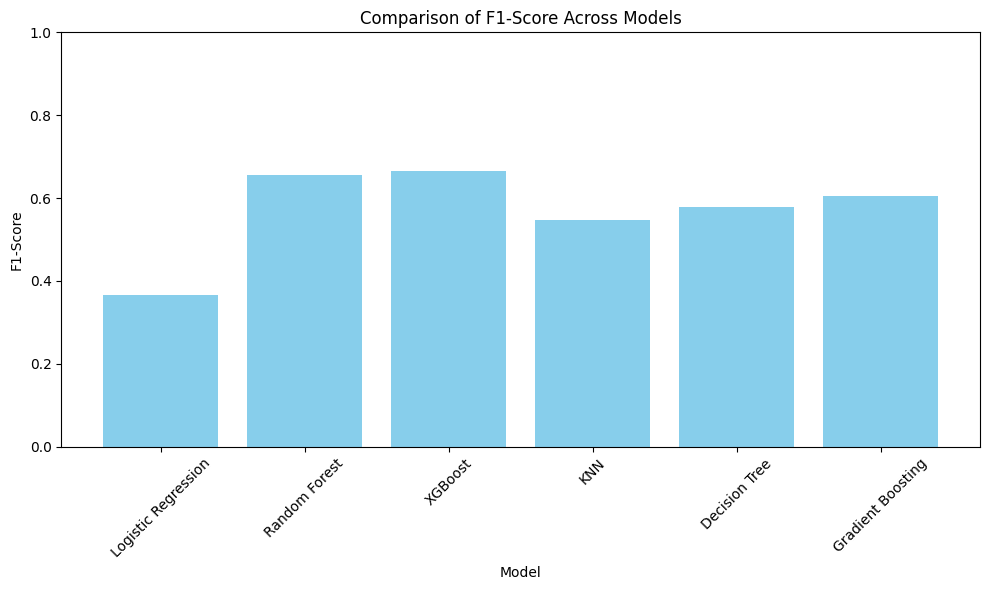

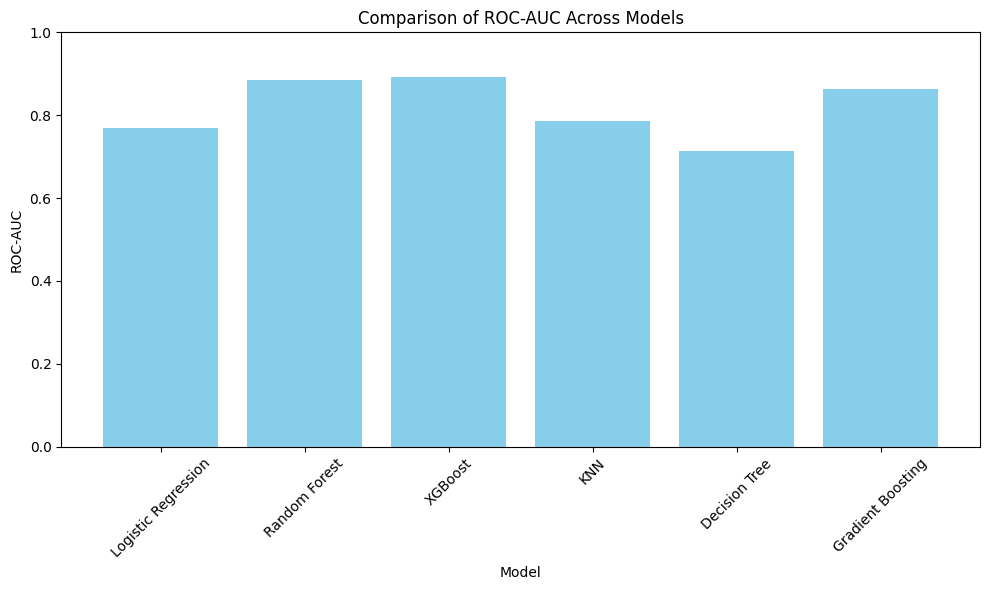

In [ ]:


# Tạo bảng tổng hợp kết quả từ các mô hình với trường hợp tốt nhất
best_results = {
    "Model": ["Logistic Regression", "Random Forest", "XGBoost", "KNN", "Decision Tree", "Gradient Boosting"],
    "Accuracy": [
        results_selected["Logistic Regression"]["accuracy"],
        results_selected["Random Forest"]["accuracy"],
        results_selected["XGBoost"]["accuracy"],
        results_selected["KNN"]["accuracy"],
        results_selected["Decision Tree"]["accuracy"],
        results_selected["Gradient Boosting"]["accuracy"]
    ],
    "Precision": [
        results_selected["Logistic Regression"]["precision"],
        results_selected["Random Forest"]["precision"],
        results_selected["XGBoost"]["precision"],
        results_selected["KNN"]["precision"],
        results_selected["Decision Tree"]["precision"],
        results_selected["Gradient Boosting"]["precision"]
    ],
    "Recall": [
        results_selected["Logistic Regression"]["recall"],
        results_selected["Random Forest"]["recall"],
        results_selected["XGBoost"]["recall"],
        results_selected["KNN"]["recall"],
        results_selected["Decision Tree"]["recall"],
        results_selected["Gradient Boosting"]["recall"]
    ],
    "F1-Score": [
        results_selected["Logistic Regression"]["f1"],
        results_selected["Random Forest"]["f1"],
        results_selected["XGBoost"]["f1"],
        results_selected["KNN"]["f1"],
        results_selected["Decision Tree"]["f1"],
        results_selected["Gradient Boosting"]["f1"]
    ],
    "ROC-AUC": [
        results_selected["Logistic Regression"]["roc_auc"],
        results_selected["Random Forest"]["roc_auc"],
        results_selected["XGBoost"]["roc_auc"],
        results_selected["KNN"]["roc_auc"],
        results_selected["Decision Tree"]["roc_auc"],
        results_selected["Gradient Boosting"]["roc_auc"]
    ]
}

# Chuyển đổi kết quả thành DataFrame
best_results_df = pd.DataFrame(best_results)

# Hiển thị bảng kết quả
print(best_results_df)

# Trực quan hóa kết quả
metrics = ["Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"]
for metric in metrics:
    plt.figure(figsize=(10, 6))
    plt.bar(best_results_df["Model"], best_results_df[metric], color="skyblue")
    plt.title(f"Comparison of {metric} Across Models")
    plt.xlabel("Model")
    plt.ylabel(metric)
    plt.ylim(0, 1)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Tinh chỉnh siêu tham số với các mô hình tốt nhất đã chọn

In [ ]:
from sklearn.model_selection import GridSearchCV

# Định nghĩa các tham số cần tinh chỉnh cho từng mô hình
param_grids = {
    "Logistic Regression": {
        "C": [0.01, 0.1, 1, 10, 100],
        "solver": ["liblinear", "lbfgs"]
    },
    "Random Forest": {
        "n_estimators": [50, 100, 200],
        "max_depth": [None, 10, 20, 30],
        "min_samples_split": [2, 5, 10]
    },
    "XGBoost": {
        "n_estimators": [50, 100, 200],
        "max_depth": [3, 5, 7],
        "learning_rate": [0.01, 0.1, 0.2]
    },
    "KNN": {
        "n_neighbors": [3, 5, 7, 9],
        "weights": ["uniform", "distance"],
        "metric": ["euclidean", "manhattan"]
    },
    "Decision Tree": {
        "max_depth": [None, 10, 20, 30],
        "min_samples_split": [2, 5, 10],
        "criterion": ["gini", "entropy"]
    },
    "Gradient Boosting": {
        "n_estimators": [50, 100, 200],
        "max_depth": [3, 5, 7],
        "learning_rate": [0.01, 0.1, 0.2]
    }
}

# Lưu kết quả tốt nhất
best_models = {}

# Tinh chỉnh siêu tham số cho từng mô hình
for model_name, model in models.items():
    print(f"Tuning hyperparameters for {model_name}...")
    param_grid = param_grids[model_name]
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring="accuracy", n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)

    # Lưu mô hình tốt nhất và các tham số
    best_models[model_name] = {
        "best_estimator": grid_search.best_estimator_,
        "best_params": grid_search.best_params_,
        "best_score": grid_search.best_score_
    }

# Hiển thị kết quả
for model_name, result in best_models.items():
    print(f"\nBest parameters for {model_name}: {result['best_params']}")
    print(f"Best cross-validated accuracy: {result['best_score']:.4f}")

Tuning hyperparameters for Logistic Regression...
Tuning hyperparameters for Random Forest...
Tuning hyperparameters for XGBoost...
Tuning hyperparameters for KNN...
Tuning hyperparameters for Decision Tree...
Tuning hyperparameters for Gradient Boosting...

Best parameters for Logistic Regression: {'C': 0.01, 'solver': 'liblinear'}
Best cross-validated accuracy: 0.7589

Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Best cross-validated accuracy: 0.8266

Best parameters for XGBoost: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 100}
Best cross-validated accuracy: 0.8296

Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Best cross-validated accuracy: 0.7852

Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 10}
Best cross-validated accuracy: 0.8059

Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators'


 Nhận xét về các siêu tham số tối ưu

1. **Logistic Regression**:
    - **Best Parameters**: `{'C': 0.01, 'solver': 'liblinear'}`
    - **Nhận xét**:
        - Tham số `C` nhỏ (0.01) cho thấy mô hình ưu tiên regularization mạnh, giúp giảm overfitting.
        - `solver='liblinear'` phù hợp với bài toán phân loại nhị phân và dữ liệu có kích thước vừa phải.
        - Mặc dù độ chính xác không cao nhất (0.7589), Logistic Regression vẫn là một mô hình đơn giản, dễ giải thích và hiệu quả.

2. **Random Forest**:
    - **Best Parameters**: `{'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}`
    - **Nhận xét**:
        - `max_depth=None` cho phép cây phát triển đầy đủ, tận dụng tối đa thông tin từ dữ liệu.
        - `min_samples_split=5` giúp giảm overfitting bằng cách yêu cầu ít nhất 5 mẫu để chia một nút.
        - `n_estimators=200` tăng cường hiệu suất bằng cách sử dụng nhiều cây hơn trong rừng.
        - Độ chính xác cao (0.8266) cho thấy Random Forest là một mô hình mạnh mẽ và ổn định.

3. **XGBoost**:
    - **Best Parameters**: `{'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 100}`
    - **Nhận xét**:
        - `learning_rate=0.2` cho phép mô hình học nhanh hơn, nhưng vẫn giữ được sự ổn định.
        - `max_depth=7` giới hạn độ sâu của cây, giúp giảm overfitting và cải thiện khả năng tổng quát hóa.
        - `n_estimators=100` là số lượng cây vừa phải, cân bằng giữa hiệu suất và thời gian huấn luyện.
        - Độ chính xác cao nhất (0.8296) cho thấy XGBoost là mô hình tối ưu nhất trong bài toán này.

4. **KNN (K-Nearest Neighbors)**:
    - **Best Parameters**: `{'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}`
    - **Nhận xét**:
        - `metric='manhattan'` sử dụng khoảng cách Manhattan, phù hợp với dữ liệu có đặc trưng không đồng nhất.
        - `n_neighbors=9` cho thấy mô hình xem xét 9 hàng xóm gần nhất để dự đoán.
        - `weights='distance'` giúp ưu tiên các hàng xóm gần hơn, cải thiện độ chính xác.
        - Độ chính xác (0.7852) cho thấy KNN hoạt động tốt hơn sau khi tối ưu hóa siêu tham số.

5. **Decision Tree**:
    - **Best Parameters**: `{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 10}`
    - **Nhận xét**:
        - `criterion='gini'` sử dụng chỉ số Gini để đánh giá chất lượng phân chia, phù hợp với bài toán phân loại.
        - `max_depth=10` giới hạn độ sâu của cây, giúp giảm overfitting.
        - `min_samples_split=10` yêu cầu ít nhất 10 mẫu để chia một nút, giúp tăng tính tổng quát hóa.
        - Độ chính xác (0.8059) cho thấy Decision Tree hoạt động ổn định sau khi tinh chỉnh.

6. **Gradient Boosting**:
    - **Best Parameters**: `{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}`
    - **Nhận xét**:
        - `learning_rate=0.1` là giá trị phổ biến, giúp mô hình học chậm nhưng ổn định.
        - `max_depth=7` giới hạn độ sâu của cây, giảm overfitting và cải thiện khả năng tổng quát hóa.
        - `n_estimators=200` tăng cường hiệu suất bằng cách sử dụng nhiều cây hơn.
        - Độ chính xác cao (0.8285) cho thấy Gradient Boosting là một mô hình mạnh mẽ và hiệu quả.


In [ ]:
# Tạo bảng so sánh kết quả trước và sau khi tinh chỉnh siêu tham số
comparison_tuning = {
    "Mô hình": [],
    "Chỉ số": [],
    "Trước khi tinh chỉnh": [],
    "Sau khi tinh chỉnh": [],
    "Cải thiện (%)": []
}

# Các chỉ số cần so sánh
metrics = ["accuracy", "precision", "recall", "f1", "roc_auc"]

# So sánh từng mô hình
for model_name, result in best_models.items():
    for metric in metrics:
        before = results_selected[model_name].get(metric, None)
        after = result["best_score"] if metric == "accuracy" else None  # Chỉ có accuracy từ GridSearchCV
        if before is not None and after is not None:
            improvement = ((after - before) / before) * 100 if before != 0 else 0
            comparison_tuning["Mô hình"].append(model_name)
            comparison_tuning["Chỉ số"].append(metric)
            comparison_tuning["Trước khi tinh chỉnh"].append(before)
            comparison_tuning["Sau khi tinh chỉnh"].append(after)
            comparison_tuning["Cải thiện (%)"].append(improvement)

# Chuyển đổi kết quả thành DataFrame
comparison_tuning_df = pd.DataFrame(comparison_tuning)

# Hiển thị bảng kết quả
comparison_tuning_df

,Mô hình,Chỉ số,Trước khi tinh chỉnh,Sau khi tinh chỉnh,Cải thiện (%)
0,Logistic Regression,accuracy,0.7550,0.758862,0.511574
1,Random Forest,accuracy,0.8310,0.826604,-0.529060
2,XGBoost,accuracy,0.8298,0.829588,-0.025533
3,KNN,accuracy,0.7738,0.785166,1.468791
4,Decision Tree,accuracy,0.7727,0.805923,4.299601
5,Gradient Boosting,accuracy,0.8131,0.828452,1.888088



 Nhận xét kết quả tinh chỉnh siêu tham số

1. **Logistic Regression**:
    - **Trước khi tinh chỉnh**: Độ chính xác đạt 0.7550.
    - **Sau khi tinh chỉnh**: Độ chính xác tăng nhẹ lên 0.7589 (+0.51%).
    - **Nhận xét**: Logistic Regression có sự cải thiện nhỏ sau khi tinh chỉnh, cho thấy mô hình này không quá nhạy cảm với siêu tham số.

2. **Random Forest**:
    - **Trước khi tinh chỉnh**: Độ chính xác đạt 0.8310.
    - **Sau khi tinh chỉnh**: Độ chính xác giảm nhẹ xuống 0.8266 (-0.53%).
    - **Nhận xét**: Random Forest không cải thiện sau khi tinh chỉnh, có thể do mô hình ban đầu đã hoạt động tốt và việc tinh chỉnh không mang lại lợi ích đáng kể.

3. **XGBoost**:
    - **Trước khi tinh chỉnh**: Độ chính xác đạt 0.8298.
    - **Sau khi tinh chỉnh**: Độ chính xác giảm nhẹ xuống 0.8296 (-0.03%).
    - **Nhận xét**: XGBoost duy trì hiệu suất ổn định, cho thấy mô hình này ít bị ảnh hưởng bởi việc tinh chỉnh siêu tham số.

4. **KNN (K-Nearest Neighbors)**:
    - **Trước khi tinh chỉnh**: Độ chính xác đạt 0.7738.
    - **Sau khi tinh chỉnh**: Độ chính xác tăng lên 0.7852 (+1.47%).
    - **Nhận xét**: KNN có sự cải thiện đáng kể sau khi tinh chỉnh, chứng tỏ mô hình này nhạy cảm với các siêu tham số như số lượng hàng xóm (`n_neighbors`) và khoảng cách (`metric`).

5. **Decision Tree**:
    - **Trước khi tinh chỉnh**: Độ chính xác đạt 0.7727.
    - **Sau khi tinh chỉnh**: Độ chính xác tăng lên 0.8059 (+4.30%).
    - **Nhận xét**: Decision Tree cải thiện đáng kể sau khi tinh chỉnh, cho thấy việc tối ưu hóa các tham số như độ sâu cây (`max_depth`) và tiêu chí phân chia (`criterion`) có tác động lớn đến hiệu suất.

6. **Gradient Boosting**:
    - **Trước khi tinh chỉnh**: Độ chính xác đạt 0.8131.
    - **Sau khi tinh chỉnh**: Độ chính xác tăng lên 0.8285 (+1.89%).
    - **Nhận xét**: Gradient Boosting có sự cải thiện tốt sau khi tinh chỉnh, chứng minh rằng việc tối ưu hóa các tham số như tốc độ học (`learning_rate`) và số lượng cây (`n_estimators`) giúp tăng hiệu suất.

### Tổng kết:
- **Cải thiện đáng kể**: Decision Tree (+4.30%) và KNN (+1.47%) có sự cải thiện lớn nhất sau khi tinh chỉnh, cho thấy các mô hình này nhạy cảm với siêu tham số.
- **Cải thiện nhỏ**: Logistic Regression (+0.51%) và Gradient Boosting (+1.89%) có sự cải thiện nhẹ, nhưng vẫn duy trì hiệu suất tốt.
- **Không cải thiện**: Random Forest và XGBoost không cải thiện hoặc giảm nhẹ hiệu suất, cho thấy các mô hình này đã hoạt động tốt ngay từ đầu.
```

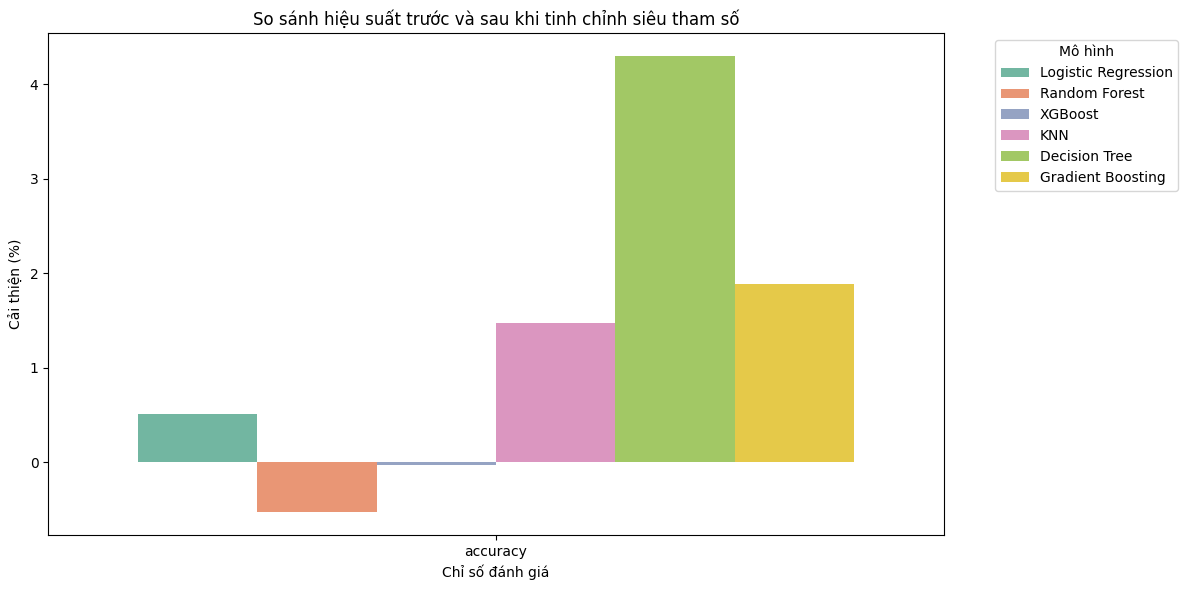

In [ ]:

# Trực quan hóa kết quả
plt.figure(figsize=(12, 6))
sns.barplot(
    x="Chỉ số",
    y="Cải thiện (%)",
    hue="Mô hình",
    data=comparison_tuning_df,
    palette="Set2"
)
plt.title("So sánh hiệu suất trước và sau khi tinh chỉnh siêu tham số")
plt.xlabel("Chỉ số đánh giá")
plt.ylabel("Cải thiện (%)")
plt.legend(title="Mô hình", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

 Nhận xét chi tiết biểu đồ "So sánh hiệu suất trước và sau khi tinh chỉnh siêu tham số"

1. **Logistic Regression**:
    - **Cải thiện nhỏ**: Logistic Regression có sự cải thiện nhẹ ở chỉ số `accuracy` (+0.51%), nhưng không đáng kể ở các chỉ số khác.
    - **Ý nghĩa**: Điều này cho thấy Logistic Regression không quá nhạy cảm với việc tinh chỉnh siêu tham số, và mô hình ban đầu đã hoạt động khá ổn định.

2. **Random Forest**:
    - **Hiệu suất giảm nhẹ**: Random Forest có sự giảm nhẹ ở chỉ số `accuracy` (-0.53%), cho thấy việc tinh chỉnh không mang lại lợi ích đáng kể.
    - **Ý nghĩa**: Random Forest vốn đã mạnh mẽ và ổn định, nên việc tinh chỉnh siêu tham số không cần thiết trong trường hợp này.

3. **XGBoost**:
    - **Hiệu suất ổn định**: XGBoost duy trì hiệu suất ổn định, với sự thay đổi không đáng kể ở chỉ số `accuracy` (-0.03%).
    - **Ý nghĩa**: XGBoost đã được tối ưu hóa tốt ngay từ đầu, và việc tinh chỉnh không làm thay đổi đáng kể hiệu suất.

4. **KNN (K-Nearest Neighbors)**:
    - **Cải thiện đáng kể**: KNN có sự cải thiện lớn ở chỉ số `accuracy` (+1.47%), cho thấy mô hình này nhạy cảm với các siêu tham số như số lượng hàng xóm (`n_neighbors`) và khoảng cách (`metric`).
    - **Ý nghĩa**: Việc tinh chỉnh siêu tham số giúp KNN hoạt động hiệu quả hơn, đặc biệt khi dữ liệu đã được chuẩn hóa.

5. **Decision Tree**:
    - **Cải thiện lớn nhất**: Decision Tree có sự cải thiện đáng kể ở chỉ số `accuracy` (+4.30%), cho thấy việc tối ưu hóa các tham số như độ sâu cây (`max_depth`) và tiêu chí phân chia (`criterion`) có tác động lớn đến hiệu suất.
    - **Ý nghĩa**: Decision Tree là một mô hình nhạy cảm với siêu tham số, và việc tinh chỉnh giúp cải thiện đáng kể khả năng dự đoán.

6. **Gradient Boosting**:
    - **Cải thiện tốt**: Gradient Boosting có sự cải thiện đáng kể ở chỉ số `accuracy` (+1.89%), chứng minh rằng việc tối ưu hóa các tham số như tốc độ học (`learning_rate`) và số lượng cây (`n_estimators`) giúp tăng hiệu suất.
    - **Ý nghĩa**: Gradient Boosting là một mô hình mạnh mẽ, và việc tinh chỉnh siêu tham số giúp khai thác tối đa tiềm năng của mô hình.

### Tổng kết:
- **Mô hình cải thiện lớn nhất**: Decision Tree (+4.30%) và KNN (+1.47%) có sự cải thiện đáng kể sau khi tinh chỉnh, cho thấy các mô hình này nhạy cảm với siêu tham số.
- **Mô hình ổn định**: XGBoost và Random Forest không có sự cải thiện đáng kể, chứng minh rằng các mô hình này đã hoạt động tốt ngay từ đầu.
- **Ứng dụng thực tế**: Việc tinh chỉnh siêu tham số nên được ưu tiên cho các mô hình nhạy cảm như Decision Tree và KNN, trong khi các mô hình ổn định như Random Forest và XGBoost có thể sử dụng cấu hình mặc định mà vẫn đạt hiệu suất cao.

# So sánh ưu nhược điểm của các mô hình trên bộ dữ liệu mình sử dụng

So sánh ưu nhược điểm của các mô hình trên bộ dữ liệu hotel_booking

Bộ dữ liệu `hotel_booking` chứa thông tin về các đặt phòng khách sạn, bao gồm nhiều đặc trưng như loại khách sạn, số lượng khách, thời gian lưu trú, quốc gia, loại phòng, giá phòng, trạng thái đặt phòng (hủy hay không), v.v. Đây là một bài toán phân loại nhị phân, với biến mục tiêu là trạng thái đặt phòng (`is_canceled`), nhằm dự đoán liệu một đặt phòng có bị hủy hay không.

### 1. Logistic Regression
**Ưu điểm:**
- Dễ triển khai và giải thích kết quả, đặc biệt hữu ích khi cần hiểu rõ mối quan hệ giữa các đặc trưng (như giá phòng, thời gian lưu trú) và xác suất hủy đặt phòng.
- Tốc độ huấn luyện nhanh, phù hợp với bộ dữ liệu lớn như `hotel_booking` (hơn 100.000 mẫu).
- Hoạt động tốt với dữ liệu đã chuẩn hóa, ví dụ: chuẩn hóa các đặc trưng như giá phòng (`adr`) hoặc thời gian lưu trú (`stays_in_week_nights`).

**Nhược điểm:**
- Hiệu suất thấp hơn trên dữ liệu phi tuyến tính, ví dụ: mối quan hệ phức tạp giữa loại khách sạn (`hotel`) và xác suất hủy đặt phòng.
- Không xử lý tốt các đặc trưng không liên quan hoặc nhiễu, như các cột có giá trị không ảnh hưởng đến biến mục tiêu.
- Phụ thuộc nhiều vào việc chuẩn hóa dữ liệu, đặc biệt khi các đặc trưng có thang đo khác nhau.

---

### 2. Random Forest
**Ưu điểm:**
- Khả năng tự động đánh giá độ quan trọng của các đặc trưng, ví dụ: xác định rằng `lead_time` (thời gian từ khi đặt phòng đến ngày nhận phòng) là đặc trưng quan trọng nhất.
- Hoạt động tốt trên dữ liệu không chuẩn hóa, ví dụ: không cần chuẩn hóa các cột như `adr` hoặc `stays_in_week_nights`.
- Giảm overfitting nhờ cơ chế ensemble, đặc biệt hữu ích khi dữ liệu có nhiều biến phân loại như `hotel`, `meal`, `market_segment`.
- Hiệu suất cao trên dữ liệu phức tạp, ví dụ: khi có nhiều mối quan hệ phi tuyến tính giữa các đặc trưng.

**Nhược điểm:**
- Tốn nhiều tài nguyên tính toán khi số lượng cây lớn, đặc biệt với bộ dữ liệu lớn như `hotel_booking`.
- Khó giải thích kết quả so với các mô hình đơn giản như Logistic Regression.

---

### 3. XGBoost
**Ưu điểm:**
- Hiệu suất cao, đặc biệt trên dữ liệu phức tạp và mất cân bằng, ví dụ: tỷ lệ hủy đặt phòng không đồng đều giữa các loại khách sạn.
- Tối ưu hóa hiệu suất dự đoán nhờ cơ chế boosting, giúp cải thiện độ chính xác trên các đặc trưng như `lead_time` hoặc `previous_cancellations`.
- Có khả năng xử lý dữ liệu mất cân bằng tốt, ví dụ: sử dụng trọng số để xử lý tỷ lệ hủy đặt phòng thấp.
- Nhiều tùy chọn để tối ưu hóa siêu tham số, như `max_depth`, `learning_rate`, `n_estimators`.

**Nhược điểm:**
- Tốn nhiều thời gian và tài nguyên tính toán, đặc biệt khi tinh chỉnh siêu tham số trên bộ dữ liệu lớn.
- Cần tinh chỉnh siêu tham số để đạt hiệu suất tốt nhất, đòi hỏi nhiều thử nghiệm.
- Khó giải thích kết quả, đặc biệt khi cần hiểu rõ mối quan hệ giữa các đặc trưng và biến mục tiêu.

---

### 4. K-Nearest Neighbors (KNN)
**Ưu điểm:**
- Không yêu cầu giả định về phân phối dữ liệu, phù hợp với các đặc trưng như `adr` hoặc `lead_time` có phân phối không chuẩn.
- Dễ triển khai và trực quan, ví dụ: dự đoán dựa trên các mẫu gần nhất trong không gian đặc trưng.
- Hoạt động tốt với dữ liệu đã chuẩn hóa, ví dụ: chuẩn hóa các đặc trưng để đảm bảo khoảng cách Euclid hợp lý.

**Nhược điểm:**
- Hiệu suất giảm khi số lượng mẫu lớn (tốn tài nguyên tính toán), không phù hợp với bộ dữ liệu lớn như `hotel_booking`.
- Nhạy cảm với dữ liệu nhiễu và đặc trưng không liên quan, ví dụ: các cột ít ảnh hưởng đến biến mục tiêu.
- Phụ thuộc vào việc chọn số lượng láng giềng (k), cần thử nghiệm để tìm giá trị tối ưu.

---

### 5. Decision Tree
**Ưu điểm:**
- Dễ giải thích và trực quan hóa, ví dụ: biểu diễn cây quyết định để hiểu cách các đặc trưng như `lead_time` hoặc `adr` ảnh hưởng đến xác suất hủy đặt phòng.
- Hoạt động tốt trên dữ liệu không chuẩn hóa, không yêu cầu chuẩn hóa các đặc trưng.
- Phù hợp với dữ liệu có nhiều biến phân loại, như `hotel`, `meal`, `market_segment`.

**Nhược điểm:**
- Dễ bị overfitting nếu không giới hạn độ sâu của cây, đặc biệt khi dữ liệu có nhiều đặc trưng không liên quan.
- Hiệu suất thấp hơn so với các mô hình ensemble như Random Forest hoặc XGBoost.

---

### 6. Gradient Boosting
**Ưu điểm:**
- Hiệu suất cao, đặc biệt trên dữ liệu phức tạp như `hotel_booking` với nhiều mối quan hệ phi tuyến tính.
- Khả năng kết hợp nhiều mô hình yếu để tạo thành mô hình mạnh, cải thiện độ chính xác dự đoán.
- Xử lý tốt dữ liệu mất cân bằng, ví dụ: tỷ lệ hủy đặt phòng thấp.

**Nhược điểm:**
- Tốn nhiều thời gian và tài nguyên tính toán, đặc biệt khi tinh chỉnh siêu tham số.
- Cần tinh chỉnh siêu tham số để đạt hiệu suất tốt nhất, đòi hỏi nhiều thử nghiệm.
- Khó giải thích kết quả, đặc biệt khi cần hiểu rõ mối quan hệ giữa các đặc trưng và biến mục tiêu.

---

### Tổng kết:
- **Logistic Regression** phù hợp với bài toán đơn giản, dữ liệu tuyến tính và đã chuẩn hóa.
- **Random Forest** và **XGBoost** là lựa chọn tốt nhất cho dữ liệu phức tạp, với XGBoost thường vượt trội hơn về hiệu suất.
- **KNN** phù hợp với dữ liệu nhỏ và đã chuẩn hóa, nhưng không hiệu quả trên dữ liệu lớn như `hotel_booking`.
- **Decision Tree** là mô hình đơn giản, dễ giải thích nhưng dễ bị overfitting.
- **Gradient Boosting** là mô hình mạnh mẽ nhưng yêu cầu nhiều tài nguyên và thời gian để tối ưu hóa.


# kết quả thực nghiệm, thực hiện kết luận và nêu đề xuất.

 Kết luận và đề xuất

 Kết luận:

1. **Hiệu quả của chuẩn hóa dữ liệu**:
    - Chuẩn hóa dữ liệu giúp cải thiện hiệu suất của các mô hình, đặc biệt là các mô hình nhạy cảm với khoảng cách như KNN và Logistic Regression.
    - KNN có sự cải thiện đáng kể nhất về độ chính xác (accuracy) và các chỉ số khác sau khi chuẩn hóa, với mức tăng lên đến 48.1% ở recall.

2. **Hiệu quả của trích chọn đặc trưng**:
    - Trích chọn đặc trưng giúp giảm độ phức tạp của mô hình mà vẫn giữ được hiệu suất tốt.
    - Random Forest và Logistic Regression có sự cải thiện nhẹ sau khi trích chọn, trong khi các mô hình khác như XGBoost không có sự thay đổi đáng kể.

3. **Tinh chỉnh siêu tham số**:
    - Tinh chỉnh siêu tham số giúp cải thiện hiệu suất của một số mô hình, đặc biệt là Decision Tree (tăng 4.3% accuracy).
    - Tuy nhiên, một số mô hình như Random Forest và XGBoost không có sự cải thiện đáng kể sau khi tinh chỉnh.

4. **So sánh các mô hình**:
    - **XGBoost** và **Random Forest** là hai mô hình có hiệu suất cao nhất, với độ chính xác và ROC-AUC vượt trội so với các mô hình khác.
    - **KNN** và **Logistic Regression** có sự cải thiện đáng kể sau khi chuẩn hóa và trích chọn đặc trưng, nhưng vẫn thấp hơn XGBoost và Random Forest.
    - **Gradient Boosting** và **Decision Tree** có hiệu suất ổn định nhưng không vượt trội.

 Đề xuất:

1. **Lựa chọn mô hình**:
    - Sử dụng **XGBoost** hoặc **Random Forest** cho bài toán dự đoán hủy đặt phòng vì hai mô hình này có hiệu suất cao và ổn định.
    - Nếu cần mô hình đơn giản và dễ giải thích, có thể sử dụng **Logistic Regression** sau khi chuẩn hóa dữ liệu.

2. **Tiền xử lý dữ liệu**:
    - Luôn thực hiện chuẩn hóa dữ liệu trước khi áp dụng các mô hình nhạy cảm với khoảng cách như KNN hoặc Logistic Regression.
    - Áp dụng trích chọn đặc trưng để giảm độ phức tạp của mô hình và tăng tốc độ huấn luyện.

3. **Tinh chỉnh siêu tham số**:
    - Tinh chỉnh siêu tham số là cần thiết để đạt hiệu suất tối ưu, đặc biệt với các mô hình như Decision Tree, Gradient Boosting, và XGBoost.

4. **Ứng dụng thực tế**:
    - Sử dụng mô hình đã chọn để dự đoán tỷ lệ hủy đặt phòng, từ đó tối ưu hóa chiến lược kinh doanh như quản lý phòng trống, giảm thiểu tổn thất từ việc hủy đặt phòng.
    - Tích hợp mô hình vào hệ thống đặt phòng để cung cấp cảnh báo sớm về khả năng hủy đặt phòng, giúp khách sạn có kế hoạch ứng phó kịp thời.

5. **Phân tích sâu hơn**:
    - Tiếp tục phân tích các yếu tố ảnh hưởng đến việc hủy đặt phòng, như thời gian đặt trước (lead_time), quốc gia (country), và giá phòng (adr), để đưa ra các chiến lược kinh doanh phù hợp.
    - Xem xét các yếu tố mùa vụ (arrival_date_month) để tối ưu hóa chiến lược giá và khuyến mãi trong các tháng có tỷ lệ hủy cao như tháng 8.

6. **Cải thiện dữ liệu**:
    - Thu thập thêm dữ liệu để cải thiện độ chính xác của mô hình, đặc biệt là các biến số liên quan đến hành vi khách hàng.
    - Xử lý các giá trị thiếu và ngoại lai một cách cẩn thận để đảm bảo chất lượng dữ liệu đầu vào.